In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
pd.options.display.max_colwidth = 200

# Load test result

In [64]:
df = pd.read_csv('data/model_compare4.csv')

In [65]:
print(df.columns)
display(df.sample(2))

Index(['org_title', 'lower_title', 'cleaned_words', 'cleaned_pos',
       'minimal_words', 'y_true', 'nb_og', 'nb_og_p0', 'nb_og_p1', 'nb_lo',
       'nb_lo_p0', 'nb_lo_p1', 'nb_cw', 'nb_cw_p0', 'nb_cw_p1', 'nb_ps',
       'nb_ps_p0', 'nb_ps_p1', 'nb_mw', 'nb_mw_p0', 'nb_mw_p1', 'fnn_og',
       'fnn_og_p0', 'fnn_og_p1', 'fnn_lo', 'fnn_lo_p0', 'fnn_lo_p1', 'fnn_cw',
       'fnn_cw_p0', 'fnn_cw_p1', 'fnn_ps', 'fnn_ps_p0', 'fnn_ps_p1', 'fnn_mw',
       'fnn_mw_p0', 'fnn_mw_p1', 'lstm_og', 'lstm_og_p0', 'lstm_og_p1',
       'lstm_lo', 'lstm_lo_p0', 'lstm_lo_p1', 'lstm_cw', 'lstm_cw_p0',
       'lstm_cw_p1', 'lstm_ps', 'lstm_ps_p0', 'lstm_ps_p1', 'lstm_mw',
       'lstm_mw_p0', 'lstm_mw_p1', 'too_long', 'noisy', 'slang', 'donald',
       'obama', 'hillary', 'bernie'],
      dtype='object')


,org_title,lower_title,cleaned_words,cleaned_pos,minimal_words,y_true,nb_og,nb_og_p0,nb_og_p1,nb_lo,...,lstm_mw,lstm_mw_p0,lstm_mw_p1,too_long,noisy,slang,donald,obama,hillary,bernie
842,Trump Gets His Safe Space As Women’s Protest Is BARRED From Inauguration Site,trump gets his safe space as women’s protest is barred from inauguration site,trump gets his safe space as women’s protest is barred from inauguration site,NN NNS PRP$ JJ NN IN NN NN NN NNS IN NN NN,trump get safe space woman protest barred inauguration site,1,1,0.006565,0.993435,1,...,1,0.005554,0.994446,0,0,0,0,0,0,0
1342,UNREAL! OBAMA SAYS HIROSHIMA TOUR to Honor “All” WWII Dead [Video],unreal! obama says hiroshima tour to honor “all” wwii dead [video],unreal ! obama says hiroshima tour to honor “all” wwii dead [ video ],NN . NN NN NNP NN TO NN NN NN JJ NN NN NN,unreal obama say hiroshima tour honor wwii dead video,1,1,0.220880,0.779120,1,...,1,0.030353,0.969647,0,0,0,0,1,0,0


In [66]:
seq_type = ['Original','Lower','CleanedWords','PoS','MinimalWords']
ml_type = ['NaiveBayes','FNN','LSTM']
seq_type_abb = ['og','lo','cw','ps','mw']
ml_type_abb = ['nb','fnn','lstm']
cut_name = ['too_long','noisy','slang','donald', 'obama', 'hillary', 'bernie']
x_name = df.columns[:len(seq_type)]


X = []
for i in range(len(seq_type)):
    X.append(df[x_name[i]].to_numpy())

y_true = df.y_true.to_numpy()

# name of all models
y_name = []
for i in range(len(ml_type)):
    for j in range(len(seq_type)):
        y_name.append(ml_type_abb[i]+'_'+seq_type_abb[j])
        
for i in range(len(cut_name)):
    y_name.append(cut_name[i])

# prediction
y_pred = []
for i in range(len(y_name)):
    y_pred.append(df[y_name[i]].to_numpy())

# probability
fake_prob = []
for i in range(len(ml_type)*len(seq_type)):
    fake_prob.append(df[y_name[i]+'_p1'].to_numpy())

# Score summary

In [67]:
df_entries = []


for i in range(len(ml_type)):
    for j in range(len(seq_type)):
        k = i*len(seq_type) + j
        ac = accuracy_score(y_true, y_pred[k])
        pr = precision_score(y_true, y_pred[k])
        re = recall_score(y_true, y_pred[k])
        f1 = f1_score(y_true, y_pred[k])

        score1 = y_name[k]+'_p1'        
        fpr, tpr, thresholds = roc_curve(df.y_true, df[score1], pos_label=1)
        roc = auc(fpr, tpr)
        
        
        df_entries.append([ml_type[i],seq_type[j],ac,pr,re,f1,roc])
        
df_summary = pd.DataFrame(df_entries, columns = ['model','input','accuracy','precision','recall','f1score','roc'])        
        

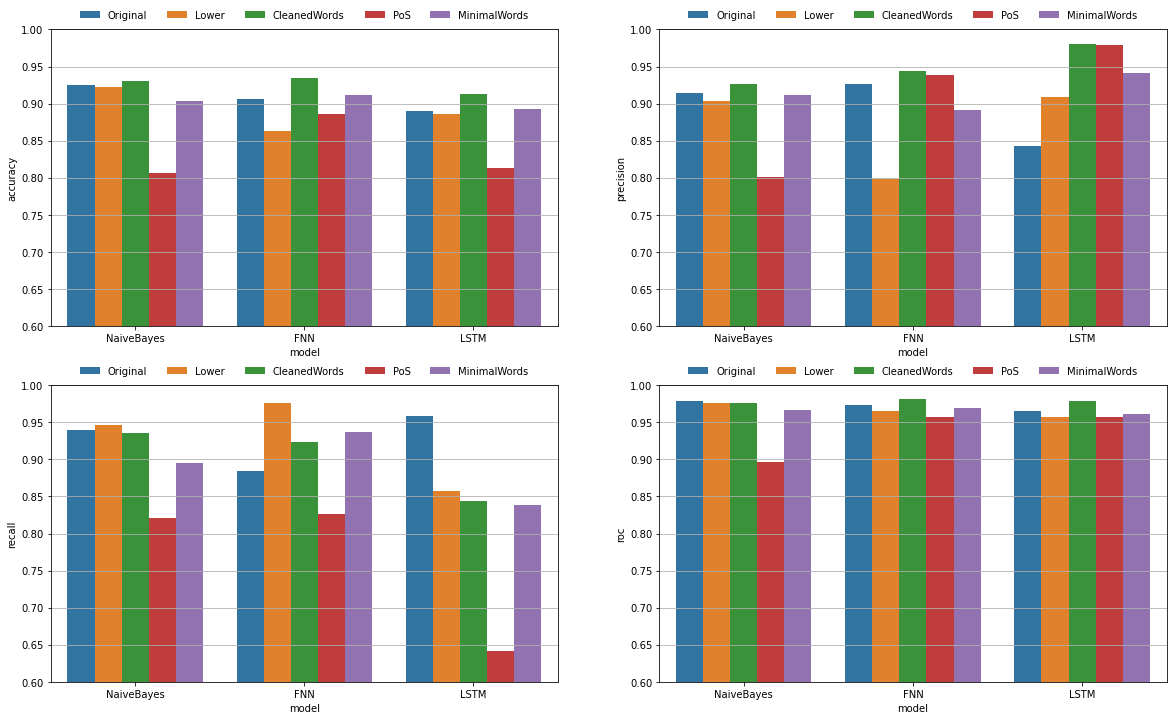

In [94]:
plt.rcParams["figure.figsize"] = (20,12)

fig, ax = plt.subplots(2, 2)

#ax[0, 0].set_title('Acuracy')
ax[0, 0].set_ylim(0.6, 1.0)
sns.barplot(x="model", y="accuracy", hue="input", data=df_summary, ax = ax[0, 0])
ax[0, 0].grid(True, axis='y')
sns.move_legend(ax[0, 0], "lower center",bbox_to_anchor=(.5, 1), ncol=5, title=None, frameon=False)

#ax[0, 1].set_title('Precision')
ax[0, 1].set_ylim(0.6, 1.0)
sns.barplot(x="model", y="precision", hue="input", data=df_summary, ax = ax[0, 1])
ax[0, 1].grid(True, axis='y')
sns.move_legend(ax[0, 1], "lower center",bbox_to_anchor=(.5, 1), ncol=5, title=None, frameon=False)

#ax[1, 0].set_title('Recall')
ax[1, 0].set_ylim(0.6, 1.0)
sns.barplot(x="model", y="recall", hue="input", data=df_summary, ax = ax[1, 0])
ax[1, 0].grid(True, axis='y')
sns.move_legend(ax[1, 0], "lower center",bbox_to_anchor=(.5, 1), ncol=5, title=None, frameon=False)

#ax[1, 1].set_title('F1 Score')
ax[1, 1].set_ylim(0.6, 1.0)
#sns.barplot(x="model", y="f1score", hue="input", data=df_summary, ax = ax[1, 1])
sns.barplot(x="model", y="roc", hue="input", data=df_summary, ax = ax[1, 1])
ax[1, 1].grid(True, axis='y')
sns.move_legend(ax[1, 1], "lower center",bbox_to_anchor=(.5, 1), ncol=5, title=None, frameon=False)

#ax[2, 0].set_title('ROC AUC')
#ax[2, 0].set_ylim(0.6, 1.0)
#sns.barplot(x="model", y="roc", hue="input", data=df_summary, ax = ax[2, 0])
#ax[2, 0].grid(True, axis='y')
#sns.move_legend(ax[2, 0], "lower center",bbox_to_anchor=(.5, 1), ncol=5, title=None, frameon=False)

plt.show()

# Right/Wrong classification examples

In [69]:
df_r = []
df_w = []

for i in range(len(ml_type)):
    for j in range(len(seq_type)):
        k = i*len(seq_type) + j
        #y_name = ml_type_abb[i]+'_'+seq_type_abb[j]
        
        r = df[df.y_true==df[y_name[k]]][['org_title','y_true',y_name[k]+'_p1']]
        w = df[df.y_true!=df[y_name[k]]][['org_title','y_true',y_name[k]+'_p1']]
        
        r['gap'] = abs(r[y_name[k]+'_p1']-r.y_true)
        w['gap'] = abs(w[y_name[k]+'_p1']-w.y_true)
        
        r.sort_values(by=['gap'],axis=0,inplace=True)
        w.sort_values(by=['gap'],axis=0,inplace=True)
        
        df_r.append(r)
        df_w.append(w)        

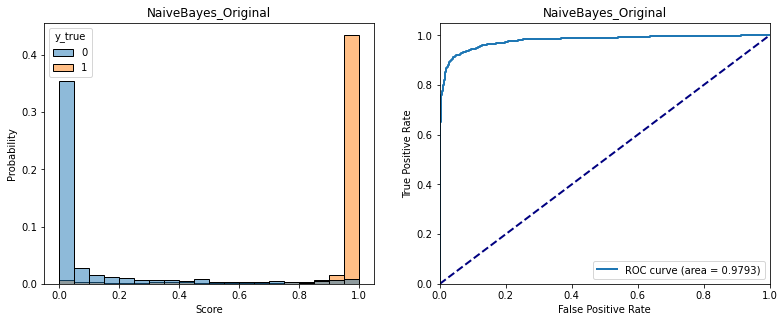

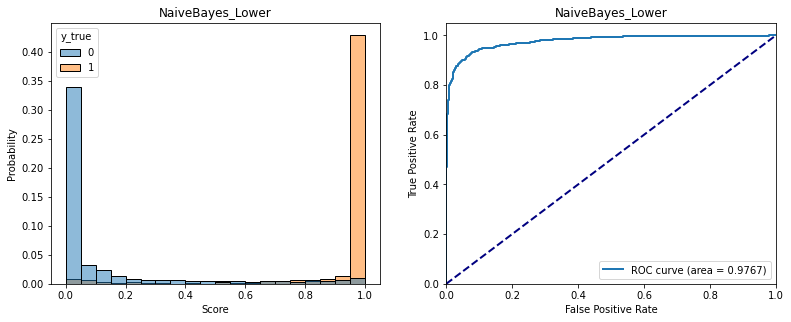

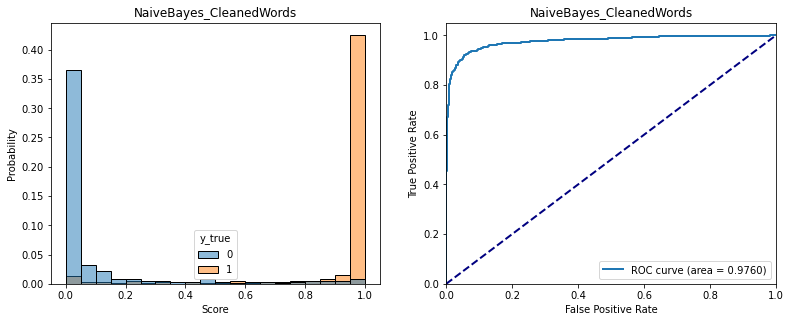

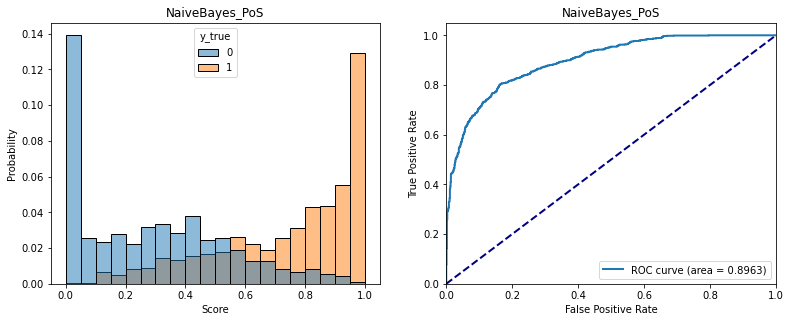

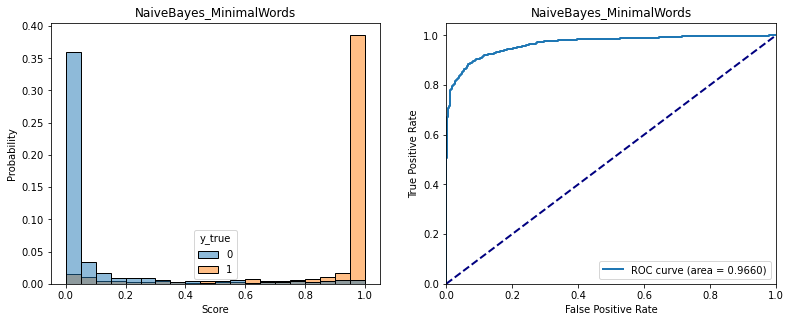

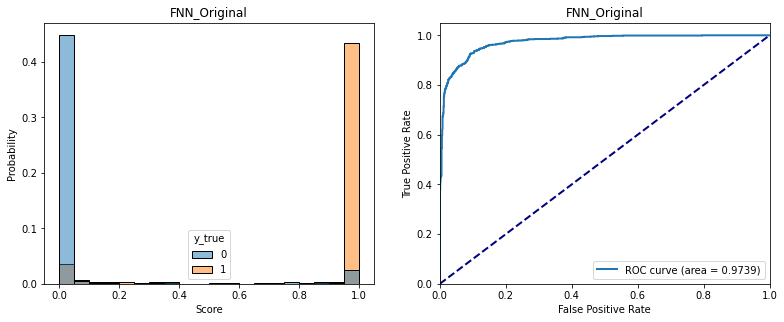

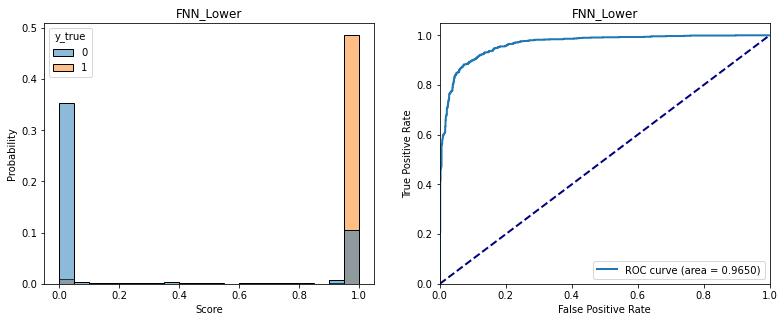

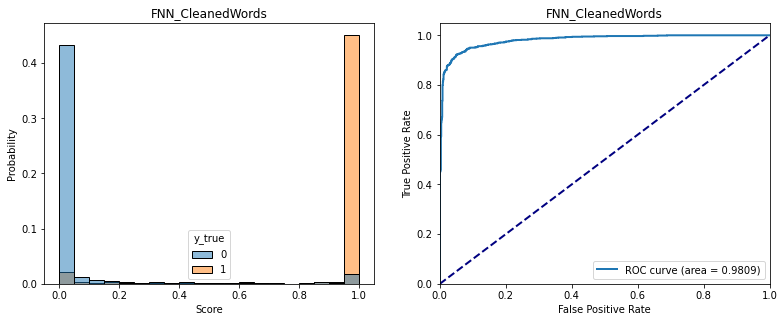

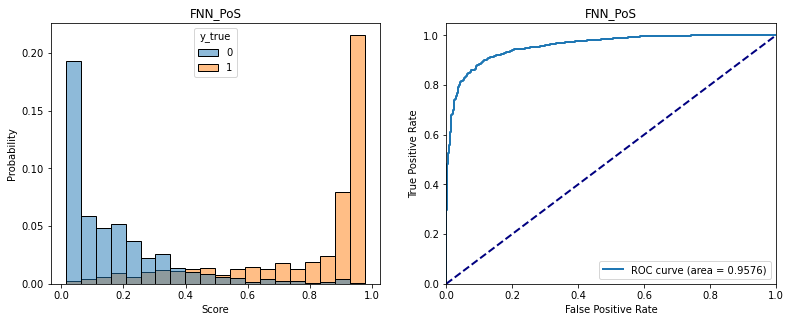

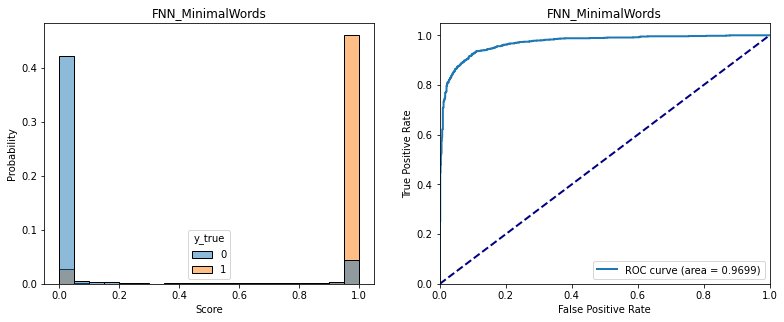

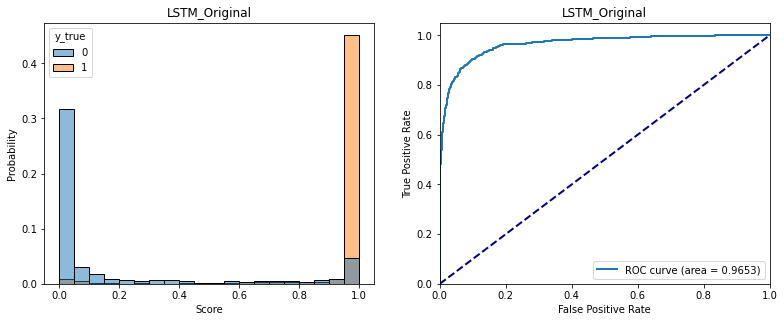

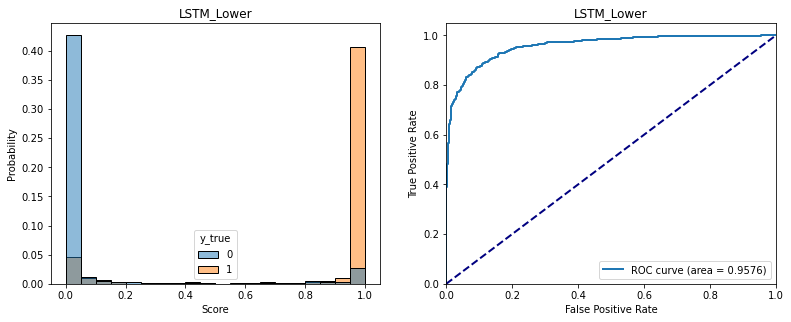

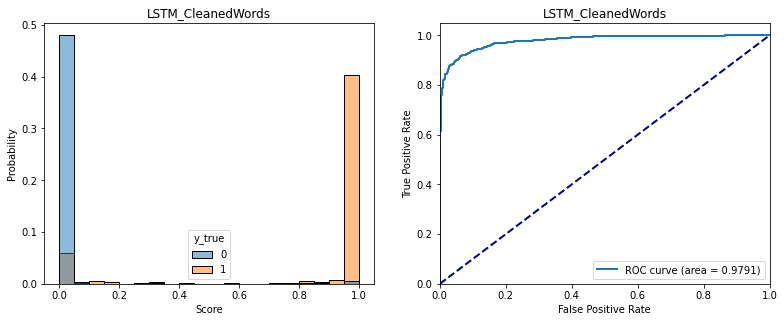

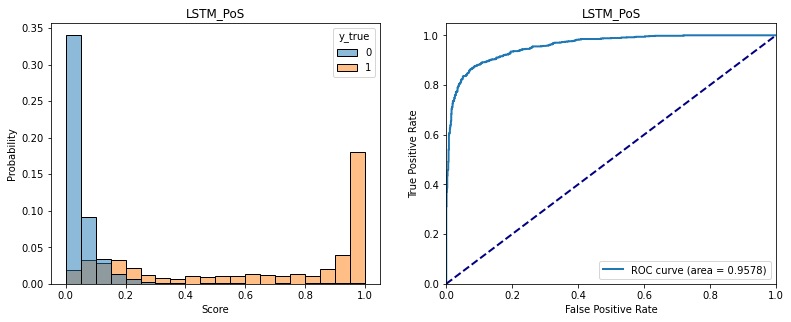

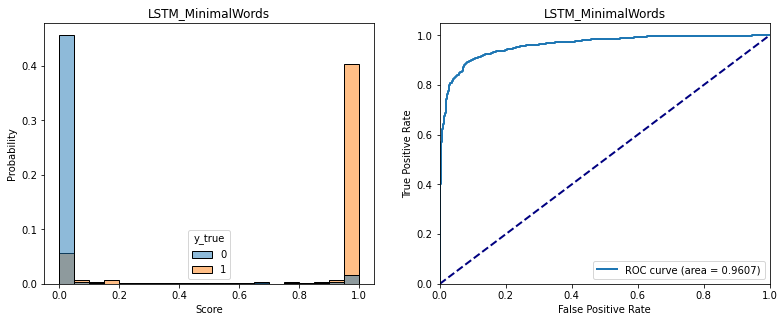

In [70]:
# ROC
plt.rcParams["figure.figsize"] = (13,4.8)

for i in range(len(ml_type)):
    for j in range(len(seq_type)):
        k = i*len(seq_type) + j
        title = ml_type[i]+'_'+seq_type[j]
        
        fig, ax = plt.subplots(1, 2)
        
        actual = 'y_true'
        pred = y_name[k]
        score0 = y_name[k]+'_p0'
        score1 = y_name[k]+'_p1'
        
        roc = df[[actual,pred,score0,score1]]
        
        plt.subplot(1, 2, 1)
        ax[0].set_title(title)
        sns.histplot(data=roc, x=score1, hue=actual, ax=ax[0], stat='probability', bins=20)
        plt.xlabel('Score')

        fpr, tpr, thresholds = roc_curve(roc[actual], roc[score1], pos_label=1)
        roc_auc = auc(fpr, tpr)
        
        plt.subplot(1, 2, 2)
        plt.plot(
            fpr,
            tpr,
            lw=2,
            label="ROC curve (area = %0.4f)" % roc_auc,
        )     

        plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(title)
        plt.legend(loc="lower right")
        plt.show()

In [71]:
for i in range(len(ml_type)):
    for j in range(len(seq_type)):
        k = i*len(seq_type) + j
        title = ml_type[i],seq_type[j]
        
        print(title,' Right, confident - Real')
        display(df_r[k][df_r[k].y_true==0].iloc[:10])
        print(title,' Right, confident - Fake')
        display(df_r[k][df_r[k].y_true==1].iloc[:10])

        print(title,' Right, subtle - Real')
        display(df_r[k][df_r[k].y_true==0].iloc[-10:])
        print(title,' Right, subtle - Fake')
        display(df_r[k][df_r[k].y_true==1].iloc[-10:])
        
        print(title,' Wrong, subtle - Real')
        display(df_w[k][df_w[k].y_true==0].iloc[:10])        
        print(title,' Wrong, subtle - Fake')
        display(df_w[k][df_w[k].y_true==1].iloc[:10])          
        
        print(title,' Wrong, confident - Real')
        display(df_w[k][df_w[k].y_true==0].iloc[-10:])
        print(title,' Wrong, confident - Fake')
        display(df_w[k][df_w[k].y_true==1].iloc[-10:])        

        

('NaiveBayes', 'Original')  Right, confident - Real


,org_title,y_true,nb_og_p1,gap
413,"UK Brexit minister says EU agreement likely, but UK ready for no deal",0,1.240357e-09,1.240357e-09
697,Border agreement puts floor under EU/UK trade talks: Irish foreign minister,0,1.355531e-09,1.355531e-09
1719,"Trump, after talk with China's Xi, says North Korea faces more sanctions",0,4.957141e-09,4.957141e-09
1939,"New U.S. trade envoy says to meet lawmakers on NAFTA, attend APEC meet",0,1.143395e-08,1.143395e-08
1132,South Korea says strongly condemns North Korea missile launch,0,1.562221e-08,1.562221e-08
136,Japan seeks funds to boost missile ranges days after North Korea threat,0,3.714506e-08,3.714506e-08
1989,South Korea's Moon asks Russia to continue supporting sanctions on North Korea,0,3.870245e-08,3.870245e-08
789,Factbox: Highlights of draft U.N. North Korea sanctions resolution,0,4.946651e-08,4.946651e-08
1998,"Juncker wants EU finance minister, no separate euro budget or parliament",0,6.867503e-08,6.867503e-08
398,Mattis says North Korea missile test meant to provoke,0,7.711478e-08,7.711478e-08


('NaiveBayes', 'Original')  Right, confident - Fake


,org_title,y_true,nb_og_p1,gap
378,BREAKING UNDERCOVER VIDEO: Democrat Operative…”We’re Starting Anarchy Here”…Hillary Knows What’s Going On… Mentally Ill People Paid To Start Violence…Admits Dems Planned Riots At Chicago Trump Ral...,1,1.0,0.000000e+00
366,"BREAKING NEWS: N. AMERICAN FAMILY Held Hostage During Obama Presidency RESCUED In Pakistan: “This is a country that did not respect us, this is a country that respects us now” [VIDEO]",1,1.0,0.000000e+00
1693,"WOW! REFUGEES EXPOSED: Here’s the cold hard truth the media won’t tell you…“If Saudi Arabia is refusing to accept them because they are a national security threat, why are we accepting them?” [VIDEO]",1,1.0,0.000000e+00
651,LEFT GOES NUTS After Antifa Woman Attacking Trump Supporter Got Punched…That Was Before This Photo Revealed What She Had In Her Hand [VIDEO],1,1.0,0.000000e+00
947,WOW! LEGAL HISPANIC AMERICAN IMMIGRANT Unloads On Racist Hillary Supporters: “Liberals Are Desperate Because They Know They’re Gonna Lose” [VIDEO],1,1.0,2.842171e-14
912,"(VIDEO) MICHELLE OBAMA GIVES AWKWARD RANT: You know, You know… Barack ‘works all the time,’ ‘he is never off’",1,1.0,1.135758e-13
1843,WATCH: BLACK CONSERVATIVE DESTROYS Mexican Flag Carrying Protesters: “If Your Country Is So Great…Why Are You Here?,1,1.0,1.704192e-13
333,NFL LEGEND Who Supported Hillary Leaves CNN Host Speechless Over Praise For Trump…People Who “called him names when he won”…”He reached back and brought them along with him. He held no grudges”[VI...,1,1.0,1.989520e-13
1438,SINGER JOY VILLA Gives AMAZING SPEECH At WI #March4Trump Rally: “We are not gonna be bullied…We are not gonna be spit on…United we are strong…We are not going to fall” [VIDEO],1,1.0,1.989520e-13
703,SHOCKING VIDEO: Muslim Child Bride Forced to Wed Man 20 Years Older…You won’t believe what he trades for her! [Video],1,1.0,3.411715e-13


('NaiveBayes', 'Original')  Right, subtle - Real


,org_title,y_true,nb_og_p1,gap
1487,"Billionaire Klarman slams Trump, vows to work for Clinton",0,0.469912,0.469912
1250,Trump could privatize nation's air traffic controllers,0,0.471086,0.471086
118,Trump's 'Paterno' comment sparks jeers on social media,0,0.472275,0.472275
1682,One in five Indonesian students support Islamic caliphate: survey,0,0.473211,0.473211
1422,The Trump presidency on Feb 15 at 8:29 p.m. EST,0,0.478315,0.478315
1423,"War crimes convict Praljak took cyanide, Dutch prosecutors say",0,0.478403,0.478403
205,Wealthy donors drawn to Rubio White House bid after Bush drops out,0,0.480712,0.480712
1336,Trump says he will back away from business to focus on White House,0,0.481424,0.481424
1685,Kremlin says got Trump adviser email about tower project but ignored it,0,0.484117,0.484117
1823,U.S. coal miners applaud Republican axing of stream protections,0,0.489007,0.489007


('NaiveBayes', 'Original')  Right, subtle - Fake


,org_title,y_true,nb_og_p1,gap
571,JOHN KASICH Suspends Campaign After Coming In 4th In A Two-Man Race,1,0.640967,0.359033
960,GOP Senator Compares Obama To ‘Drug Dealer’,1,0.612918,0.387082
1459,UNFORGIVABLE! PENTAGON WITHHELD $78 MILLION From Wounded Veteran’s Pay,1,0.586325,0.413675
346,TREASURY DEPT Depicts Lady Liberty As A Black Woman On New U.S. Coin,1,0.577733,0.422267
627,BREAKING: Trump’s Travel Ban Halt Upheld by 9th Circuit Court,1,0.574184,0.425816
1665,Jason Chaffetz Prepares To Run For The Hills As The Russia Probe Heats Up (DETAILS),1,0.560058,0.439942
460,OUTRAGEOUS! Intimidation of Citizens Opposed to Mosque Goes to Court,1,0.536321,0.463679
1214,Trump Shamefully Uses Hurricane Devastation To Promote Tax Cuts For The Wealthy,1,0.523020,0.476980
328,EXPERT CLAIMS N. KOREA’S SECOND MISSILE Test Demonstrates They Now Have Ability To Hit 3 Major Cities On U.S. Mainland,1,0.514198,0.485802
387,Experts Warn This Trump Plan Would Cause ‘Global Financial Meltdown’,1,0.500235,0.499765


('NaiveBayes', 'Original')  Wrong, subtle - Real


,org_title,y_true,nb_og_p1,gap
875,"Factbox: The economy, guns top on social media during U.S. Republican debate",0,0.511130,0.511130
758,Trump's choice for U.S. attorney general says he can stand up to him,0,0.521653,0.521653
166,Obama 'concerned' about U.S. State Department handling of classified information,0,0.529757,0.529757
521,Police reveal names of Orlando club shooting victims,0,0.530481,0.530481
307,Canada's Trudeau calls treatment of women in Mexico 'unacceptable',0,0.531610,0.531610
1472,U.N. rights expert assails Trump administration on press treatment,0,0.533456,0.533456
1215,Dubai frees Briton sentenced for touching another man: advocacy group,0,0.539809,0.539809
1257,Obama says U.S. funding to fight Zika is rapidly running out,0,0.560533,0.560533
1482,The frequent-flyer U.S. Congress: lawmakers work less in DC,0,0.571839,0.571839
291,Trump's obsession with WW2 generals strikes sour note with historians,0,0.574787,0.574787


('NaiveBayes', 'Original')  Wrong, subtle - Fake


,org_title,y_true,nb_og_p1,gap
1750,Trump’s Rhetoric Just Resulted In A Trillion Dollar Economic Loss Worldwide,1,0.490960,0.509040
1964,UPDATE: 12 STATES NOW Giving Obama Middle Finger On UNLAWFUL Transgender Bathroom Decree,1,0.486338,0.513662
1677,"OBAMA’S RACISM CZAR, “REVEREND” AL SHARPTON CALLS FOR FEDERAL POLICE FORCE",1,0.477037,0.522963
1915,Syria: US Peace Council Addresses United Nations in NYC,1,0.457498,0.542502
1392,FOR BERNIE SANDERS FANS: Prisoners Eating Cats To Survive In Socialist Venezuela,1,0.438474,0.561526
925,Trump BASHES Obama With Hostile Fiction For Not Attending Scalia’s Funeral (TWEET),1,0.431060,0.568940
734,Bad News For Trump — Mitch McConnell Says No To Repealing Obamacare In 2018,1,0.427017,0.572983
937,"NATIONAL PET CHAIN Linked To Outbreak of Bacterial Infection Sickens 39 People In 7 States, 9 Victims Have Already Been Hospitalized",1,0.426673,0.573327
1385,Republican Candidate Signs Bill Defunding Planned Parenthood While Calling Himself ‘Moderate’,1,0.410675,0.589325
1537,FRIDAY DOCUMENT DUMP: 300 CLINTON E-MAILS RELEASED,1,0.407097,0.592903


('NaiveBayes', 'Original')  Wrong, confident - Real


,org_title,y_true,nb_og_p1,gap
289,"How to get sick on the U.S. campaign trail: Little sleep, bad food, germs everywhere",0,0.987504,0.987504
1007,Former Wisconsin sheriff joins pro-Trump super PAC,0,0.987585,0.987585
954,Unwavering Trump voters say they will not miss Steve Bannon,0,0.991589,0.991589
1296,Influential House conservative says can't back Trump at this time: CNN,0,0.992771,0.992771
911,Hacker who exposed Hillary Clinton's email server pleads guilty,0,0.993450,0.993450
1425,Chicago immigrant claims U.S. retaliated over her activism,0,0.994141,0.994141
1987,Trump tweets thanks to Steve Bannon for service and role in campaign against Clinton,0,0.998609,0.998609
583,U.S. might ban laptops on all flights into and out of the country,0,0.998640,0.998640
1369,Democrat Hillary Clinton calls Orlando shooting 'an act of terror',0,0.999151,0.999151
1884,Struggling Republican Bush brings out the big gun: his mom,0,0.999720,0.999720


('NaiveBayes', 'Original')  Wrong, confident - Fake


,org_title,y_true,nb_og_p1,gap
1835,Former Director Of National Intelligence Says Russia Interference Casts Doubt On Trump’s Win,1,0.006432,0.993568
1842,"Alabama Republican House Speaker Removed From Office, Convicted On Ethics Violations",1,0.004531,0.995469
188,Russian Military: US Coalition Predator Drone Spotted at Time & Place of Syria UN Aid Convoy Attack,1,0.003267,0.996733
1982,ARMY THREATENS GREEN BERET WAR HERO WITH COURT MARTIAL For Whistleblowing On Failed Hostage Rescue,1,0.002096,0.997904
1,Israeli PM Netanyahu Quoted In Full Throated Support of Ethnically Cleansing Palestinians,1,0.001778,0.998222
133,Tennessee Republican Leader Vows Punishing Tax Hike On Companies That Support LGBT Rights,1,0.001560,0.998440
1734,McCain Opens Up A Can Of Whoop A** On Trump For Threatening North Korea With Nuclear War,1,0.001043,0.998957
1452,China Fires Warning At Trump For Contacting Taiwan In Violation Of One-China Policy,1,0.000485,0.999515
724,"SYRIA CEASEFIRE? Lavrov, Kerry Agree to Fight Al-Nusra, No Strikes on ‘Rebels,’ Aleppo Relief",1,0.000038,0.999962
470,STOCKHOLM STUDY: US & Europe Top Arms Trade Globally – Saudi Arabia’s Weapons Imports Skyrocket Over 200 Percent,1,0.000018,0.999982


('NaiveBayes', 'Lower')  Right, confident - Real


,org_title,y_true,nb_lo_p1,gap
1989,South Korea's Moon asks Russia to continue supporting sanctions on North Korea,0,1.958160e-08,1.958160e-08
1719,"Trump, after talk with China's Xi, says North Korea faces more sanctions",0,2.823726e-08,2.823726e-08
413,"UK Brexit minister says EU agreement likely, but UK ready for no deal",0,4.034956e-08,4.034956e-08
789,Factbox: Highlights of draft U.N. North Korea sanctions resolution,0,8.661627e-08,8.661627e-08
1481,Factbox: EU launches action against Poland over courts reform,0,1.046560e-07,1.046560e-07
771,"Turkey wants Iraq's Kurdish region to drop referendum, avoid sanctions",0,1.095912e-07,1.095912e-07
1132,South Korea says strongly condemns North Korea missile launch,0,1.313297e-07,1.313297e-07
1939,"New U.S. trade envoy says to meet lawmakers on NAFTA, attend APEC meet",0,2.036940e-07,2.036940e-07
1712,"No angst over Turkey's air defense deal with Russia, says NATO chief",0,2.251307e-07,2.251307e-07
1400,U.S. Commerce chief says expanded North Korean sanctions show China's waning support: CNBC,0,2.557909e-07,2.557909e-07


('NaiveBayes', 'Lower')  Right, confident - Fake


,org_title,y_true,nb_lo_p1,gap
1693,"WOW! REFUGEES EXPOSED: Here’s the cold hard truth the media won’t tell you…“If Saudi Arabia is refusing to accept them because they are a national security threat, why are we accepting them?” [VIDEO]",1,1.0,0.000000e+00
947,WOW! LEGAL HISPANIC AMERICAN IMMIGRANT Unloads On Racist Hillary Supporters: “Liberals Are Desperate Because They Know They’re Gonna Lose” [VIDEO],1,1.0,0.000000e+00
333,NFL LEGEND Who Supported Hillary Leaves CNN Host Speechless Over Praise For Trump…People Who “called him names when he won”…”He reached back and brought them along with him. He held no grudges”[VI...,1,1.0,0.000000e+00
378,BREAKING UNDERCOVER VIDEO: Democrat Operative…”We’re Starting Anarchy Here”…Hillary Knows What’s Going On… Mentally Ill People Paid To Start Violence…Admits Dems Planned Riots At Chicago Trump Ral...,1,1.0,0.000000e+00
964,DISNEY OWNED ABC SHOW “Scandal” Shows Actress Having Abortion While “Silent Night” Plays And Narrator Says: “Family doesn’t complete you…it destroys you” [VIDEO] UPDATE: ‘Scandal’ Producer Sits On...,1,1.0,2.842171e-14
366,"BREAKING NEWS: N. AMERICAN FAMILY Held Hostage During Obama Presidency RESCUED In Pakistan: “This is a country that did not respect us, this is a country that respects us now” [VIDEO]",1,1.0,8.515411e-14
912,"(VIDEO) MICHELLE OBAMA GIVES AWKWARD RANT: You know, You know… Barack ‘works all the time,’ ‘he is never off’",1,1.0,1.419975e-13
396,WOW! HILLARY CAUGHT ON VIDEO In 2000 Saying She Doesn’t Like Emails Because You Can’t Hide Them From Investigators,1,1.0,1.419975e-13
651,LEFT GOES NUTS After Antifa Woman Attacking Trump Supporter Got Punched…That Was Before This Photo Revealed What She Had In Her Hand [VIDEO],1,1.0,3.126388e-13
121,"ANDREW BREITBART: “I Don’t Care Who Our Candidate Is…I Will March Behind Whoever Our Candidate Is, Because If We Don’t…We LOSE!”[VIDEO]",1,1.0,5.684342e-13


('NaiveBayes', 'Lower')  Right, subtle - Real


,org_title,y_true,nb_lo_p1,gap
1588,Sanders says he will meet with Hillary Clinton on Tuesday,0,0.453506,0.453506
1060,"Trump says Puerto Ricans are 'wonderful,' have 'unmatched spirit'",0,0.454857,0.454857
205,Wealthy donors drawn to Rubio White House bid after Bush drops out,0,0.458561,0.458561
166,Obama 'concerned' about U.S. State Department handling of classified information,0,0.459759,0.459759
754,Clinton outpaces rivals in drug company donations,0,0.466581,0.466581
1153,Trump calls for special prosecutor to investigate Clinton Foundation,0,0.466992,0.466992
822,Trump spokesman sparks outcry by comparing Assad to Hitler,0,0.483390,0.483390
1221,Trump says 'not distracted' by NFL protests,0,0.485641,0.485641
1870,City of Oxford strips Aung San Suu Kyi of human rights award,0,0.495237,0.495237
156,Trump administration condemns America's 'dangerous anti-police atmosphere',0,0.499412,0.499412


('NaiveBayes', 'Lower')  Right, subtle - Fake


,org_title,y_true,nb_lo_p1,gap
287,New 9/11 Trailer – Featuring Charlie Sheen and Whoopi Goldberg,1,0.591048,0.408952
449,"IBM ANNOUNCES 2,000 Jobs For Vets After Meeting With President Trump",1,0.548852,0.451148
1156,"REGISTERED MUSLIM VOTERS UP Over 324,000 Since Last Presidential Election…CAIR Applauds",1,0.541806,0.458194
1453,Trump Firing Special Counsel Investigating Russian Connections A Possibility According To Attorney,1,0.535299,0.464701
231,Republican Senators Don’t Want Ted Cruz Anywhere Near Their Re-Election Campaigns,1,0.518464,0.481536
1972,TRUMP’S DOJ CHOOSES SIDES In Supreme Court Case Of Baker Who Refused To Make Cake For Gay Wedding,1,0.518162,0.481838
998,CLIMATE SCAMMER AL GORE Utterly Embarrassed…Can’t Explain Why Sea Levels Aren’t Rising,1,0.509210,0.490790
259,OBAMA CONDEMNS TRUMP…Says U.S. Is “Blessed With Muslim Communities”,1,0.506393,0.493607
255,OBAMA CONDEMNS TRUMP…Says U.S. Is “Blessed With Muslim Communities”,1,0.506393,0.493607
336,KIMBERLY GUILFOYLE: Serious Legal Issues Surround Rachel Maddow Report On Trump’s 2005 Tax Return [Video],1,0.506225,0.493775


('NaiveBayes', 'Lower')  Wrong, subtle - Real


,org_title,y_true,nb_lo_p1,gap
761,"With Trump victory, blunt U.S. general gets second chance",0,0.506736,0.506736
469,Trump fires back at Britain's May: 'Don't focus on me',0,0.508396,0.508396
1345,"From blind date to Botswana's stars, Prince Harry charts love for U.S. actress Meghan Markle",0,0.528189,0.528189
942,"Senators question Kaleo' $4,500 tag on opioid overdose treatment",0,0.534222,0.534222
1303,"In election upset, Trump finds pockets of Latino support",0,0.540906,0.540906
1953,Ex-U.S. NSA employee pleads guilty to taking classified documents,0,0.559131,0.559131
179,"Without Trump, Republican debate has second lowest rating",0,0.562608,0.562608
92,How Ted Cruz win in Supreme Court hurt U.S.-Mexico relations,0,0.566366,0.566366
1936,"Social media helps U.S. millennial voters register, turnout worries linger",0,0.575200,0.575200
281,U.S. Congress certifies Trump's Electoral College victory,0,0.585784,0.585784


('NaiveBayes', 'Lower')  Wrong, subtle - Fake


,org_title,y_true,nb_lo_p1,gap
387,Experts Warn This Trump Plan Would Cause ‘Global Financial Meltdown’,1,0.466765,0.533235
1677,"OBAMA’S RACISM CZAR, “REVEREND” AL SHARPTON CALLS FOR FEDERAL POLICE FORCE",1,0.422586,0.577414
1005,House Committee Uncovers DAMNING BOMBSHELL – Russia PAID Michael Flynn To Appear With Putin,1,0.405128,0.594872
1459,UNFORGIVABLE! PENTAGON WITHHELD $78 MILLION From Wounded Veteran’s Pay,1,0.324938,0.675062
1392,FOR BERNIE SANDERS FANS: Prisoners Eating Cats To Survive In Socialist Venezuela,1,0.314538,0.685462
1444,STUNNING DEVELOPMENT: OBAMA GIVES $75 MILLION US Tax Dollars To Mexico To Build Border Wall,1,0.306398,0.693602
1580,Team Trump Refuses to Turn Over Key Vetting Documents on Flynn,1,0.304581,0.695419
451,Trump’s Ban Just Sentenced Two Christian Syrian Refugee Families To Persecution And Possible Death,1,0.298685,0.701315
1575,"Trump’s Taking Credit For Inaugural Singer’s Album Sales In PATHETIC, Ego-Fueled Tweet",1,0.280847,0.719153
863,ARIZONA STATE UNIV DOUBLES TUITION… CLAIMS IT NEEDS MORE STATE FUNDS…Finds $500K To Donate To Clinton “Slush Fund”,1,0.255989,0.744011


('NaiveBayes', 'Lower')  Wrong, confident - Real


,org_title,y_true,nb_lo_p1,gap
1743,Trump did not ask former FBI Director Comey to pledge loyalty: White House,0,0.984393,0.984393
201,A low-key Trump ends social media silence,0,0.987245,0.987245
1425,Chicago immigrant claims U.S. retaliated over her activism,0,0.991262,0.991262
312,U.S. congressman to resign after report alleged he asked woman to have an abortion,0,0.994781,0.994781
241,"For Chinese officials, Trump perhaps better the devil they don't know",0,0.996311,0.996311
583,U.S. might ban laptops on all flights into and out of the country,0,0.997452,0.997452
911,Hacker who exposed Hillary Clinton's email server pleads guilty,0,0.998220,0.998220
289,"How to get sick on the U.S. campaign trail: Little sleep, bad food, germs everywhere",0,0.999530,0.999530
1369,Democrat Hillary Clinton calls Orlando shooting 'an act of terror',0,0.999546,0.999546
1884,Struggling Republican Bush brings out the big gun: his mom,0,0.999934,0.999934


('NaiveBayes', 'Lower')  Wrong, confident - Fake


,org_title,y_true,nb_lo_p1,gap
1564,Federal Showdown Looms in Oregon After BLM Abuse of Local Ranching Family – Bundys Lead Protest,1,0.023133,0.976867
133,Tennessee Republican Leader Vows Punishing Tax Hike On Companies That Support LGBT Rights,1,0.017306,0.982694
1667,Energy Department To Close Office Of International Climate And Technology,1,0.014620,0.985380
734,Bad News For Trump — Mitch McConnell Says No To Repealing Obamacare In 2018,1,0.013067,0.986933
1452,China Fires Warning At Trump For Contacting Taiwan In Violation Of One-China Policy,1,0.011074,0.988926
1835,Former Director Of National Intelligence Says Russia Interference Casts Doubt On Trump’s Win,1,0.005542,0.994458
1734,McCain Opens Up A Can Of Whoop A** On Trump For Threatening North Korea With Nuclear War,1,0.004841,0.995159
1,Israeli PM Netanyahu Quoted In Full Throated Support of Ethnically Cleansing Palestinians,1,0.000762,0.999238
470,STOCKHOLM STUDY: US & Europe Top Arms Trade Globally – Saudi Arabia’s Weapons Imports Skyrocket Over 200 Percent,1,0.000032,0.999968
724,"SYRIA CEASEFIRE? Lavrov, Kerry Agree to Fight Al-Nusra, No Strikes on ‘Rebels,’ Aleppo Relief",1,0.000002,0.999998


('NaiveBayes', 'CleanedWords')  Right, confident - Real


,org_title,y_true,nb_cw_p1,gap
413,"UK Brexit minister says EU agreement likely, but UK ready for no deal",0,6.445697e-10,6.445697e-10
1939,"New U.S. trade envoy says to meet lawmakers on NAFTA, attend APEC meet",0,2.623633e-09,2.623633e-09
697,Border agreement puts floor under EU/UK trade talks: Irish foreign minister,0,9.591610e-09,9.591610e-09
856,UK PM May wants to agree outline Brexit transition in next few months,0,3.349942e-08,3.349942e-08
1275,"After Brexit, UK aims for trade deal with EU that tops Canada pact",0,3.656868e-08,3.656868e-08
1332,Bid to block U.S. arms sale to Saudis faces tough opposition,0,4.206640e-08,4.206640e-08
1400,U.S. Commerce chief says expanded North Korean sanctions show China's waning support: CNBC,0,6.429588e-08,6.429588e-08
771,"Turkey wants Iraq's Kurdish region to drop referendum, avoid sanctions",0,6.718685e-08,6.718685e-08
1719,"Trump, after talk with China's Xi, says North Korea faces more sanctions",0,7.830479e-08,7.830479e-08
1712,"No angst over Turkey's air defense deal with Russia, says NATO chief",0,8.667531e-08,8.667531e-08


('NaiveBayes', 'CleanedWords')  Right, confident - Fake


,org_title,y_true,nb_cw_p1,gap
1693,"WOW! REFUGEES EXPOSED: Here’s the cold hard truth the media won’t tell you…“If Saudi Arabia is refusing to accept them because they are a national security threat, why are we accepting them?” [VIDEO]",1,1.0,0.000000e+00
1922,OBAMA WARNS COPS TO RECOGNIZE BLACK LIVES MATTER: “If police organizations acknowledge that there’s a problem…that is what is going to ultimately make the job of being a cop a lot safer” [VIDEO],1,1.0,0.000000e+00
1438,SINGER JOY VILLA Gives AMAZING SPEECH At WI #March4Trump Rally: “We are not gonna be bullied…We are not gonna be spit on…United we are strong…We are not going to fall” [VIDEO],1,1.0,0.000000e+00
333,NFL LEGEND Who Supported Hillary Leaves CNN Host Speechless Over Praise For Trump…People Who “called him names when he won”…”He reached back and brought them along with him. He held no grudges”[VI...,1,1.0,0.000000e+00
947,WOW! LEGAL HISPANIC AMERICAN IMMIGRANT Unloads On Racist Hillary Supporters: “Liberals Are Desperate Because They Know They’re Gonna Lose” [VIDEO],1,1.0,0.000000e+00
378,BREAKING UNDERCOVER VIDEO: Democrat Operative…”We’re Starting Anarchy Here”…Hillary Knows What’s Going On… Mentally Ill People Paid To Start Violence…Admits Dems Planned Riots At Chicago Trump Ral...,1,1.0,0.000000e+00
25,ANGRY BLACK MILWAUKEE RESIDENTS Set City On Fire After Armed Black Man Is Killed By Police: “The black people of Milwaukee are tired…They’re tired of living under this oppression” [VIDEO],1,1.0,2.842171e-14
651,LEFT GOES NUTS After Antifa Woman Attacking Trump Supporter Got Punched…That Was Before This Photo Revealed What She Had In Her Hand [VIDEO],1,1.0,5.684342e-14
1843,WATCH: BLACK CONSERVATIVE DESTROYS Mexican Flag Carrying Protesters: “If Your Country Is So Great…Why Are You Here?,1,1.0,5.684342e-14
912,"(VIDEO) MICHELLE OBAMA GIVES AWKWARD RANT: You know, You know… Barack ‘works all the time,’ ‘he is never off’",1,1.0,8.515411e-14


('NaiveBayes', 'CleanedWords')  Right, subtle - Real


,org_title,y_true,nb_cw_p1,gap
691,Trump says suspected gunman who shot at lawmakers is now dead,0,0.465516,0.465516
848,"In victory for Trump, judge tosses suit on foreign payments",0,0.466386,0.466386
261,"With prayer, sacrifices, Pakistani Muslims celebrate Eid al-Adha",0,0.467255,0.467255
1847,California lawmakers hire Holder for fights with Trump,0,0.472035,0.472035
1303,"In election upset, Trump finds pockets of Latino support",0,0.475494,0.475494
1524,Italian parliament votes to toughen laws against fascist propaganda,0,0.475504,0.475504
435,"Trial against Guatemalan president's brother, son begins",0,0.476673,0.476673
1685,Kremlin says got Trump adviser email about tower project but ignored it,0,0.477909,0.477909
1588,Sanders says he will meet with Hillary Clinton on Tuesday,0,0.491543,0.491543
1550,Trump attends 'Villains and Heroes' costume party dressed as...himself,0,0.499337,0.499337


('NaiveBayes', 'CleanedWords')  Right, subtle - Fake


,org_title,y_true,nb_cw_p1,gap
1580,Team Trump Refuses to Turn Over Key Vetting Documents on Flynn,1,0.587728,0.412272
1750,Trump’s Rhetoric Just Resulted In A Trillion Dollar Economic Loss Worldwide,1,0.585272,0.414728
1586,LAWLESS FEDS REFUSE To Hand Over Communications On Global Warming Junk Science To Republicans,1,0.581170,0.418830
1385,Republican Candidate Signs Bill Defunding Planned Parenthood While Calling Himself ‘Moderate’,1,0.572339,0.427661
998,CLIMATE SCAMMER AL GORE Utterly Embarrassed…Can’t Explain Why Sea Levels Aren’t Rising,1,0.570450,0.429550
1010,UCLA PLAYER’S FATHER Disses Trump On China Release…Downplays His Son’s Crime: ‘I’ve seen a lot worse’,1,0.559313,0.440687
607,Racist Republican Governor Makes April Official ‘Confederate Heritage Month’,1,0.558734,0.441266
1594,DNC CHAIR PEREZ Says Trump ‘Didn’t Win’…Decides To Rewrite Constitution Without Electoral College…,1,0.558687,0.441313
56,Facebook’s New ‘Proactive’ AI to Scan Posts for Suicidal Thoughts,1,0.524567,0.475433
449,"IBM ANNOUNCES 2,000 Jobs For Vets After Meeting With President Trump",1,0.501448,0.498552


('NaiveBayes', 'CleanedWords')  Wrong, subtle - Real


,org_title,y_true,nb_cw_p1,gap
1060,"Trump says Puerto Ricans are 'wonderful,' have 'unmatched spirit'",0,0.502037,0.502037
1259,"Factbox: Trump controversies: Michael Flynn, the travel ban and others",0,0.519960,0.519960
761,"With Trump victory, blunt U.S. general gets second chance",0,0.520423,0.520423
713,Quarter of Republicans think Cruz's birthplace disqualifies him for president: poll,0,0.527844,0.527844
54,Ten million Australians vote so far in same-sex marriage poll,0,0.537800,0.537800
1370,Burlington to drop Ivanka Trump brand online: Business Insider,0,0.565254,0.565254
254,Trump has resigned from Trump Organization: White House,0,0.566998,0.566998
1343,Exiled son of Yemen's Saleh takes up anti-Houthi cause,0,0.571161,0.571161
154,Trump says comments on Mexicans good for restaurant business: documents,0,0.594886,0.594886
1022,Fierce firefight as Philippines' toughest urban war down to last building,0,0.609217,0.609217


('NaiveBayes', 'CleanedWords')  Wrong, subtle - Fake


,org_title,y_true,nb_cw_p1,gap
1675,Trump Can’t Find Anyone To Serve On His National Security Team,1,0.497523,0.502477
665,LAST MINUTE GOV’T GRAB: Obama Admin Decrees DHS will ‘Take Control’ of US Election Systems,1,0.488452,0.511548
1444,STUNNING DEVELOPMENT: OBAMA GIVES $75 MILLION US Tax Dollars To Mexico To Build Border Wall,1,0.454301,0.545699
346,TREASURY DEPT Depicts Lady Liberty As A Black Woman On New U.S. Coin,1,0.439209,0.560791
387,Experts Warn This Trump Plan Would Cause ‘Global Financial Meltdown’,1,0.437871,0.562129
599,HOW DIPLOMATIC! SENATOR MCCAIN Responds To Criticism He Called North Korean Dictator “Crazy Fat Kid”,1,0.431745,0.568255
314,Recused House Russia Investigation Committee Member Didn’t Really Recuse Himself At All,1,0.425136,0.574864
852,NIGEL FARAGE ON TRUMP/MERKEL POWWOW: Merkel’s decision for mass migration the “worst decision by European leader in 70 years” [Video],1,0.420523,0.579477
1469,4 DEAD TEENAGERS In Two Weeks…Illegal Immigrant Gang Violence Hits Long Island Town HARD,1,0.416490,0.583510
316,CLIMATE CHANGE REFUGEES? FEDS GIVE $1 BILLION In Grants To 13 States To “Help Them Adapt” To Climate Change,1,0.416277,0.583723


('NaiveBayes', 'CleanedWords')  Wrong, confident - Real


,org_title,y_true,nb_cw_p1,gap
1737,"How the polls, including ours, missed Trump's victory",0,0.980487,0.980487
1023,More than half of eligible Australians have so far voted in same-sex marriage ballot,0,0.993577,0.993577
583,U.S. might ban laptops on all flights into and out of the country,0,0.994575,0.994575
785,Super Tuesday showdown: How the South won the spotlight,0,0.996575,0.996575
241,"For Chinese officials, Trump perhaps better the devil they don't know",0,0.998336,0.998336
1987,Trump tweets thanks to Steve Bannon for service and role in campaign against Clinton,0,0.998422,0.998422
1369,Democrat Hillary Clinton calls Orlando shooting 'an act of terror',0,0.998467,0.998467
911,Hacker who exposed Hillary Clinton's email server pleads guilty,0,0.998758,0.998758
289,"How to get sick on the U.S. campaign trail: Little sleep, bad food, germs everywhere",0,0.999732,0.999732
1884,Struggling Republican Bush brings out the big gun: his mom,0,0.999950,0.999950


('NaiveBayes', 'CleanedWords')  Wrong, confident - Fake


,org_title,y_true,nb_cw_p1,gap
1915,Syria: US Peace Council Addresses United Nations in NYC,1,1.804216e-03,0.998196
189,US BOOTS: US Marines Deployed For Ground Combat in Iraq (to defend oil fields),1,1.718754e-03,0.998281
284,JUST IN: Helicopter Crashes In Saudi Arabia KILLING 8 High-Ranking Officials Only One Day After Saudi King ARRESTS Trump-Hating Billionaire And Dozens More Cabinet Members,1,9.999037e-04,0.999000
1452,China Fires Warning At Trump For Contacting Taiwan In Violation Of One-China Policy,1,9.140837e-04,0.999086
1835,Former Director Of National Intelligence Says Russia Interference Casts Doubt On Trump’s Win,1,8.212152e-04,0.999179
623,WOW! UN AMBASSADOR Nikki Haley BLASTS UN Vote…Tweets LIST Of Nations Who VOTED To SUPPORT President Trump’s Declaration Of Jerusalem As Israel’s Capital,1,7.129133e-04,0.999287
1,Israeli PM Netanyahu Quoted In Full Throated Support of Ethnically Cleansing Palestinians,1,2.038258e-04,0.999796
188,Russian Military: US Coalition Predator Drone Spotted at Time & Place of Syria UN Aid Convoy Attack,1,3.035931e-05,0.999970
724,"SYRIA CEASEFIRE? Lavrov, Kerry Agree to Fight Al-Nusra, No Strikes on ‘Rebels,’ Aleppo Relief",1,8.831277e-07,0.999999
470,STOCKHOLM STUDY: US & Europe Top Arms Trade Globally – Saudi Arabia’s Weapons Imports Skyrocket Over 200 Percent,1,5.867434e-07,0.999999


('NaiveBayes', 'PoS')  Right, confident - Real


,org_title,y_true,nb_ps_p1,gap
1110,World Bank's Kim says Trump likes lender's private capital plans,0,1.070772e-07,1.070772e-07
1784,China's Xi tells Trump maintaining peace in Korean peninsula is China's unswerving goal,0,3.639873e-07,3.639873e-07
197,Germany's Social Democrats beat Merkel's conservatives in state vote,0,1.840769e-06,1.840769e-06
1719,"Trump, after talk with China's Xi, says North Korea faces more sanctions",0,2.685521e-06,2.685521e-06
1399,"Obama, Argentina's Macri discuss Brazil's political crisis",0,3.226731e-06,3.226731e-06
169,Peru's Congress passes law to target Odebrecht's partners,0,3.289902e-06,3.289902e-06
1717,Cambodia's opposition puts out banners calling for leader's release,0,4.853855e-06,4.853855e-06
490,Trump says U.S. wants Russia's help on North Korea,0,7.444314e-06,7.444314e-06
819,Italy's 5-Star to battle right in runoff for Rome's beachfront,0,1.050054e-05,1.050054e-05
427,Putin says Trump is listening to Russia's views on North Korea crisis,0,1.130550e-05,1.130550e-05


('NaiveBayes', 'PoS')  Right, confident - Fake


,org_title,y_true,nb_ps_p1,gap
333,NFL LEGEND Who Supported Hillary Leaves CNN Host Speechless Over Praise For Trump…People Who “called him names when he won”…”He reached back and brought them along with him. He held no grudges”[VI...,1,0.999998,0.000002
936,"WHY THIS BLUE-COLLAR DEMOCRAT STRONGHOLD County Is Still Fighting For Trump: “He was the hope we were all waiting on, the guy riding up on the white horse” [VIDEO]",1,0.999946,0.000054
1848,"MIC DROP MOMENT: Veteran Senator Asked By A Testy Sen. Schumer Where He Was 8 Years Ago: “Eight years ago, I was getting my ass shot at in Afghanistan”",1,0.999936,0.000064
840,OUCH! POST DEBATE: HILLARY GIVES Tim Kaine A Painful Preview Of What It Feels Like When You Disappoint Her,1,0.999908,0.000092
1656,[VIDEO] DINESH D’SOUZA Warned Us About What The World Would Look Like If We Gave Obama Another Term In “2016: Obama’s America”…Was He Correct?,1,0.999875,0.000125
1154,WATCH: DIAMOND AND SILK Make A Surprise Visit To “THE VIEW” and It Might Be The Funniest Thing You’ve Ever Seen,1,0.999849,0.000151
1030,ALL KIDDING ASIDE…DID HILLARY JUST HAVE A SEIZURE In Middle Of Q & A With Journalists? You Be The Judge… [VIDEO],1,0.999815,0.000185
121,"ANDREW BREITBART: “I Don’t Care Who Our Candidate Is…I Will March Behind Whoever Our Candidate Is, Because If We Don’t…We LOSE!”[VIDEO]",1,0.999711,0.000289
651,LEFT GOES NUTS After Antifa Woman Attacking Trump Supporter Got Punched…That Was Before This Photo Revealed What She Had In Her Hand [VIDEO],1,0.999587,0.000413
1693,"WOW! REFUGEES EXPOSED: Here’s the cold hard truth the media won’t tell you…“If Saudi Arabia is refusing to accept them because they are a national security threat, why are we accepting them?” [VIDEO]",1,0.999579,0.000421


('NaiveBayes', 'PoS')  Right, subtle - Real


,org_title,y_true,nb_ps_p1,gap
1189,Freeing of hostages in Pakistan a 'positive sign': U.S. general,0,0.491504,0.491504
1839,Anti-corruption blogger killed by huge bomb in Malta,0,0.491670,0.491670
1998,"Juncker wants EU finance minister, no separate euro budget or parliament",0,0.492050,0.492050
1944,Trump aides divided over policy shielding 'dreamer' immigrants: sources,0,0.492856,0.492856
108,U.S. 'strongly opposes' Iraqi Kurdish independence vote: State Department,0,0.495727,0.495727
1583,"With French down on strikes, Macron reforms get easier ride",0,0.496104,0.496104
57,Iranian students feel robbed of their American dreams,0,0.496994,0.496994
1184,Comey declined offer to talk to Senate intel panel: MSNBC,0,0.497003,0.497003
166,Obama 'concerned' about U.S. State Department handling of classified information,0,0.497118,0.497118
1731,"Europeans, Africans agree renewed push to tackle migrant crisis",0,0.498173,0.498173


('NaiveBayes', 'PoS')  Right, subtle - Fake


,org_title,y_true,nb_ps_p1,gap
259,OBAMA CONDEMNS TRUMP…Says U.S. Is “Blessed With Muslim Communities”,1,0.516125,0.483875
937,"NATIONAL PET CHAIN Linked To Outbreak of Bacterial Infection Sickens 39 People In 7 States, 9 Victims Have Already Been Hospitalized",1,0.514876,0.485124
1614,WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Massive Voter Fraud: Trump Campaign Readies Lawsuit Against FL Sec Of Elections In Critical District [VIDEO],1,0.513415,0.486585
950,‘#1 In Bigotry’: Twitter EVISCERATES Mississippi Gov. Over Anti-Gay Law,1,0.512070,0.487930
1151,RED FLAG IN CLINTON’S FBI INTERVIEW Shocks Former Prosecutor Andrew McCarthy,1,0.511047,0.488953
1981,It Only Takes Chris Hayes One Tweet To Completely Shatter GOP’s Major Anti-Hillary Talking Point,1,0.508778,0.491222
235,"WATCH: Top Senator Proves GOP Built Trump, Makes Them Own It",1,0.508172,0.491828
284,JUST IN: Helicopter Crashes In Saudi Arabia KILLING 8 High-Ranking Officials Only One Day After Saudi King ARRESTS Trump-Hating Billionaire And Dozens More Cabinet Members,1,0.505808,0.494192
351,Socialist Utopia of Venezuela Tells People to Eat Their Pets,1,0.505141,0.494859
623,WOW! UN AMBASSADOR Nikki Haley BLASTS UN Vote…Tweets LIST Of Nations Who VOTED To SUPPORT President Trump’s Declaration Of Jerusalem As Israel’s Capital,1,0.504257,0.495743


('NaiveBayes', 'PoS')  Wrong, subtle - Real


,org_title,y_true,nb_ps_p1,gap
797,Morawiecki sworn in as Polish PM amid dispute with EU,0,0.501856,0.501856
981,"Among Trump associates, concern and frustration over Donald Jr. crisis",0,0.502013,0.502013
1190,U.S. embassy to Russia to resume some visa services after diplomatic row,0,0.502287,0.502287
468,Hungary charges Jobbik MEP with spying on EU for Russia,0,0.503662,0.503662
1211,Nearly half of Americans ‘very concerned’ about Clinton emails: Reuters/Ipsos poll,0,0.503814,0.503814
1663,"Some Americans look to Canada, NZ as Trump surges to victory",0,0.504347,0.504347
162,Trump to order departments to beef up cyber security,0,0.505164,0.505164
1088,Turkey criticizes German 'populism' after Merkel shift on EU membership,0,0.506142,0.506142
234,Ireland set for December election if crisis not averted by Tuesday -PM,0,0.508075,0.508075
1795,Senators introduce bill to block expansion of FBI hacking authority,0,0.508105,0.508105


('NaiveBayes', 'PoS')  Wrong, subtle - Fake


,org_title,y_true,nb_ps_p1,gap
1349,Lifetime Texas Republican Leaves The GOP In Epic Resignation Letter,1,0.499342,0.500658
1593,PRESIDENT TRUMP WARNS Comey…Tweets Veiled Threat To Former FBI Director,1,0.498793,0.501207
791,"GOP Lawmaker Resigns After Arrest For Drugs, Solicitation Of A Minor (VIDEO)",1,0.497686,0.502314
31,Listen To Reaction Of U.S. Troops When David Letterman Suggests Obama/Biden Third Term,1,0.497350,0.502650
1118,SNL Hilariously Mocks One Of Trump’s Biggest Supporters During Opening (VIDEO),1,0.494949,0.505051
1214,Trump Shamefully Uses Hurricane Devastation To Promote Tax Cuts For The Wealthy,1,0.494492,0.505508
873,DEMOCRATS FREAK OUT As Shocking Number Of Union Members Plan To Vote For “Blue-Collar Billionaire” Donald Trump [VIDEO],1,0.493031,0.506969
1042,U.S. STEEL CEO Makes Huge Jobs Announcement…We’re Winning Big! [Video],1,0.488397,0.511603
890,WATCH: Nicolle Wallace Just Ripped Trump A New One For Having So Much Secret Contact With Russia,1,0.486904,0.513096
633,Taxpayer Funded Left-Wing Church Organization Will BREAK LAW To Hide ILLEGAL ALIENS (2016 Democrat Voters) From Authorities,1,0.486615,0.513385


('NaiveBayes', 'PoS')  Wrong, confident - Real


,org_title,y_true,nb_ps_p1,gap
1422,The Trump presidency on Feb 15 at 8:29 p.m. EST,0,0.917818,0.917818
1577,The Trump presidency on Feb. 10 at 7:05 p.m. EST,0,0.917818,0.917818
1291,Tillerson: 'simply no place' for hate and violence in U.S. public discourse,0,0.927971,0.927971
1640,"Hands off EU, Trump; we don't back Ohio secession: Juncker",0,0.929860,0.929860
455,Immigrant 'Dreamers' - and their bosses - wait anxiously for Trump decision,0,0.932569,0.932569
241,"For Chinese officials, Trump perhaps better the devil they don't know",0,0.933877,0.933877
134,"Russian PM Medvedev met U.S. Trump, calls him 'open and well-meaning': RIA",0,0.935821,0.935821
312,U.S. congressman to resign after report alleged he asked woman to have an abortion,0,0.949051,0.949051
785,Super Tuesday showdown: How the South won the spotlight,0,0.982365,0.982365
282,Theresa Maybe? PM refuses to say how she'd vote in another Brexit referendum,0,0.992554,0.992554


('NaiveBayes', 'PoS')  Wrong, confident - Fake


,org_title,y_true,nb_ps_p1,gap
1760,"Chicago Cubs Snub Trump, Will Visit White House Before Obama Leaves To Celebrate World Series Victory",1,0.118496,0.881504
1563,HILLARY APPROVED? BILL CLINTON Ditched Secret Service On Several Trips To Exotic Locations On PEDOPHILE PLANE,1,0.116818,0.883182
173,History Professor Shuts Down Ted Cruz’s Lies About Supreme Court History With Facts,1,0.115464,0.884536
1392,FOR BERNIE SANDERS FANS: Prisoners Eating Cats To Survive In Socialist Venezuela,1,0.113833,0.886167
311,"BREAKING: OBAMA’S “Director Of Diversity” Donates Hundreds Of Thousands Of Tax Payer Dollars To Open Borders, Other Radical Groups",1,0.112861,0.887139
1892,MAJOR Trump Donor Says Rape is Just ‘Regret’,1,0.111307,0.888693
990,BOOM! DirecTV REFUNDS NFL Sunday Ticket Subscriptions After Being Bombarded With Angry Calls From Customers Over National Anthem Protests,1,0.108405,0.891595
759,NSC WILL NOT Fulfill Subpoena Request For Susan Rice Unmasking Documents…Records Moved To Obama Library…Presidential Records Act Keeps Them Hidden From Public For 5 Years [VIDEO],1,0.104343,0.895657
585,MEDIA IGNORES! Huge List of Attacks on Conservatives is Shocking,1,0.077139,0.922861
696,"Hillary’s Secret Weapon: Evan McMullin is CIA-Goldman Sachs candidate, backed by Mitt Romney’s Wall Street Machine",1,0.011786,0.988214


('NaiveBayes', 'MinimalWords')  Right, confident - Real


,org_title,y_true,nb_mw_p1,gap
1989,South Korea's Moon asks Russia to continue supporting sanctions on North Korea,0,6.660356e-08,6.660356e-08
1400,U.S. Commerce chief says expanded North Korean sanctions show China's waning support: CNBC,0,9.016622e-08,9.016622e-08
789,Factbox: Highlights of draft U.N. North Korea sanctions resolution,0,1.290426e-07,1.290426e-07
413,"UK Brexit minister says EU agreement likely, but UK ready for no deal",0,1.555877e-07,1.555877e-07
771,"Turkey wants Iraq's Kurdish region to drop referendum, avoid sanctions",0,2.928708e-07,2.928708e-07
1939,"New U.S. trade envoy says to meet lawmakers on NAFTA, attend APEC meet",0,3.125114e-07,3.125114e-07
1495,"Pence says South Korea-U.S. free trade agreement to be reviewed, reformed",0,3.574812e-07,3.574812e-07
723,"North Korea threat is 'critical, imminent,' Japan tells U.S., South Korea",0,3.968651e-07,3.968651e-07
1704,U.S. House tax panel will not seek Trump tax returns: lawmaker,0,5.626374e-07,5.626374e-07
51,U.S. official says not ruling out eventual direct talks with North Korea,0,6.113032e-07,6.113032e-07


('NaiveBayes', 'MinimalWords')  Right, confident - Fake


,org_title,y_true,nb_mw_p1,gap
378,BREAKING UNDERCOVER VIDEO: Democrat Operative…”We’re Starting Anarchy Here”…Hillary Knows What’s Going On… Mentally Ill People Paid To Start Violence…Admits Dems Planned Riots At Chicago Trump Ral...,1,1.0,0.000000e+00
1883,BREAKING: CNN PRODUCER Caught On Undercover Video Trashing Trump: “Voters “Stupid as Sh*t” [Video],1,1.0,1.577405e-12
1178,BREAKING: Another Undercover Video Released of CNN Producer Mocking Cuomo and Calling voters “Stupid as Sh*t” [Video],1,1.0,4.675371e-12
1592,"BREAKING NEWS: NYPD Cracking Down On Anti-Trump Terror Groups…WATCH Police ARREST Antifa Terrorists For Wearing Masks, Burning Flags [VIDEO]",1,1.0,8.327561e-12
947,WOW! LEGAL HISPANIC AMERICAN IMMIGRANT Unloads On Racist Hillary Supporters: “Liberals Are Desperate Because They Know They’re Gonna Lose” [VIDEO],1,1.0,1.610079e-11
73,"LOL! WHOOPI GOLDBERG Caught Telling HUGE LIE During Interview With Newt Gingrich, As The View Hacks Tried To Prove President Trump’s a “Liar” [VIDEO]",1,1.0,4.837364e-11
407,WASHINGTON POST PRAISES MICHELLE OBAMA For “Reclaiming her image”…For Openly Supporting Racist and Cop-Hating Black Lives Matter,1,1.0,1.384420e-10
1714,"WHOA! RAND PAUL, NEWT GINGRICH RIP OBAMA’S National Security Advisor, Benghazi Video Liar, Susan Rice For ABRUPTLY Backing Out Of House Testimony [VIDEO]",1,1.0,2.547722e-10
1771,"BLOODY 4TH OF JULY WEEKEND UPDATE: Obama’s Hometown Of Chicago…64 Shot, 6 Killed, Including 39 Yr Old Father, 3 And 10 Yr Old Daughters…Black Reverend Cautions Those Who Blame Guns or Cops",1,1.0,2.634692e-10
651,LEFT GOES NUTS After Antifa Woman Attacking Trump Supporter Got Punched…That Was Before This Photo Revealed What She Had In Her Hand [VIDEO],1,1.0,2.975752e-10


('NaiveBayes', 'MinimalWords')  Right, subtle - Real


,org_title,y_true,nb_mw_p1,gap
1778,"Austria's conservatives, Social Democrats to sue each other ahead of vote",0,0.427780,0.427780
1555,NY mayor criticizes Trump's closing public atrium for campaign events,0,0.436539,0.436539
1624,Obama says will come back to Germany for Oktoberfest,0,0.438809,0.438809
408,"Kremlin: Obama's Trump criticism anti-Russian, won't foster better ties",0,0.439316,0.439316
358,Trump says he's sure Senator Paul will back Republican health plan,0,0.440159,0.440159
197,Germany's Social Democrats beat Merkel's conservatives in state vote,0,0.441397,0.441397
1195,Federal judge partially lifts Trump's latest refugee restrictions,0,0.451062,0.451062
806,Senators say they might confirm Obama's high court pick after election,0,0.455365,0.455365
1080,Leader of China's $9 billion Ezubao online scam gets life; 26 jailed,0,0.456817,0.456817
1996,Ex-Trump aide Flynn's family creates fund for 'enormous' legal fees,0,0.489372,0.489372


('NaiveBayes', 'MinimalWords')  Right, subtle - Fake


,org_title,y_true,nb_mw_p1,gap
1590,BREAKING: WIKILEAKS EMAILS SUGGEST Supreme Court Justice Scalia May Have Been Murdered,1,0.568595,0.431405
1010,UCLA PLAYER’S FATHER Disses Trump On China Release…Downplays His Son’s Crime: ‘I’ve seen a lot worse’,1,0.565289,0.434711
1773,"HILARIOUS! Leonardo DiCaprio Is “Outed” As Climate Change Hypocrite, Forced To Do The Unimaginable",1,0.564857,0.435143
627,BREAKING: Trump’s Travel Ban Halt Upheld by 9th Circuit Court,1,0.558133,0.441867
820,Trump Is Giddy About His Upcoming Meeting With Putin And Advisors Are Freaking Out,1,0.546405,0.453595
98,HERE IT IS: List Of Democrat Hypocrites Who Voted To Filibuster GW Bush’s Final Supreme Court Pick,1,0.542749,0.457251
867,Democracy Expert Tells Us EXACTLY How Republicans Screwed America By Accepting Trump,1,0.528248,0.471752
1149,FDA Department Gets Order From White House Saying All Office TVs Must Be Programmed To Fox News Only,1,0.521419,0.478581
313,GEORGE SOROS BOARD MEMBER Is Chairman Of Firm Running Voting For Utah’s Caucus On Tuesday,1,0.517452,0.482548
351,Socialist Utopia of Venezuela Tells People to Eat Their Pets,1,0.513613,0.486387


('NaiveBayes', 'MinimalWords')  Wrong, subtle - Real


,org_title,y_true,nb_mw_p1,gap
1830,Russia to respond to Twitter ban on Russian media ads: RIA,0,0.502796,0.502796
1100,Russia to respond to Twitter ban on Russian media ads: RIA,0,0.502796,0.502796
871,"Facebook, Twitter support Apple on encryption dispute with FBI",0,0.505800,0.505800
824,Kurdistan never intended to engage in war with Iraq: KRG,0,0.506779,0.506779
1419,"Trump skips debate, wins on social media",0,0.511598,0.511598
602,"Pope singles out Rome's decay, corruption on traditional feast day",0,0.513077,0.513077
286,"Afghans believe country headed in wrong direction, but optimism rising slightly: survey",0,0.518475,0.518475
156,Trump administration condemns America's 'dangerous anti-police atmosphere',0,0.531637,0.531637
435,"Trial against Guatemalan president's brother, son begins",0,0.543147,0.543147
1291,Tillerson: 'simply no place' for hate and violence in U.S. public discourse,0,0.543487,0.543487


('NaiveBayes', 'MinimalWords')  Wrong, subtle - Fake


,org_title,y_true,nb_mw_p1,gap
1586,LAWLESS FEDS REFUSE To Hand Over Communications On Global Warming Junk Science To Republicans,1,0.496037,0.503963
1759,THE LIST OF OBAMA’S HISTORIC FIRSTS AKA HOW CHICAGO POLITICS CORRUPTED WASHINGTON EVEN MORE,1,0.492220,0.507780
599,HOW DIPLOMATIC! SENATOR MCCAIN Responds To Criticism He Called North Korean Dictator “Crazy Fat Kid”,1,0.480193,0.519807
552,IT BEGINS: Wisconsin Company First in US to Implant Microchips in Employees,1,0.478732,0.521268
1616,“They Will Kill Him Before They Let Him Become President”,1,0.477270,0.522730
624,BREAKING: Major Health Insurance Carrier May Pull Out Of Obamacare…Expects To Lose Over $200 Million in 2016 Alone,1,0.473062,0.526938
1911,JUST IN: Anti-Putin Banker Claims Firm Tied To Clinton Campaign Assisted Russians In Effort ‘To Have Me Imprisoned And Killed’,1,0.459582,0.540418
1631,Tina Fey SKEWERS Trump For Being A ‘Chump’ Who ‘Can’t Muster The Dignity Of A Seventh Grader’,1,0.450532,0.549468
487,"REPORT: Intelligence Community Declares WAR On Trump, Promises To Put Him In Jail",1,0.447941,0.552059
485,Donald Trump May Have Already Stolen The Next Election,1,0.445138,0.554862


('NaiveBayes', 'MinimalWords')  Wrong, confident - Real


,org_title,y_true,nb_mw_p1,gap
911,Hacker who exposed Hillary Clinton's email server pleads guilty,0,0.978733,0.978733
220,Israeli nuclear whistleblower gets offer to live with wife in Oslo,0,0.979948,0.979948
1048,Trump fans' 'Deploraball' party shows rift in alt-right movement,0,0.980493,0.980493
957,Trump's 'bad hombres' and 'nasty woman' remarks stoke online outrage,0,0.981956,0.981956
519,Prominent South Carolina congressman to endorse Hillary Clinton: NBC News,0,0.986641,0.986641
1192,'I'm not ranting and raving.' Trump on defensive in first solo news conference,0,0.988607,0.988607
1370,Burlington to drop Ivanka Trump brand online: Business Insider,0,0.989251,0.989251
521,Police reveal names of Orlando club shooting victims,0,0.993708,0.993708
289,"How to get sick on the U.S. campaign trail: Little sleep, bad food, germs everywhere",0,0.998624,0.998624
1369,Democrat Hillary Clinton calls Orlando shooting 'an act of terror',0,0.998910,0.998910


('NaiveBayes', 'MinimalWords')  Wrong, confident - Fake


,org_title,y_true,nb_mw_p1,gap
623,WOW! UN AMBASSADOR Nikki Haley BLASTS UN Vote…Tweets LIST Of Nations Who VOTED To SUPPORT President Trump’s Declaration Of Jerusalem As Israel’s Capital,1,0.001608,0.998392
1835,Former Director Of National Intelligence Says Russia Interference Casts Doubt On Trump’s Win,1,0.001394,0.998606
188,Russian Military: US Coalition Predator Drone Spotted at Time & Place of Syria UN Aid Convoy Attack,1,0.001337,0.998663
1452,China Fires Warning At Trump For Contacting Taiwan In Violation Of One-China Policy,1,0.001109,0.998891
328,EXPERT CLAIMS N. KOREA’S SECOND MISSILE Test Demonstrates They Now Have Ability To Hit 3 Major Cities On U.S. Mainland,1,0.000712,0.999288
724,"SYRIA CEASEFIRE? Lavrov, Kerry Agree to Fight Al-Nusra, No Strikes on ‘Rebels,’ Aleppo Relief",1,0.000694,0.999306
1,Israeli PM Netanyahu Quoted In Full Throated Support of Ethnically Cleansing Palestinians,1,0.000185,0.999815
1698,"WHEN IT COMES TO IRAN, Obama Just Can’t Help Himself: U.S. Allies Say Obama Has Secretly Chosen Sides In Saudi Arabia, Iran Conflict",1,0.000149,0.999851
284,JUST IN: Helicopter Crashes In Saudi Arabia KILLING 8 High-Ranking Officials Only One Day After Saudi King ARRESTS Trump-Hating Billionaire And Dozens More Cabinet Members,1,0.000089,0.999911
470,STOCKHOLM STUDY: US & Europe Top Arms Trade Globally – Saudi Arabia’s Weapons Imports Skyrocket Over 200 Percent,1,0.000002,0.999998


('FNN', 'Original')  Right, confident - Real


,org_title,y_true,fnn_og_p1,gap
928,Abu Dhabi Crown Prince offers condolences to exiled son of slain Yemeni ex-leader in UAE,0,0.000059,0.000059
732,Congo and Uganda to launch joint operation against rebel ADF,0,0.000060,0.000060
536,"Jordan to convene Arab League, OIC meetings over Trump's Jerusalem moves: foreign minister",0,0.000061,0.000061
204,Russian foreign ministry: Moscow ready to cooperate with U.S. on Afghanistan - RIA,0,0.000061,0.000061
512,U.S. backs Saudi 'first step' in addressing Yemen crisis,0,0.000062,0.000062
1670,Abadi says Iraq to act soon over border areas in stand-off with Kurds,0,0.000062,0.000062
1207,U.S. military says airstrikes kill five al Qaeda militants in Yemen,0,0.000062,0.000062
1332,Bid to block U.S. arms sale to Saudis faces tough opposition,0,0.000062,0.000062
1826,Catalan leader backs mediation to resolve regional crisis,0,0.000062,0.000062
419,"Trump says will discuss military issues, Qatar with Kuwait's emir",0,0.000062,0.000062


('FNN', 'Original')  Right, confident - Fake


,org_title,y_true,fnn_og_p1,gap
1652,One BRILLIANT Meme Exposes The Truth About ISLAM And Why Muslims Are Leaving The Middle East,1,0.999808,0.000192
964,DISNEY OWNED ABC SHOW “Scandal” Shows Actress Having Abortion While “Silent Night” Plays And Narrator Says: “Family doesn’t complete you…it destroys you” [VIDEO] UPDATE: ‘Scandal’ Producer Sits On...,1,0.999808,0.000192
1340,UPDATED VIDEO: IS THIS AMERICA? CONSERVATIVES And Their Families Experience SHOCKING ABUSE And SHAMING In Their Homes Ordered By Leftist DA As Part Of Insane Vendetta,1,0.999808,0.000192
1012,"COWARDLY “CBS, YAHOO Writer” Who Wished Trump Would DIE Before Inauguration, Makes Disgusting “Joke” About Dead Kids At Ariana Grande Concert",1,0.999808,0.000192
1950,NAMES REVEALED Of TOP DONOR And Popular ACTRESS Behind Disgusting Leftist Latino TV Ad Depicting White Man Running Down Minority Kids With Truck,1,0.999806,0.000194
434,WATCH: BLACK ACTRESS Stacey Dash Destroy Argument By Hollywood Race Agitator And Wife Of Will Smith: “Either we want to have segregation or integration”,1,0.999806,0.000194
1922,OBAMA WARNS COPS TO RECOGNIZE BLACK LIVES MATTER: “If police organizations acknowledge that there’s a problem…that is what is going to ultimately make the job of being a cop a lot safer” [VIDEO],1,0.999806,0.000194
324,"LOL! HILLARY Commends Weinstein Accusers For Coming Forward, Says Sex Claims Against Bill Are “Clearly In The Past”…Claims Trump Has “Admitted To Being A Sexual Assaulter In The Oval Office”",1,0.999806,0.000194
851,URBAN TERRORISTS: HORRIFIC NEW VIDEO EMERGES OF HUGE MOB DRAGGING AND BEATING WHITE MAN From Inside Baltimore Liquor Store To Street,1,0.999806,0.000194
1486,FOX NEWS ANCHOR SHEPARD SMITH GOES ON A HUGE ANTI-CHRISTIAN RANT DURING KIM DAVIS RALLY,1,0.999806,0.000194


('FNN', 'Original')  Right, subtle - Real


,org_title,y_true,fnn_og_p1,gap
602,"Pope singles out Rome's decay, corruption on traditional feast day",0,0.320103,0.320103
1608,Trump administration tells EPA to cut climate page from website: sources,0,0.322990,0.322990
713,Quarter of Republicans think Cruz's birthplace disqualifies him for president: poll,0,0.344656,0.344656
1057,"Hurricane Irma kills 10 in Cuba, Castro calls for unity",0,0.360355,0.360355
450,"Mnuchin, Ryan see passage of U.S tax overhaul by end of year",0,0.362198,0.362198
1737,"How the polls, including ours, missed Trump's victory",0,0.377872,0.377872
1303,"In election upset, Trump finds pockets of Latino support",0,0.385679,0.385679
753,Trump revealed intelligence secrets to Russians in Oval Office: officials,0,0.399486,0.399486
201,A low-key Trump ends social media silence,0,0.403142,0.403142
1211,Nearly half of Americans ‘very concerned’ about Clinton emails: Reuters/Ipsos poll,0,0.470708,0.470708


('FNN', 'Original')  Right, subtle - Fake


,org_title,y_true,fnn_og_p1,gap
1813,GOP Leadership At Fault For Predicted Collapse Of Public Defense System In This State,1,0.825899,0.174101
198,SHOCKER! WHY BERNIE SUPPORTERS At DNC Overwhelmingly Say They’ll Vote TRUMP…[VIDEO],1,0.825798,0.174202
1063,Trump Slips Up: Blames Obama For Russian Interference Despite Repeatedly Insisting It Never Happened,1,0.789764,0.210236
420,BOMBSHELL: Trump Is Being Investigated By SIX Intelligence Agencies For Illegal Cash Payments From Putin,1,0.722338,0.277662
624,BREAKING: Major Health Insurance Carrier May Pull Out Of Obamacare…Expects To Lose Over $200 Million in 2016 Alone,1,0.668863,0.331137
623,WOW! UN AMBASSADOR Nikki Haley BLASTS UN Vote…Tweets LIST Of Nations Who VOTED To SUPPORT President Trump’s Declaration Of Jerusalem As Israel’s Capital,1,0.658471,0.341529
1075,OBAMA TELLS TROOPS To Rise Up Against Trump…Protest His Authority…Feel Free To Criticize Him [VIDEO],1,0.656030,0.343970
1945,NOT KIDDING: DEMOCRATS Are Calling For Obama To Be Hillary’s Running Mate…But Is That Legal?,1,0.589737,0.410263
305,Government Ethics Office Systems Crash After Avalanche Of Complaints About Kellyanne Conway (TWEETS),1,0.586872,0.413128
1073,SECURITY NIGHTMARE? TRUMP’S “MAR-A-LAGO”… A Trump-Restored Jewel [Video],1,0.523819,0.476181


('FNN', 'Original')  Wrong, subtle - Real


,org_title,y_true,fnn_og_p1,gap
1195,Federal judge partially lifts Trump's latest refugee restrictions,0,0.526767,0.526767
1787,"Before New Hampshire primary, Trump campaign shows mellower side",0,0.548703,0.548703
1794,Anti-Mugabe pastor acquitted in Zimbabwe of public violence charges,0,0.577498,0.577498
1080,Leader of China's $9 billion Ezubao online scam gets life; 26 jailed,0,0.585701,0.585701
1259,"Factbox: Trump controversies: Michael Flynn, the travel ban and others",0,0.639824,0.639824
1423,"War crimes convict Praljak took cyanide, Dutch prosecutors say",0,0.672025,0.672025
650,Republicans lay out plans for Obamacare repeal,0,0.716087,0.716087
1717,Cambodia's opposition puts out banners calling for leader's release,0,0.748081,0.748081
541,U.S. agency told Mylan that EpiPen was misclassified,0,0.748424,0.748424
117,"Trump's surge confounds rivals, makes him betting favorite",0,0.757349,0.757349


('FNN', 'Original')  Wrong, subtle - Fake


,org_title,y_true,fnn_og_p1,gap
960,GOP Senator Compares Obama To ‘Drug Dealer’,1,0.454571,0.545429
1552,"WATCH: Trump Sinks To New Low, Calls Bill Clinton A Rapist On Fox News",1,0.445930,0.554070
879,TEXAS GOVERNOR FOR VP! Abbott Pushes Back On Obama’s Agenda Like No One Else [Video],1,0.384722,0.615278
739,"Sorry, GOP: This Economic Powerhouse Just Got 99% Of Its Energy From Renewable Energy",1,0.363261,0.636739
1690,WOW! MAJOR CREDIT CARD COMPANY Still Sponsoring Central Park Production Depicting Assassination Of President Trump After Other Sponsors Flee [VIDEO],1,0.362913,0.637087
470,STOCKHOLM STUDY: US & Europe Top Arms Trade Globally – Saudi Arabia’s Weapons Imports Skyrocket Over 200 Percent,1,0.353601,0.646399
671,IS TRUMP DITCHING Obama’s “Bad Deal” to Bring Muslim Refugees in Australia to the US?,1,0.339459,0.660541
1643,"Trump Vows To ‘Get Better Deal’ For Us On Keystone XL, Promises To Break The Law To Do It",1,0.338467,0.661533
1575,"Trump’s Taking Credit For Inaugural Singer’s Album Sales In PATHETIC, Ego-Fueled Tweet",1,0.334106,0.665894
893,BREAKING: TWO RUSSIAN NAVY SPY SHIPS OPERATING OFF U.S. COAST…White House Computers Are Hacked By Russians,1,0.334076,0.665924


('FNN', 'Original')  Wrong, confident - Real


,org_title,y_true,fnn_og_p1,gap
1291,Tillerson: 'simply no place' for hate and violence in U.S. public discourse,0,0.999613,0.999613
1514,"At least 1,300 Dutch girls per year trafficked, exploited",0,0.999625,0.999625
1870,City of Oxford strips Aung San Suu Kyi of human rights award,0,0.999687,0.999687
1642,Man with Palestinian flag smashes Jewish restaurant windows in Dutch capital,0,0.999710,0.999710
1987,Trump tweets thanks to Steve Bannon for service and role in campaign against Clinton,0,0.999737,0.999737
289,"How to get sick on the U.S. campaign trail: Little sleep, bad food, germs everywhere",0,0.999770,0.999770
911,Hacker who exposed Hillary Clinton's email server pleads guilty,0,0.999771,0.999771
1192,'I'm not ranting and raving.' Trump on defensive in first solo news conference,0,0.999773,0.999773
1254,Mexicans respond with faith and charity as hope fades for quake survivors,0,0.999775,0.999775
291,Trump's obsession with WW2 generals strikes sour note with historians,0,0.999778,0.999778


('FNN', 'Original')  Wrong, confident - Fake


,org_title,y_true,fnn_og_p1,gap
1925,CIA Report Released: Trump maintains DNC Leaks had “Absolutely no effect on outcome of election”,1,0.000093,0.999907
679,High-Ranking Democrat DEMANDS Investigation Into Open Corruption At Trump Foundation,1,0.000092,0.999908
1542,"#BoycottPenzeys: HATEFUL, DIVISIVE Penzeys Spice Co. Owner Threatens Trump Supporters…Brags About Increased Sales Since Calling All Trump Supporters “Racists”",1,0.000085,0.999915
627,BREAKING: Trump’s Travel Ban Halt Upheld by 9th Circuit Court,1,0.000085,0.999915
1446,BREAKING: BRAZIL Detains Two US Olympic Swimmers In Robbery Investigation…Let Our Swimmers Go!,1,0.000083,0.999917
1694,COAL WORKER CONFRONTS HILLARY CLINTON On Putting Coal “Out Of Business” [Video],1,0.000082,0.999918
564,Detroit Suburb Elects First Muslim Majority City Council In America [VIDEO],1,0.000081,0.999919
1,Israeli PM Netanyahu Quoted In Full Throated Support of Ethnically Cleansing Palestinians,1,0.000078,0.999922
606,Prof Michel Chossudovsky discusses Hillary Clinton’s foreign policy & emerging nuclear risks,1,0.000077,0.999923
1355,OBAMA REGIME’S SECRET ASIAN TRADE DEAL Would Let International Tribunal Overrule State and Fed Laws To Benefit Foreign Companies,1,0.000068,0.999932


('FNN', 'Lower')  Right, confident - Real


,org_title,y_true,fnn_lo_p1,gap
1671,"France says Venezuela talks to take place, warns of sanctions",0,0.000086,0.000086
1957,U.N. seeks 'massive' help for Rohingya fleeing Myanmar 'ethnic cleansing',0,0.000087,0.000087
802,Hungary rejects 'dead end street' of ceding powers to EU,0,0.000087,0.000087
1666,Factbox: International reaction to arrest of Reuters reporters in Myanmar,0,0.000088,0.000088
1780,Factbox: International reaction to arrest of Reuters reporters in Myanmar,0,0.000088,0.000088
951,U.S. House Republicans end plan to weaken ethics watchdog,0,0.000089,0.000089
1826,Catalan leader backs mediation to resolve regional crisis,0,0.000089,0.000089
999,Moscow cancels meeting with U.S. diplomat after sanctions,0,0.000090,0.000090
1404,"Illinois House enacts FY 2018 budget, ending record impasse",0,0.000090,0.000090
771,"Turkey wants Iraq's Kurdish region to drop referendum, avoid sanctions",0,0.000090,0.000090


('FNN', 'Lower')  Right, confident - Fake


,org_title,y_true,fnn_lo_p1,gap
1340,UPDATED VIDEO: IS THIS AMERICA? CONSERVATIVES And Their Families Experience SHOCKING ABUSE And SHAMING In Their Homes Ordered By Leftist DA As Part Of Insane Vendetta,1,0.999921,0.000079
718,UNREAL! WATCH JOE BIDEN Point Out The Guy Who “Follows” Him Around With The NUCLEAR CODES Right After Saying TRUMP Couldn’t Handle The Codes,1,0.999920,0.000080
366,"BREAKING NEWS: N. AMERICAN FAMILY Held Hostage During Obama Presidency RESCUED In Pakistan: “This is a country that did not respect us, this is a country that respects us now” [VIDEO]",1,0.999920,0.000080
1922,OBAMA WARNS COPS TO RECOGNIZE BLACK LIVES MATTER: “If police organizations acknowledge that there’s a problem…that is what is going to ultimately make the job of being a cop a lot safer” [VIDEO],1,0.999920,0.000080
622,WOW! POPULAR IMAM WARNED NYC Mayor DeBlasio Of Terror Threats: “De Blasio spent all his energy and resources in trying to bring down President Trump and not Islamic Extremists”,1,0.999920,0.000080
324,"LOL! HILLARY Commends Weinstein Accusers For Coming Forward, Says Sex Claims Against Bill Are “Clearly In The Past”…Claims Trump Has “Admitted To Being A Sexual Assaulter In The Oval Office”",1,0.999919,0.000081
1660,"This Everyday American’s Video Is Guaranteed To Make You Laugh: “Funny, I never trusted Donald Trump until the Media told me not to.”",1,0.999919,0.000081
651,LEFT GOES NUTS After Antifa Woman Attacking Trump Supporter Got Punched…That Was Before This Photo Revealed What She Had In Her Hand [VIDEO],1,0.999919,0.000081
196,"REAL INDIAN, GOP Senate Hopeful Shiva Ayyadurai Just Got Great News…FAKE INDIAN Elizabeth Warren Aligns Herself With Hillary Clinton In New Fundraising Email",1,0.999919,0.000081
1848,"MIC DROP MOMENT: Veteran Senator Asked By A Testy Sen. Schumer Where He Was 8 Years Ago: “Eight years ago, I was getting my ass shot at in Afghanistan”",1,0.999919,0.000081


('FNN', 'Lower')  Right, subtle - Real


,org_title,y_true,fnn_lo_p1,gap
229,Fed may face unnerving shake-up under Trump administration,0,0.372819,0.372819
1768,Illinois governor orders special session on school funding,0,0.392819,0.392819
1218,Philippines' Duterte says to deal with Trump in 'most righteous way',0,0.396022,0.396022
1013,Thai junta sets firm date for election after many false starts,0,0.397699,0.397699
375,House Speaker Ryan security agenda veers from Trump's,0,0.400082,0.400082
1661,"Trump, tech tycoons talk overhaul of H1B visas",0,0.412371,0.412371
822,Trump spokesman sparks outcry by comparing Assad to Hitler,0,0.445546,0.445546
1570,Trump's prediction of 'massive recession' puzzles economists,0,0.493828,0.493828
1913,Spain's cabinet to hold special meeting at 1700 GMT,0,0.498771,0.498771
1006,"Factbox: U.S. lawmaker, others in hospital after shooting at baseball practice",0,0.499036,0.499036


('FNN', 'Lower')  Right, subtle - Fake


,org_title,y_true,fnn_lo_p1,gap
1073,SECURITY NIGHTMARE? TRUMP’S “MAR-A-LAGO”… A Trump-Restored Jewel [Video],1,0.911114,0.088886
255,OBAMA CONDEMNS TRUMP…Says U.S. Is “Blessed With Muslim Communities”,1,0.905807,0.094193
259,OBAMA CONDEMNS TRUMP…Says U.S. Is “Blessed With Muslim Communities”,1,0.905807,0.094193
1537,FRIDAY DOCUMENT DUMP: 300 CLINTON E-MAILS RELEASED,1,0.859920,0.140080
273,BREAKING: Obama Threatens Great Britain With Trade Penalties If They Leave The EU,1,0.813451,0.186549
271,YES! TRUMP’S UTAH AUDIENCE Chants ‘Four More Years!’ [Video],1,0.726517,0.273483
1643,"Trump Vows To ‘Get Better Deal’ For Us On Keystone XL, Promises To Break The Law To Do It",1,0.679059,0.320941
438,TV EXECUTIVES In Discussion About CANCELLING Thursday Night NFL Games,1,0.645881,0.354119
1385,Republican Candidate Signs Bill Defunding Planned Parenthood While Calling Himself ‘Moderate’,1,0.619414,0.380586
1342,UNREAL! OBAMA SAYS HIROSHIMA TOUR to Honor “All” WWII Dead [Video],1,0.590126,0.409874


('FNN', 'Lower')  Wrong, subtle - Real


,org_title,y_true,fnn_lo_p1,gap
431,Democrats plan to use tax bill to attack Republicans at midterms,0,0.503457,0.503457
1565,Israeli legislator quits in dispute over nephew's gay wedding,0,0.504874,0.504874
1296,Influential House conservative says can't back Trump at this time: CNN,0,0.523846,0.523846
1283,Top House Democrat expects movement on Puerto Rico bill in days,0,0.534513,0.534513
1809,Treasury's Mnuchin: Difficult not to cut taxes for top 10 percent,0,0.596163,0.596163
896,Timeline: Zika's origin and global spread,0,0.607841,0.607841
831,Austria checking indications nine foreigners abducted in Libya in 2015 are dead,0,0.619124,0.619124
1787,"Before New Hampshire primary, Trump campaign shows mellower side",0,0.635058,0.635058
630,Trump says NATO is obsolete but still 'very important to me',0,0.664494,0.664494
593,Sanders campaign sues Ohio for not allowing youth votes in primary,0,0.668520,0.668520


('FNN', 'Lower')  Wrong, subtle - Fake


,org_title,y_true,fnn_lo_p1,gap
133,Tennessee Republican Leader Vows Punishing Tax Hike On Companies That Support LGBT Rights,1,0.416208,0.583792
37,"CUBAN INVASION: 7,000 Crossing Border Into U.S. With The Help Of The Feds [Video]",1,0.296601,0.703399
305,Government Ethics Office Systems Crash After Avalanche Of Complaints About Kellyanne Conway (TWEETS),1,0.183749,0.816251
1915,Syria: US Peace Council Addresses United Nations in NYC,1,0.181922,0.818078
449,"IBM ANNOUNCES 2,000 Jobs For Vets After Meeting With President Trump",1,0.057310,0.942690
1532,BREAKING: OBAMACARE REPEAL Clears First Hurdle…Dems Get Snarky,1,0.033644,0.966356
470,STOCKHOLM STUDY: US & Europe Top Arms Trade Globally – Saudi Arabia’s Weapons Imports Skyrocket Over 200 Percent,1,0.007467,0.992533
131,Howard Dean ROASTS Trump Over Debate Sniffles: ‘Coke User’? (TWEETS),1,0.004988,0.995012
1591,DARPA Spending $62 Million to Create Military Cyborgs,1,0.001307,0.998693
150,"The Final Control: TPP, TTIP, TISA Global Corporate Takeover",1,0.001278,0.998722


('FNN', 'Lower')  Wrong, confident - Real


,org_title,y_true,fnn_lo_p1,gap
245,Tennis: Halep keeps her wits to reach round three,0,0.999889,0.999889
1209,"Live from New York, it's a Trump-Clinton rematch - of sorts",0,0.999892,0.999892
1106,"Lost luggage: ""Mischievous"" Singapore handler sent bags astray at world's best airport",0,0.999893,0.999893
911,Hacker who exposed Hillary Clinton's email server pleads guilty,0,0.999895,0.999895
289,"How to get sick on the U.S. campaign trail: Little sleep, bad food, germs everywhere",0,0.999895,0.999895
174,"For better or worse, Bill Clinton not a big factor among U.S. voters: poll",0,0.999903,0.999903
1987,Trump tweets thanks to Steve Bannon for service and role in campaign against Clinton,0,0.999904,0.999904
291,Trump's obsession with WW2 generals strikes sour note with historians,0,0.999905,0.999905
1642,Man with Palestinian flag smashes Jewish restaurant windows in Dutch capital,0,0.999907,0.999907
1345,"From blind date to Botswana's stars, Prince Harry charts love for U.S. actress Meghan Markle",0,0.999914,0.999914


('FNN', 'Lower')  Wrong, confident - Fake


,org_title,y_true,fnn_lo_p1,gap
1542,"#BoycottPenzeys: HATEFUL, DIVISIVE Penzeys Spice Co. Owner Threatens Trump Supporters…Brags About Increased Sales Since Calling All Trump Supporters “Racists”",1,0.000315,0.999685
817,"“THEY’RE NOT LOOKING FOR FRAUD”…Vote Recount Could Nullify MI, WI, PA Electoral Votes",1,0.000255,0.999745
1667,Energy Department To Close Office Of International Climate And Technology,1,0.000196,0.999804
987,MILITARY LEADERS SPEAK UP: IRAN DEAL MAKES WAR MORE LIKELY,1,0.000152,0.999848
476,BOMBSHELL: Obama Ensured Uranium Exportation…Ignored National Security Fears [Video],1,0.000147,0.999853
852,NIGEL FARAGE ON TRUMP/MERKEL POWWOW: Merkel’s decision for mass migration the “worst decision by European leader in 70 years” [Video],1,0.000145,0.999855
1,Israeli PM Netanyahu Quoted In Full Throated Support of Ethnically Cleansing Palestinians,1,0.000133,0.999867
627,BREAKING: Trump’s Travel Ban Halt Upheld by 9th Circuit Court,1,0.000123,0.999877
1452,China Fires Warning At Trump For Contacting Taiwan In Violation Of One-China Policy,1,0.000119,0.999881
724,"SYRIA CEASEFIRE? Lavrov, Kerry Agree to Fight Al-Nusra, No Strikes on ‘Rebels,’ Aleppo Relief",1,0.000102,0.999898


('FNN', 'CleanedWords')  Right, confident - Real


,org_title,y_true,fnn_cw_p1,gap
401,Japan PM's ruling bloc seen nearing 2/3 majority in Oct. 22 lower house poll: Nikkei,0,0.000238,0.000238
409,Zimbabwe court again postpones former finance minister's bail hearing,0,0.000259,0.000259
1783,Lebanon detains Uber driver suspected of murdering British embassy worker: security official,0,0.000260,0.000260
1047,Brazil's Temer says new graft charges part of 'irresponsible campaign',0,0.000266,0.000266
1727,Venezuela's Maduro seeks debt negotiations after U.S. sanctions,0,0.000272,0.000272
1831,Lebanon's Aoun concerned at Hariri situation: presidential sources,0,0.000273,0.000273
581,Freeport Indonesia mine access road reopened after shooting: spokesman,0,0.000274,0.000274
1991,Mattis welcomes naming of Trump's top security adviser: Pentagon,0,0.000275,0.000275
1976,Peru opposition-ruled Congress approves Kuczynski's new cabinet,0,0.000275,0.000275
1782,"Air strike reported near Somalia's capital, official says Shabaab targeted",0,0.000276,0.000276


('FNN', 'CleanedWords')  Right, confident - Fake


,org_title,y_true,fnn_cw_p1,gap
1879,Dixie Chicks’ Natalie Maines Dusts Off Infamous Quote To Thoroughly Troll Ted Cruz (TWEET),1,0.999844,0.000156
437,Watch Pres Jimmy Carter Go Beast Mode On Republican Candidates (VIDEO),1,0.999842,0.000158
740,Sandy Hook Mom SHREDS Megyn Kelly For Interviewing Conspiracy Nut Alex Jones (TWEETS),1,0.999842,0.000158
1834,WATCH Newest Addition To Trump’s Nat Security Council Explain To Imus Why She DIDN’T Defend Her Snarky Liberal Brother-In-Law Against On-Air Attack By Bill O’Reilly [VIDEO],1,0.999842,0.000158
672,Cory Booker SHUTS DOWN Every Republican Fighting To Defund Planned Parenthood In Just 2 Minutes (VIDEO),1,0.999842,0.000158
240,Watch This NC HB2 Republican Spew Utterly VILE LGBT Hatred: ‘Keep Our State Straight!’ (VIDEO),1,0.999842,0.000158
371,"Watch Joe Biden Tells Us EXACTLY What Trump Is, BRILLIANTLY Rips Him From End To End (VIDEO)",1,0.999842,0.000158
905,"Kellyanne Conway Launches Into Bizarre Rant Against Democrats, Imagines Her Own Death (VIDEO)",1,0.999842,0.000158
1194,BREAKING FL VOTER FRAUD ALERT: “Tens Of Thousands” Of Mail-In Ballots Have ILLEGALLY Been Opened And Counted Before They’ve Been Verified [VIDEO],1,0.999841,0.000159
1749,Boiler Room EP #117 – Straight Outta Tavistock & The Woke AF Zombie Apocalypse,1,0.999841,0.000159


('FNN', 'CleanedWords')  Right, subtle - Real


,org_title,y_true,fnn_cw_p1,gap
1487,"Billionaire Klarman slams Trump, vows to work for Clinton",0,0.382193,0.382193
760,Fired: Trump dumps top lawyer who defied immigration order,0,0.402369,0.402369
541,U.S. agency told Mylan that EpiPen was misclassified,0,0.402610,0.402610
1048,Trump fans' 'Deploraball' party shows rift in alt-right movement,0,0.416293,0.416293
445,Brexit crisis tops off rough stretch in Obama's push for legacy,0,0.416903,0.416903
20,Kentucky clerk opposed to gay marriage to run for 2018 re-election,0,0.420426,0.420426
274,"Tech employees vow not to help Trump surveil Muslims, deport immigrants",0,0.431235,0.431235
1305,Legal action to see whether UK could unilaterally stop Brexit gets go-ahead,0,0.443797,0.443797
514,Merkel has no regrets over refugee policy despite political cost,0,0.474297,0.474297
1023,More than half of eligible Australians have so far voted in same-sex marriage ballot,0,0.479070,0.479070


('FNN', 'CleanedWords')  Right, subtle - Fake


,org_title,y_true,fnn_cw_p1,gap
1542,"#BoycottPenzeys: HATEFUL, DIVISIVE Penzeys Spice Co. Owner Threatens Trump Supporters…Brags About Increased Sales Since Calling All Trump Supporters “Racists”",1,0.677944,0.322056
1469,4 DEAD TEENAGERS In Two Weeks…Illegal Immigrant Gang Violence Hits Long Island Town HARD,1,0.656373,0.343627
1892,MAJOR Trump Donor Says Rape is Just ‘Regret’,1,0.652407,0.347593
1018,CLEAR DISCRIMINATION: SNAP Still Gives Preference to Illegals Over American Citizens,1,0.648476,0.351524
255,OBAMA CONDEMNS TRUMP…Says U.S. Is “Blessed With Muslim Communities”,1,0.642531,0.357469
259,OBAMA CONDEMNS TRUMP…Says U.S. Is “Blessed With Muslim Communities”,1,0.642531,0.357469
188,Russian Military: US Coalition Predator Drone Spotted at Time & Place of Syria UN Aid Convoy Attack,1,0.617259,0.382741
663,"LONDON’S MUSLIM MAYOR DEMANDS MORE POWER: “On behalf of all Londoners, I am demanding more autonomy for the capital – right now”",1,0.601616,0.398384
563,"LONDON’S MUSLIM MAYOR DEMANDS MORE POWER: “On behalf of all Londoners, I am demanding more autonomy for the capital – right now”",1,0.601616,0.398384
1643,"Trump Vows To ‘Get Better Deal’ For Us On Keystone XL, Promises To Break The Law To Do It",1,0.539195,0.460805


('FNN', 'CleanedWords')  Wrong, subtle - Real


,org_title,y_true,fnn_cw_p1,gap
1550,Trump attends 'Villains and Heroes' costume party dressed as...himself,0,0.505213,0.505213
828,Body of Mexican teenager who vanished after Cabify ride found,0,0.514250,0.514250
1936,"Social media helps U.S. millennial voters register, turnout worries linger",0,0.526443,0.526443
1291,Tillerson: 'simply no place' for hate and violence in U.S. public discourse,0,0.550612,0.550612
127,Florida senators seek funding for Hurricane Irma in Harvey bill,0,0.566842,0.566842
1987,Trump tweets thanks to Steve Bannon for service and role in campaign against Clinton,0,0.639801,0.639801
97,Netanyahu signals Israel will act with free hand in Syria,0,0.647808,0.647808
421,"Oil industry bet big on Jeb Bush for president, Reuters review shows. Now what?",0,0.662536,0.662536
1192,'I'm not ranting and raving.' Trump on defensive in first solo news conference,0,0.705951,0.705951
1992,"Trump says Comey not telling truth, willing to respond under oath",0,0.717833,0.717833


('FNN', 'CleanedWords')  Wrong, subtle - Fake


,org_title,y_true,fnn_cw_p1,gap
845,How Democrats Are Making History With Ads CRUSHING Trump,1,0.496516,0.503484
667,Trump-Touted Wisconsin Deal Forces Taxpayers To Shell Out $3 Billion,1,0.460062,0.539938
734,Bad News For Trump — Mitch McConnell Says No To Repealing Obamacare In 2018,1,0.433835,0.566165
449,"IBM ANNOUNCES 2,000 Jobs For Vets After Meeting With President Trump",1,0.408528,0.591472
1925,CIA Report Released: Trump maintains DNC Leaks had “Absolutely no effect on outcome of election”,1,0.392480,0.607520
621,MUSLIM WOMAN ARRESTED FOR SPITTING ON HER FELLOW WHITE WALMART SHOPPERS BUT WHAT HAPPENS NEXT IS MORE UPSETTING,1,0.385622,0.614378
950,‘#1 In Bigotry’: Twitter EVISCERATES Mississippi Gov. Over Anti-Gay Law,1,0.345614,0.654386
1585,‘MR FAST AND FURIOUS’ ERIC HOLDER Destroyed on Twitter After Hitting Back At Trump for Slamming FBI,1,0.339502,0.660498
24,Report: Hillary Clinton To Raise $1 Billion To Unseat GOP Reps. And Senators,1,0.338124,0.661876
1204,"ATTORNEYS ASK TO DIAL BACK SECURITY AT TRIAL FOR 7 TERROR SUSPECTS IN MN, Fears It Will Influence Jury: Argues ISIL Not A Terrorist Group",1,0.327038,0.672962


('FNN', 'CleanedWords')  Wrong, confident - Real


,org_title,y_true,fnn_cw_p1,gap
245,Tennis: Halep keeps her wits to reach round three,0,0.999588,0.999588
513,"Hecklers disrupt Trump rally, photographer shoved to the ground",0,0.999639,0.999639
1007,Former Wisconsin sheriff joins pro-Trump super PAC,0,0.999770,0.999770
1106,"Lost luggage: ""Mischievous"" Singapore handler sent bags astray at world's best airport",0,0.999798,0.999798
1884,Struggling Republican Bush brings out the big gun: his mom,0,0.999801,0.999801
1642,Man with Palestinian flag smashes Jewish restaurant windows in Dutch capital,0,0.999805,0.999805
1032,Dying for a paycheck: the Russian civilians fighting in Syria,0,0.999814,0.999814
911,Hacker who exposed Hillary Clinton's email server pleads guilty,0,0.999826,0.999826
289,"How to get sick on the U.S. campaign trail: Little sleep, bad food, germs everywhere",0,0.999826,0.999826
268,Trexit? Online bettors play early end to Trump presidency,0,0.999826,0.999826


('FNN', 'CleanedWords')  Wrong, confident - Fake


,org_title,y_true,fnn_cw_p1,gap
1594,DNC CHAIR PEREZ Says Trump ‘Didn’t Win’…Decides To Rewrite Constitution Without Electoral College…,1,0.002240,0.997760
470,STOCKHOLM STUDY: US & Europe Top Arms Trade Globally – Saudi Arabia’s Weapons Imports Skyrocket Over 200 Percent,1,0.002046,0.997954
387,Experts Warn This Trump Plan Would Cause ‘Global Financial Meltdown’,1,0.001997,0.998003
1593,PRESIDENT TRUMP WARNS Comey…Tweets Veiled Threat To Former FBI Director,1,0.001721,0.998279
724,"SYRIA CEASEFIRE? Lavrov, Kerry Agree to Fight Al-Nusra, No Strikes on ‘Rebels,’ Aleppo Relief",1,0.001524,0.998476
1156,"REGISTERED MUSLIM VOTERS UP Over 324,000 Since Last Presidential Election…CAIR Applauds",1,0.001288,0.998712
1355,OBAMA REGIME’S SECRET ASIAN TRADE DEAL Would Let International Tribunal Overrule State and Fed Laws To Benefit Foreign Companies,1,0.001119,0.998881
425,Caroline Kennedy Is Eyeing A White House Bid,1,0.000794,0.999206
1915,Syria: US Peace Council Addresses United Nations in NYC,1,0.000711,0.999289
1357,Dem. Senator BLASTS Mitch McConnell For Excluding Women From Panel Drafting New Senate Health Plan,1,0.000655,0.999345


('FNN', 'PoS')  Right, confident - Real


,org_title,y_true,fnn_ps_p1,gap
1387,Russia's Putin says to decide soon if he will run for re-election,0,0.013526,0.013526
344,Japan's Oxford-educated crown prince to bring global view to Chrysanthemum Throne,0,0.013535,0.013535
673,France's Macron urges IAEA to ensure strict compliance of Iran nuclear deal,0,0.013548,0.013548
664,Turkey is 'deeply concerned' about cases of its citizen in the U.S.: Turkish embassy,0,0.013550,0.013550
559,China's precedent-breaking Xi Jinping gets set to bolster his power,0,0.013553,0.013553
702,Cambodia's Hun Sen calls for closure of rights group founded by rival,0,0.013565,0.013565
1382,Spain says if Catalan leader wants talks he first needs to respect the law,0,0.013576,0.013576
917,Italy's Berlusconi sent to trial accused of bribing witness: source,0,0.013576,0.013576
1456,"Japan's Aso: Japan, U.S. agree to combat unfair trade practices",0,0.013585,0.013585
1095,"Britain's new concessions are not enough, EU leaders tell May",0,0.013585,0.013585


('FNN', 'PoS')  Right, confident - Fake


,org_title,y_true,fnn_ps_p1,gap
1693,"WOW! REFUGEES EXPOSED: Here’s the cold hard truth the media won’t tell you…“If Saudi Arabia is refusing to accept them because they are a national security threat, why are we accepting them?” [VIDEO]",1,0.978534,0.021466
1438,SINGER JOY VILLA Gives AMAZING SPEECH At WI #March4Trump Rally: “We are not gonna be bullied…We are not gonna be spit on…United we are strong…We are not going to fall” [VIDEO],1,0.978375,0.021625
1834,WATCH Newest Addition To Trump’s Nat Security Council Explain To Imus Why She DIDN’T Defend Her Snarky Liberal Brother-In-Law Against On-Air Attack By Bill O’Reilly [VIDEO],1,0.978292,0.021708
700,"BREAKING DALLAS: DPD Chief Confirms 10 Officers SHOT, 3 DEAD, Two In Surgery, 3 In CRITICAL CONDITION…SHOT By “2 SNIPERS” Reportedly Wearing Body Armor During Dallas Black Lives Matter Protest [VI...",1,0.978106,0.021894
333,NFL LEGEND Who Supported Hillary Leaves CNN Host Speechless Over Praise For Trump…People Who “called him names when he won”…”He reached back and brought them along with him. He held no grudges”[VI...,1,0.977913,0.022087
1922,OBAMA WARNS COPS TO RECOGNIZE BLACK LIVES MATTER: “If police organizations acknowledge that there’s a problem…that is what is going to ultimately make the job of being a cop a lot safer” [VIDEO],1,0.977670,0.022330
1771,"BLOODY 4TH OF JULY WEEKEND UPDATE: Obama’s Hometown Of Chicago…64 Shot, 6 Killed, Including 39 Yr Old Father, 3 And 10 Yr Old Daughters…Black Reverend Cautions Those Who Blame Guns or Cops",1,0.977568,0.022432
1848,"MIC DROP MOMENT: Veteran Senator Asked By A Testy Sen. Schumer Where He Was 8 Years Ago: “Eight years ago, I was getting my ass shot at in Afghanistan”",1,0.977319,0.022681
936,"WHY THIS BLUE-COLLAR DEMOCRAT STRONGHOLD County Is Still Fighting For Trump: “He was the hope we were all waiting on, the guy riding up on the white horse” [VIDEO]",1,0.977168,0.022832
964,DISNEY OWNED ABC SHOW “Scandal” Shows Actress Having Abortion While “Silent Night” Plays And Narrator Says: “Family doesn’t complete you…it destroys you” [VIDEO] UPDATE: ‘Scandal’ Producer Sits On...,1,0.976961,0.023039


('FNN', 'PoS')  Right, subtle - Real


,org_title,y_true,fnn_ps_p1,gap
1793,Illinois governor vetoes $3.9 billion FY 2016 spending bill,0,0.475893,0.475893
448,Ecuador court sentences VP to six years in jail in Odebrecht graft case,0,0.477321,0.477321
234,Ireland set for December election if crisis not averted by Tuesday -PM,0,0.480508,0.480508
697,Border agreement puts floor under EU/UK trade talks: Irish foreign minister,0,0.482301,0.482301
1963,"Trump to seek tariff 'snap-back', tax equality in NAFTA revamp: letter",0,0.485089,0.485089
1248,"Papua New Guinea starts dismantling detention camp, threatens forcible evict of asylum seekers",0,0.489182,0.489182
1147,EU lawmakers give tentative nod to Brexit clearing law that could clobber Britain,0,0.490675,0.490675
1764,Saudi King Salman demands Iran stop meddling in Middle East: Ifax,0,0.493607,0.493607
115,Zimbabwe war vets to launch court case to legalize military action to oust Mugabe,0,0.494146,0.494146
1045,UK estimates cost of Brexit bill at 40-45 billion euros: source,0,0.497374,0.497374


('FNN', 'PoS')  Right, subtle - Fake


,org_title,y_true,fnn_ps_p1,gap
1769,The Internet Goes For Newt Gingrich’s Throat Over Old Tweet About Obama Golfing,1,0.531955,0.468045
552,IT BEGINS: Wisconsin Company First in US to Implant Microchips in Employees,1,0.517564,0.482436
1760,"Chicago Cubs Snub Trump, Will Visit White House Before Obama Leaves To Celebrate World Series Victory",1,0.516230,0.483770
1594,DNC CHAIR PEREZ Says Trump ‘Didn’t Win’…Decides To Rewrite Constitution Without Electoral College…,1,0.514361,0.485639
1143,New Audio Tapes Reveal Trump Called His Pregnant Wife A’Blimp’ And A ‘Monster’,1,0.513830,0.486170
1229,BREAKING! INVESTIGATION: Hillary Clinton Did NOT Comply With Records Rules,1,0.510033,0.489967
1137,Trump Jr. Throws Temper Tantrum While Comey Testifies That His Dad Obstructed Justice,1,0.505616,0.494384
564,Detroit Suburb Elects First Muslim Majority City Council In America [VIDEO],1,0.504168,0.495832
1069,Lifetime Republican Voter Thanks President Obama For Saving His Life With Obamacare,1,0.504024,0.495976
1967,"Billboard With Reagan Quote Stands Outside GOP Convention, And Conservatives REALLY Won’t Like It",1,0.501892,0.498108


('FNN', 'PoS')  Wrong, subtle - Real


,org_title,y_true,fnn_ps_p1,gap
1415,Peru president-elect jokes about ending ties with U.S. if Trump wins,0,0.507524,0.507524
1987,Trump tweets thanks to Steve Bannon for service and role in campaign against Clinton,0,0.512287,0.512287
1109,Mnangagwa told Mugabe he will be safe in Zimbabwe: state media,0,0.512580,0.512580
786,30 people killed in attack on cattle herders in northeast Nigeria: police official,0,0.516117,0.516117
241,"For Chinese officials, Trump perhaps better the devil they don't know",0,0.518651,0.518651
1504,Trump to pick foe of Obama climate agenda to run EPA -source,0,0.523190,0.523190
401,Japan PM's ruling bloc seen nearing 2/3 majority in Oct. 22 lower house poll: Nikkei,0,0.524888,0.524888
1210,Clinton regains double-digit lead over Trump: Reuters/Ipsos poll,0,0.535051,0.535051
1388,Senate to take up House Puerto Rico debt bill by end-June: McConnell,0,0.536501,0.536501
600,Egypt hangs 15 militants for killing security forces in Sinai: security sources,0,0.536667,0.536667


('FNN', 'PoS')  Wrong, subtle - Fake


,org_title,y_true,fnn_ps_p1,gap
10,"WATCH: Protesters BEHEAD Effigy Of Donald Trump, Kick His Severed Head",1,0.495184,0.504816
422,WATCH: Chinese State Media Is Literally Laughing At American Embarrassment Trump,1,0.495096,0.504904
464,HEY BERNIE SANDERS! There’s No Such Thing As Equality…Ever!,1,0.491698,0.508302
839,BREAKING: Yet ANOTHER Trump Advisor Caught With Disturbing Russian Connections,1,0.491524,0.508476
1746,President Obama Tells Audience Why Americans Deserve Trump And Republicans,1,0.490830,0.509170
696,"Hillary’s Secret Weapon: Evan McMullin is CIA-Goldman Sachs candidate, backed by Mitt Romney’s Wall Street Machine",1,0.490277,0.509723
553,TROLL CONGRESSWOMAN WANTS YOU TO SELL YOUR GUNS TO THE GOVERNMENT,1,0.489823,0.510177
679,High-Ranking Democrat DEMANDS Investigation Into Open Corruption At Trump Foundation,1,0.489064,0.510936
32,CHECK OUT TRUMP’S HILARIOUS New Years Eve Tweet To His “Many enemies”,1,0.485564,0.514436
1091,America’s Primal Scream: David Icke Explains Reason for Trump’s Election Result,1,0.484846,0.515154


('FNN', 'PoS')  Wrong, confident - Real


,org_title,y_true,fnn_ps_p1,gap
289,"How to get sick on the U.S. campaign trail: Little sleep, bad food, germs everywhere",0,0.896287,0.896287
168,"Trump on Twitter (May 2): Shutdown, legislation, Director Comey",0,0.900133,0.900133
1786,Highlights: The Trump presidency on April 21 at 6:12 p.m. EDT/2212 GMT,0,0.902275,0.902275
282,Theresa Maybe? PM refuses to say how she'd vote in another Brexit referendum,0,0.909224,0.909224
182,Factbox: Trump on Twitter (Aug 2) - Small business owners,0,0.917504,0.917504
928,Abu Dhabi Crown Prince offers condolences to exiled son of slain Yemeni ex-leader in UAE,0,0.919791,0.919791
403,Factbox: Trump on Twitter (December 7) - Pearl Harbor Remembrance Day,0,0.921059,0.921059
1659,"Factbox: Trump on Twitter (Sept 18) - U.S. Air Force, CIA",0,0.921809,0.921809
421,"Oil industry bet big on Jeb Bush for president, Reuters review shows. Now what?",0,0.923660,0.923660
1965,"Factbox: Trump on Twitter (Sept 14) - DACA, U.S.-Mexico border wall",0,0.950507,0.950507


('FNN', 'PoS')  Wrong, confident - Fake


,org_title,y_true,fnn_ps_p1,gap
461,WATCH: George Clooney Is A Complete Idiot,1,0.093618,0.906382
150,"The Final Control: TPP, TTIP, TISA Global Corporate Takeover",1,0.084364,0.915636
190,TOP 10 TWEETS From Democrat Debate,1,0.083639,0.916361
1832,The Top Ten Reasons We NEED A Liberal Supreme Court,1,0.074796,0.925204
1349,Lifetime Texas Republican Leaves The GOP In Epic Resignation Letter,1,0.072301,0.927699
1892,MAJOR Trump Donor Says Rape is Just ‘Regret’,1,0.071014,0.928986
960,GOP Senator Compares Obama To ‘Drug Dealer’,1,0.052406,0.947594
1887,The U.S. Establishment vs The Rest of World,1,0.041604,0.958396
1556,#FakeNews Made By Mainstream Media,1,0.022306,0.977694
895,The Libertarian Parody of Star Wars,1,0.019492,0.980508


('FNN', 'MinimalWords')  Right, confident - Real


,org_title,y_true,fnn_mw_p1,gap
141,Turkey's Erdogan defends Ottoman commander after UAE minister retweets criticism,0,0.000128,0.000128
1780,Factbox: International reaction to arrest of Reuters reporters in Myanmar,0,0.000128,0.000128
1666,Factbox: International reaction to arrest of Reuters reporters in Myanmar,0,0.000128,0.000128
1234,UAE denies Yemen's Houthis have fired missile toward UAE,0,0.000128,0.000128
732,Congo and Uganda to launch joint operation against rebel ADF,0,0.000128,0.000128
399,Malaysian state's royal council urges sedition probe of former leader Mahathir,0,0.000130,0.000130
702,Cambodia's Hun Sen calls for closure of rights group founded by rival,0,0.000131,0.000131
1138,China denounces U.S. call to register Chinese journalists as agents,0,0.000132,0.000132
1654,China says U.S. violated its sovereignty in South China Sea,0,0.000133,0.000133
102,China reiterates opposition to official Taiwan exchanges with other countries,0,0.000133,0.000133


('FNN', 'MinimalWords')  Right, confident - Fake


,org_title,y_true,fnn_mw_p1,gap
378,BREAKING UNDERCOVER VIDEO: Democrat Operative…”We’re Starting Anarchy Here”…Hillary Knows What’s Going On… Mentally Ill People Paid To Start Violence…Admits Dems Planned Riots At Chicago Trump Ral...,1,0.999935,0.000065
1307,FLASHBACK: Hillary And Raunchy Actress Discuss Desire To See Rock Star’s Penis: “I’ll look for that” [Video],1,0.999935,0.000065
1549,WOW! Leftist Bully ROSIE O’DONNELL PUSHES Horrible Rumor On Social Media…Suggests Barron Trump Has Mental Disorder [VIDEO],1,0.999934,0.000066
625,WOW! SCRUBBED 1998 GEORGE SOROS Video Resurfaces!…Admits He Confiscated Property From Jews In WWII…Hung Out With Hillary In Haiti [VIDEO],1,0.999934,0.000066
1930,"WOW! Christian Author Gives UNEXPECTED And BRILLIANT Answer To Muslim Law Student Who Claims She’s Worried, “We Portray Islam And All Muslims As Bad” [VIDEO]",1,0.999934,0.000066
1335,"“BILL CLINTON IS A RAPIST” MOVEMENT EXPLODES…Watch Awesome Truth-Tellers Hijack Mainstream Media, Leftist Cable Audiences With Brutal Message [VIDEO]",1,0.999934,0.000066
222,WATCH: BIKERS FOR TRUMP Ready To Take A Stand Against Antifa Thugs: “Twinkle Toes and Butter Cups” [Video],1,0.999933,0.000067
73,"LOL! WHOOPI GOLDBERG Caught Telling HUGE LIE During Interview With Newt Gingrich, As The View Hacks Tried To Prove President Trump’s a “Liar” [VIDEO]",1,0.999933,0.000067
1135,"Conservative Author DESTROYS Hypocrisy, Misplaced Outrage Of Gay Activists Dancing Near Pence Home [VIDEO]",1,0.999933,0.000067
947,WOW! LEGAL HISPANIC AMERICAN IMMIGRANT Unloads On Racist Hillary Supporters: “Liberals Are Desperate Because They Know They’re Gonna Lose” [VIDEO],1,0.999933,0.000067


('FNN', 'MinimalWords')  Right, subtle - Real


,org_title,y_true,fnn_mw_p1,gap
855,Trump and Obama set campaign rancor aside with White House meeting,0,0.369148,0.369148
1935,White House: more Obama regulation rollbacks coming,0,0.372536,0.372536
1328,Deputy Attorney General Rosenstein interviewed over FBI ex-director's firing: WSJ,0,0.401016,0.401016
322,Argentina abandons rescue mission for crew of missing submarine,0,0.401158,0.401158
1701,Trump says son is 'innocent' over emails about Russian campaign help,0,0.404411,0.404411
1692,Options market signals little fear of election-tied volatility,0,0.446812,0.446812
1303,"In election upset, Trump finds pockets of Latino support",0,0.454505,0.454505
1281,Trump's tax cut won't be the biggest in U.S. history,0,0.469017,0.469017
963,"Trump OKs sending 4,000 more troops to Afghanistan: Fox News",0,0.488248,0.488248
729,Hedge fund manager shuts firm to explore run for Connecticut governor,0,0.499166,0.499166


('FNN', 'MinimalWords')  Right, subtle - Fake


,org_title,y_true,fnn_mw_p1,gap
1892,MAJOR Trump Donor Says Rape is Just ‘Regret’,1,0.755602,0.244398
571,JOHN KASICH Suspends Campaign After Coming In 4th In A Two-Man Race,1,0.728660,0.271340
885,"Former Democratic Gov. Tells Snyder EXACTLY What He Needs To Do In Flint, Michigan",1,0.698956,0.301044
1591,DARPA Spending $62 Million to Create Military Cyborgs,1,0.670024,0.329976
669,SAY WHAT? AMAZON TELLS CUSTOMER THEY WERE FORCED BY FEDERAL GOVERNMENT To Remove Confederate Flag From Website,1,0.668515,0.331485
1018,CLEAR DISCRIMINATION: SNAP Still Gives Preference to Illegals Over American Citizens,1,0.653539,0.346461
1887,The U.S. Establishment vs The Rest of World,1,0.622693,0.377307
351,Socialist Utopia of Venezuela Tells People to Eat Their Pets,1,0.611447,0.388553
207,"Despite Republican’s Best Efforts, SCOTUS Just Allowed Louisiana Abortion Clinics To Reopen",1,0.579511,0.420489
133,Tennessee Republican Leader Vows Punishing Tax Hike On Companies That Support LGBT Rights,1,0.528540,0.471460


('FNN', 'MinimalWords')  Wrong, subtle - Real


,org_title,y_true,fnn_mw_p1,gap
593,Sanders campaign sues Ohio for not allowing youth votes in primary,0,0.509386,0.509386
103,Families returning to ruined Philippine city taught to identify bombs,0,0.512997,0.512997
1007,Former Wisconsin sheriff joins pro-Trump super PAC,0,0.522763,0.522763
1992,"Trump says Comey not telling truth, willing to respond under oath",0,0.558938,0.558938
753,Trump revealed intelligence secrets to Russians in Oval Office: officials,0,0.565966,0.565966
1884,Struggling Republican Bush brings out the big gun: his mom,0,0.622970,0.622970
611,"U.S. sanctions an important tool, not to be used 'frivolously': Treasury's Lew",0,0.623389,0.623389
1866,President Obama's final State of the Union address,0,0.635077,0.635077
97,Netanyahu signals Israel will act with free hand in Syria,0,0.712661,0.712661
1222,Sportsmen fight Trump energy plans alongside environmental left,0,0.725659,0.725659


('FNN', 'MinimalWords')  Wrong, subtle - Fake


,org_title,y_true,fnn_mw_p1,gap
19,Legal Community SCHOOLS Trump’s Lawyer For Claiming Collusion Is Not A Crime,1,0.464980,0.535020
1618,Five Things You Need to Know About CrowdStrike,1,0.356290,0.643710
58,SAY WHAT? Organization With Ties To Muslim Brotherhood Will Have Float In OK Veterans Day Parade,1,0.349325,0.650675
817,"“THEY’RE NOT LOOKING FOR FRAUD”…Vote Recount Could Nullify MI, WI, PA Electoral Votes",1,0.153315,0.846685
1214,Trump Shamefully Uses Hurricane Devastation To Promote Tax Cuts For The Wealthy,1,0.107666,0.892334
1835,Former Director Of National Intelligence Says Russia Interference Casts Doubt On Trump’s Win,1,0.080863,0.919137
37,"CUBAN INVASION: 7,000 Crossing Border Into U.S. With The Help Of The Feds [Video]",1,0.079886,0.920114
1616,“They Will Kill Him Before They Let Him Become President”,1,0.067940,0.932060
1537,FRIDAY DOCUMENT DUMP: 300 CLINTON E-MAILS RELEASED,1,0.046750,0.953250
1842,"Alabama Republican House Speaker Removed From Office, Convicted On Ethics Violations",1,0.036027,0.963973


('FNN', 'MinimalWords')  Wrong, confident - Real


,org_title,y_true,fnn_mw_p1,gap
1048,Trump fans' 'Deploraball' party shows rift in alt-right movement,0,0.999851,0.999851
1106,"Lost luggage: ""Mischievous"" Singapore handler sent bags astray at world's best airport",0,0.999876,0.999876
101,'Wiping out' extremist ideology is my mission: head of Saudi-based Muslim body,0,0.999876,0.999876
139,Priebus says 'salacious garbage' in the report on Russia 'didn't happen': NBC,0,0.999881,0.999881
957,Trump's 'bad hombres' and 'nasty woman' remarks stoke online outrage,0,0.999882,0.999882
1345,"From blind date to Botswana's stars, Prince Harry charts love for U.S. actress Meghan Markle",0,0.999889,0.999889
1192,'I'm not ranting and raving.' Trump on defensive in first solo news conference,0,0.999890,0.999890
717,Eating leaves to survive in Myanmar's 'ethnic cleansing' zone,0,0.999895,0.999895
911,Hacker who exposed Hillary Clinton's email server pleads guilty,0,0.999899,0.999899
289,"How to get sick on the U.S. campaign trail: Little sleep, bad food, germs everywhere",0,0.999921,0.999921


('FNN', 'MinimalWords')  Wrong, confident - Fake


,org_title,y_true,fnn_mw_p1,gap
1580,Team Trump Refuses to Turn Over Key Vetting Documents on Flynn,1,0.000194,0.999806
1355,OBAMA REGIME’S SECRET ASIAN TRADE DEAL Would Let International Tribunal Overrule State and Fed Laws To Benefit Foreign Companies,1,0.000182,0.999818
563,"LONDON’S MUSLIM MAYOR DEMANDS MORE POWER: “On behalf of all Londoners, I am demanding more autonomy for the capital – right now”",1,0.000180,0.999820
663,"LONDON’S MUSLIM MAYOR DEMANDS MORE POWER: “On behalf of all Londoners, I am demanding more autonomy for the capital – right now”",1,0.000180,0.999820
328,EXPERT CLAIMS N. KOREA’S SECOND MISSILE Test Demonstrates They Now Have Ability To Hit 3 Major Cities On U.S. Mainland,1,0.000180,0.999820
1359,"Bannon Allies: Breitbart Return Imminent, Gear Up For War On Trump’s ‘Democrat White House’",1,0.000176,0.999824
1452,China Fires Warning At Trump For Contacting Taiwan In Violation Of One-China Policy,1,0.000161,0.999839
150,"The Final Control: TPP, TTIP, TISA Global Corporate Takeover",1,0.000154,0.999846
724,"SYRIA CEASEFIRE? Lavrov, Kerry Agree to Fight Al-Nusra, No Strikes on ‘Rebels,’ Aleppo Relief",1,0.000148,0.999852
1667,Energy Department To Close Office Of International Climate And Technology,1,0.000147,0.999853


('LSTM', 'Original')  Right, confident - Real


,org_title,y_true,lstm_og_p1,gap
1654,China says U.S. violated its sovereignty in South China Sea,0,0.000118,0.000118
401,Japan PM's ruling bloc seen nearing 2/3 majority in Oct. 22 lower house poll: Nikkei,0,0.000203,0.000203
1949,Merkel wants EU to consider halting Turkish accession talks after vote,0,0.000233,0.000233
1326,"Senior U.S. Republican questions Trump's South Korea, Asia trade moves",0,0.000298,0.000298
733,"After threats, EU lawmakers seek 'protection' on Malta visit",0,0.000323,0.000323
1088,Turkey criticizes German 'populism' after Merkel shift on EU membership,0,0.000394,0.000394
102,China reiterates opposition to official Taiwan exchanges with other countries,0,0.000404,0.000404
662,German SPD leader says EU must stop accession talks with Turkey,0,0.000409,0.000409
147,"New Zealand foreign minister praises China ties, damps fears of protectionism",0,0.000410,0.000410
536,"Jordan to convene Arab League, OIC meetings over Trump's Jerusalem moves: foreign minister",0,0.000411,0.000411


('LSTM', 'Original')  Right, confident - Fake


,org_title,y_true,lstm_og_p1,gap
1922,OBAMA WARNS COPS TO RECOGNIZE BLACK LIVES MATTER: “If police organizations acknowledge that there’s a problem…that is what is going to ultimately make the job of being a cop a lot safer” [VIDEO],1,0.999971,0.000029
1438,SINGER JOY VILLA Gives AMAZING SPEECH At WI #March4Trump Rally: “We are not gonna be bullied…We are not gonna be spit on…United we are strong…We are not going to fall” [VIDEO],1,0.999951,0.000049
994,WATCH: PRESIDENT TRUMP’S Beautiful Video Honoring The Life Of Rosa Parks Reminds Everyone Of DISGUSTING Way President Obama Made Anniversary of Parks’ Brave Act About Him,1,0.999948,0.000052
857,THE DEMOCRAT WHO WROTE A PAPER About How Women Fantasize About Being Gang Raped Draws Larger Crowds Than GOP Presidential Candidates,1,0.999935,0.000065
1298,"BATON ROUGE COP KILLER Had “Inspirational” YouTube Channel, Was Racist Member Of Farrakhan’s Nation Of ISLAM: “My Religion Is The Religion Of ‘Justice'” [VIDEO]",1,0.999931,0.000069
1808,New Texas GOP Chair’s Twitter Feed Is Most INSANE Thing You Will Read All Year,1,0.999930,0.000070
333,NFL LEGEND Who Supported Hillary Leaves CNN Host Speechless Over Praise For Trump…People Who “called him names when he won”…”He reached back and brought them along with him. He held no grudges”[VI...,1,0.999927,0.000073
73,"LOL! WHOOPI GOLDBERG Caught Telling HUGE LIE During Interview With Newt Gingrich, As The View Hacks Tried To Prove President Trump’s a “Liar” [VIDEO]",1,0.999927,0.000073
1196,TRUMP RETWEETS HILARIOUS Video Of Him Hitting Golf Ball That Hits Crooked Hillary In The Head…Left Goes NUTS!,1,0.999925,0.000075
366,"BREAKING NEWS: N. AMERICAN FAMILY Held Hostage During Obama Presidency RESCUED In Pakistan: “This is a country that did not respect us, this is a country that respects us now” [VIDEO]",1,0.999923,0.000077


('LSTM', 'Original')  Right, subtle - Real


,org_title,y_true,lstm_og_p1,gap
349,Speaker Ryan pledges to work with Trump on bold agenda,0,0.436198,0.436198
1722,EU's Schulz says working with Trump will be 'harder',0,0.440745,0.440745
1514,"At least 1,300 Dutch girls per year trafficked, exploited",0,0.444770,0.444770
1946,California lawmaker aims to reduce eating disorders among fashion models,0,0.446368,0.446368
1387,Russia's Putin says to decide soon if he will run for re-election,0,0.446543,0.446543
257,"Trump's SEC pick Clayton points to capital formation, not enforcement",0,0.447196,0.447196
1509,Exclusive: U.S. needs to improve oversight of labs handling dangerous pathogens - report,0,0.467292,0.467292
1755,Israel's Netanyahu pledges to work with Trump on peace efforts,0,0.479128,0.479128
1701,Trump says son is 'innocent' over emails about Russian campaign help,0,0.489216,0.489216
1003,Spanish judge has yet to issue arrest warrant for Puigdemont: court source,0,0.497228,0.497228


('LSTM', 'Original')  Right, subtle - Fake


,org_title,y_true,lstm_og_p1,gap
1781,BREAKING: A HUGE DEAL! Putin Suspends Nuclear Pact With US,1,0.617315,0.382685
1389,Trump Declares War On NFL In Early Morning Twitter MELTDOWN,1,0.614155,0.385845
19,Legal Community SCHOOLS Trump’s Lawyer For Claiming Collusion Is Not A Crime,1,0.607423,0.392577
1042,U.S. STEEL CEO Makes Huge Jobs Announcement…We’re Winning Big! [Video],1,0.605419,0.394581
817,"“THEY’RE NOT LOOKING FOR FRAUD”…Vote Recount Could Nullify MI, WI, PA Electoral Votes",1,0.602370,0.397630
893,BREAKING: TWO RUSSIAN NAVY SPY SHIPS OPERATING OFF U.S. COAST…White House Computers Are Hacked By Russians,1,0.596723,0.403277
230,"Hawks Double Down, Dig-in and Refuse to Give Up Failed ‘Assad Must Go’ Foreign Policy",1,0.564222,0.435778
601,"Hawks Double Down, Dig-in and Refuse to Give Up Failed ‘Assad Must Go’ Foreign Policy",1,0.564222,0.435778
1988,PRESIDENT TRUMP AND MELANIA Arrive in Poland to Cheering Crowds [Video],1,0.552756,0.447244
1355,OBAMA REGIME’S SECRET ASIAN TRADE DEAL Would Let International Tribunal Overrule State and Fed Laws To Benefit Foreign Companies,1,0.540439,0.459561


('LSTM', 'Original')  Wrong, subtle - Real


,org_title,y_true,lstm_og_p1,gap
1807,Moderate Republicans warn of trouble for tax reform,0,0.522989,0.522989
1281,Trump's tax cut won't be the biggest in U.S. history,0,0.530624,0.530624
1535,Judge says Clinton may have to testify in email lawsuit,0,0.560061,0.560061
1540,U.S. lawmaker's controversial tweet on immigration draws fire,0,0.563337,0.563337
435,"Trial against Guatemalan president's brother, son begins",0,0.563448,0.563448
1866,President Obama's final State of the Union address,0,0.567119,0.567119
891,Sanders says would prefer Elizabeth Warren over Kaine as vice presidential pick,0,0.569241,0.569241
1109,Mnangagwa told Mugabe he will be safe in Zimbabwe: state media,0,0.574867,0.574867
92,How Ted Cruz win in Supreme Court hurt U.S.-Mexico relations,0,0.576557,0.576557
824,Kurdistan never intended to engage in war with Iraq: KRG,0,0.581765,0.581765


('LSTM', 'Original')  Wrong, subtle - Fake


,org_title,y_true,lstm_og_p1,gap
273,BREAKING: Obama Threatens Great Britain With Trade Penalties If They Leave The EU,1,0.479025,0.520975
438,TV EXECUTIVES In Discussion About CANCELLING Thursday Night NFL Games,1,0.468751,0.531249
1835,Former Director Of National Intelligence Says Russia Interference Casts Doubt On Trump’s Win,1,0.457801,0.542199
624,BREAKING: Major Health Insurance Carrier May Pull Out Of Obamacare…Expects To Lose Over $200 Million in 2016 Alone,1,0.445711,0.554289
1180,Bill Maher Takes Down Trump’s Lying Chief Of Staff In BLISTERING Rebuke (VIDEO),1,0.420381,0.579619
112,"Obama’s Legacy: Washington is Lying About ISIS, and Lying About Syria",1,0.312649,0.687351
615,BREAKING: CONDI RICE Meets With Mike Pence In Trump’s D.C. Transition Office,1,0.289383,0.710617
335,"Is Hillary’s Meltdown Real, or a Staged Exit?",1,0.254528,0.745472
1665,Jason Chaffetz Prepares To Run For The Hills As The Russia Probe Heats Up (DETAILS),1,0.164469,0.835531
1073,SECURITY NIGHTMARE? TRUMP’S “MAR-A-LAGO”… A Trump-Restored Jewel [Video],1,0.158651,0.841349


('LSTM', 'Original')  Wrong, confident - Real


,org_title,y_true,lstm_og_p1,gap
1987,Trump tweets thanks to Steve Bannon for service and role in campaign against Clinton,0,0.998857,0.998857
216,"U.S., Vietnam agree to allow Peace Corps into Vietnam for first time",0,0.998892,0.998892
1369,Democrat Hillary Clinton calls Orlando shooting 'an act of terror',0,0.998935,0.998935
312,U.S. congressman to resign after report alleged he asked woman to have an abortion,0,0.999047,0.999047
1007,Former Wisconsin sheriff joins pro-Trump super PAC,0,0.999185,0.999185
1345,"From blind date to Botswana's stars, Prince Harry charts love for U.S. actress Meghan Markle",0,0.999193,0.999193
101,'Wiping out' extremist ideology is my mission: head of Saudi-based Muslim body,0,0.999218,0.999218
650,Republicans lay out plans for Obamacare repeal,0,0.999277,0.999277
431,Democrats plan to use tax bill to attack Republicans at midterms,0,0.999303,0.999303
289,"How to get sick on the U.S. campaign trail: Little sleep, bad food, germs everywhere",0,0.999448,0.999448


('LSTM', 'Original')  Wrong, confident - Fake


,org_title,y_true,lstm_og_p1,gap
181,PAUL RYAN: American Companies Will Close Without Foreign Labor,1,0.010917,0.989083
90,BREAKING: Trump Campaign In A Panic As Donors Demand Refunds,1,0.009457,0.990543
425,Caroline Kennedy Is Eyeing A White House Bid,1,0.009069,0.990931
1720,SICKENING: SOROS’ PROTESTERS Block U.S. Air Force Vets From Entering Inauguration Ceremony [VIDEO],1,0.007897,0.992103
987,MILITARY LEADERS SPEAK UP: IRAN DEAL MAKES WAR MORE LIKELY,1,0.006952,0.993048
190,TOP 10 TWEETS From Democrat Debate,1,0.006243,0.993757
1452,China Fires Warning At Trump For Contacting Taiwan In Violation Of One-China Policy,1,0.005800,0.994200
852,NIGEL FARAGE ON TRUMP/MERKEL POWWOW: Merkel’s decision for mass migration the “worst decision by European leader in 70 years” [Video],1,0.005502,0.994498
476,BOMBSHELL: Obama Ensured Uranium Exportation…Ignored National Security Fears [Video],1,0.004949,0.995051
627,BREAKING: Trump’s Travel Ban Halt Upheld by 9th Circuit Court,1,0.002476,0.997524


('LSTM', 'Lower')  Right, confident - Real


,org_title,y_true,lstm_lo_p1,gap
401,Japan PM's ruling bloc seen nearing 2/3 majority in Oct. 22 lower house poll: Nikkei,0,5.026226e-08,5.026226e-08
1654,China says U.S. violated its sovereignty in South China Sea,0,4.024953e-07,4.024953e-07
1704,U.S. House tax panel will not seek Trump tax returns: lawmaker,0,6.397633e-07,6.397633e-07
1939,"New U.S. trade envoy says to meet lawmakers on NAFTA, attend APEC meet",0,6.816729e-07,6.816729e-07
999,Moscow cancels meeting with U.S. diplomat after sanctions,0,8.820038e-07,8.820038e-07
536,"Jordan to convene Arab League, OIC meetings over Trump's Jerusalem moves: foreign minister",0,1.494288e-06,1.494288e-06
1917,U.S. Senate approves Chao to lead Transportation Department,0,1.656572e-06,1.656572e-06
997,Illinois governor undeterred by court ruling in union dues fight,0,1.679448e-06,1.679448e-06
1404,"Illinois House enacts FY 2018 budget, ending record impasse",0,1.784744e-06,1.784744e-06
995,U.S. seeks meeting soon to revive Asia-Pacific 'Quad' security forum,0,1.816461e-06,1.816461e-06


('LSTM', 'Lower')  Right, confident - Fake


,org_title,y_true,lstm_lo_p1,gap
904,BOOM! Wikileaks Shows Hillary Speech To Bankers:”I would like to see more successful business people run for office…You can be maybe rented but never bought”,1,1.0,0.0
1114,Trump LOSES HIS SH*T On Twitter Because The Media Told The Truth About Him Again,1,1.0,0.0
570,A Mole In The White House Just Revealed Obama’s SCOTUS Pick – Even The GOP Can’t Deny It (IMAGE),1,1.0,0.0
837,MUSLIM Illegal Alien Claims SEX WITH DEAD GIRL Is Not A Crime…Lawyers Fight To Have Charges Dropped,1,1.0,0.0
73,"LOL! WHOOPI GOLDBERG Caught Telling HUGE LIE During Interview With Newt Gingrich, As The View Hacks Tried To Prove President Trump’s a “Liar” [VIDEO]",1,1.0,0.0
840,OUCH! POST DEBATE: HILLARY GIVES Tim Kaine A Painful Preview Of What It Feels Like When You Disappoint Her,1,1.0,0.0
844,"WATCH What Happens When Random People Are Asked To Sign Petition Allowing ALL ILLEGAL ALIEN Murderers, Rapists To Be Freed From Prison [VIDEO]",1,1.0,0.0
857,THE DEMOCRAT WHO WROTE A PAPER About How Women Fantasize About Being Gang Raped Draws Larger Crowds Than GOP Presidential Candidates,1,1.0,0.0
89,Bigoted Cops Shove Lesbian Out Of Women’s Bathroom Because She Looks Like A Man (VIDEO),1,1.0,0.0
471,[VIDEO] CHRIS MATTHEWS IS “ASTOUNDED” WHEN CARLY FIORINA SCHOOLS HIM ON WHY HILLARY IS A “LIAR”,1,1.0,0.0


('LSTM', 'Lower')  Right, subtle - Real


,org_title,y_true,lstm_lo_p1,gap
715,Defiant Hun Sen tells U.S. to cut all aid to Cambodia,0,0.248490,0.248490
344,Japan's Oxford-educated crown prince to bring global view to Chrysanthemum Throne,0,0.269044,0.269044
353,Britain has identified a suspect in London train bomb: Sky News,0,0.276191,0.276191
531,"German soldier accused of planning to kill politicians, frame refugees",0,0.320686,0.320686
1528,Make Hillary Likable Again: Democrats seek to recast Clinton,0,0.347356,0.347356
1663,"Some Americans look to Canada, NZ as Trump surges to victory",0,0.350075,0.350075
664,Turkey is 'deeply concerned' about cases of its citizen in the U.S.: Turkish embassy,0,0.406901,0.406901
174,"For better or worse, Bill Clinton not a big factor among U.S. voters: poll",0,0.443243,0.443243
758,Trump's choice for U.S. attorney general says he can stand up to him,0,0.470159,0.470159
221,Germany's coalition-seeking Greens and liberals find common ground on tax,0,0.485351,0.485351


('LSTM', 'Lower')  Right, subtle - Fake


,org_title,y_true,lstm_lo_p1,gap
1316,PRICELESS! SEN CHUCK SCHUMER’S Childish Stunt To Bash Senate Healthcare Bill Backfires [Video],1,0.677965,0.322035
739,"Sorry, GOP: This Economic Powerhouse Just Got 99% Of Its Energy From Renewable Energy",1,0.677924,0.322076
137,Trump Supporter: There Will Be Civil War Whether Trump Wins Or Not,1,0.674484,0.325516
128,BREAKING: Stunning Development In Trump Fraud Case Shows How Terrifyingly Deep His Corruption Will Go,1,0.660043,0.339957
189,US BOOTS: US Marines Deployed For Ground Combat in Iraq (to defend oil fields),1,0.647114,0.352886
273,BREAKING: Obama Threatens Great Britain With Trade Penalties If They Leave The EU,1,0.646321,0.353679
1982,ARMY THREATENS GREEN BERET WAR HERO WITH COURT MARTIAL For Whistleblowing On Failed Hostage Rescue,1,0.632897,0.367103
1746,President Obama Tells Audience Why Americans Deserve Trump And Republicans,1,0.607634,0.392366
463,AWESOME: TRUMP TWEETS THE TWO RULES That Will Guide The Trump Administration,1,0.570924,0.429076
588,Lawsuit Filed Against Intelligence Agencies For Records On Russian Election Tampering,1,0.539611,0.460389


('LSTM', 'Lower')  Wrong, subtle - Real


,org_title,y_true,lstm_lo_p1,gap
455,Immigrant 'Dreamers' - and their bosses - wait anxiously for Trump decision,0,0.515906,0.515906
968,Deadly twin suicide attack hits Damascus police station,0,0.556945,0.556945
1060,"Trump says Puerto Ricans are 'wonderful,' have 'unmatched spirit'",0,0.596605,0.596605
567,"EU's Tusk: no deadlock on Brexit, very cautious but optimistic",0,0.641934,0.641934
659,Kremlin says it has no compromising dossier on Trump,0,0.644648,0.644648
1899,Spanish court orders prison for ex-Salvadoran officer over priests' massacre,0,0.646650,0.646650
785,Super Tuesday showdown: How the South won the spotlight,0,0.660070,0.660070
291,Trump's obsession with WW2 generals strikes sour note with historians,0,0.674874,0.674874
1683,"On visit to Cartagena, Pope to honor 'slave of slaves' role model",0,0.722374,0.722374
274,"Tech employees vow not to help Trump surveil Muslims, deport immigrants",0,0.759894,0.759894


('LSTM', 'Lower')  Wrong, subtle - Fake


,org_title,y_true,lstm_lo_p1,gap
863,ARIZONA STATE UNIV DOUBLES TUITION… CLAIMS IT NEEDS MORE STATE FUNDS…Finds $500K To Donate To Clinton “Slush Fund”,1,0.484799,0.515201
1647,Trump Sabotages His Own Call For Unity By Calling Democratic Leader A ‘Clown’,1,0.479743,0.520257
350,WOW! HILLARY Took State Department Furniture To Furnish Residence,1,0.448995,0.551005
1410,WATCH: Trump Threatens Saturday Night Live During Today Show Appearance,1,0.445957,0.554043
842,Trump Gets His Safe Space As Women’s Protest Is BARRED From Inauguration Site,1,0.443179,0.556821
1961,BEYOND EVIL: 8TH Planned Parenthood Video Stem Cell CEO Laughs About Intact Babies Shocking Lab Workers When Opening Shipments [VIDEO],1,0.440487,0.559513
1174,WHOA! MELANIA TRUMP BREAKS HER SILENCE…Fires Back At Trump Accusers [VIDEO],1,0.427222,0.572778
470,STOCKHOLM STUDY: US & Europe Top Arms Trade Globally – Saudi Arabia’s Weapons Imports Skyrocket Over 200 Percent,1,0.364454,0.635546
1142,BOOM! Poll Shows Support For Trump With Blacks SURGES…DESTROYS Romney’s Numbers With LATINO Voters [VIDEO],1,0.358025,0.641975
17,SHOCKING! HERE’S HOW OFTEN Airlines Bump Passengers From Flights [Video],1,0.332610,0.667390


('LSTM', 'Lower')  Wrong, confident - Real


,org_title,y_true,lstm_lo_p1,gap
117,"Trump's surge confounds rivals, makes him betting favorite",0,0.998505,0.998505
101,'Wiping out' extremist ideology is my mission: head of Saudi-based Muslim body,0,0.999110,0.999110
1023,More than half of eligible Australians have so far voted in same-sex marriage ballot,0,0.999114,0.999114
374,"Despite undiplomatic discourse, Trump's dance card is full",0,0.999450,0.999450
1987,Trump tweets thanks to Steve Bannon for service and role in campaign against Clinton,0,0.999507,0.999507
1345,"From blind date to Botswana's stars, Prince Harry charts love for U.S. actress Meghan Markle",0,0.999753,0.999753
289,"How to get sick on the U.S. campaign trail: Little sleep, bad food, germs everywhere",0,0.999769,0.999769
1192,'I'm not ranting and raving.' Trump on defensive in first solo news conference,0,0.999805,0.999805
241,"For Chinese officials, Trump perhaps better the devil they don't know",0,0.999907,0.999907
1254,Mexicans respond with faith and charity as hope fades for quake survivors,0,0.999912,0.999912


('LSTM', 'Lower')  Wrong, confident - Fake


,org_title,y_true,lstm_lo_p1,gap
476,BOMBSHELL: Obama Ensured Uranium Exportation…Ignored National Security Fears [Video],1,0.000317,0.999683
305,Government Ethics Office Systems Crash After Avalanche Of Complaints About Kellyanne Conway (TWEETS),1,0.000288,0.999712
1594,DNC CHAIR PEREZ Says Trump ‘Didn’t Win’…Decides To Rewrite Constitution Without Electoral College…,1,0.000253,0.999747
1355,OBAMA REGIME’S SECRET ASIAN TRADE DEAL Would Let International Tribunal Overrule State and Fed Laws To Benefit Foreign Companies,1,0.000240,0.999760
1619,Governor Rick Scott Dumps Hospital Standards After Big Healthcare Donation,1,0.000174,0.999826
1452,China Fires Warning At Trump For Contacting Taiwan In Violation Of One-China Policy,1,0.000157,0.999843
1720,SICKENING: SOROS’ PROTESTERS Block U.S. Air Force Vets From Entering Inauguration Ceremony [VIDEO],1,0.000134,0.999866
1,Israeli PM Netanyahu Quoted In Full Throated Support of Ethnically Cleansing Palestinians,1,0.000046,0.999954
627,BREAKING: Trump’s Travel Ban Halt Upheld by 9th Circuit Court,1,0.000023,0.999977
1357,Dem. Senator BLASTS Mitch McConnell For Excluding Women From Panel Drafting New Senate Health Plan,1,0.000011,0.999989


('LSTM', 'CleanedWords')  Right, confident - Real


,org_title,y_true,lstm_cw_p1,gap
1474,"Trump says open to bilateral Canada, Mexico pacts if NAFTA talks fail",0,0.000008,0.000008
1017,"Six police wounded, one killed in shootings near Indonesia's Freeport mine",0,0.000009,0.000009
1400,U.S. Commerce chief says expanded North Korean sanctions show China's waning support: CNBC,0,0.000012,0.000012
596,"Saudi says Trump visit to bolster security, trade ties",0,0.000014,0.000014
1198,"Egyptian ex-PM Shafik arrives in Cairo, say airport sources",0,0.000014,0.000014
1484,"U.S. vice president to visit South Korea, Japan, Indonesia, Australia, Hawaii",0,0.000014,0.000014
1293,"Canada's Trudeau says raised human rights, killings with Philippines' Duterte",0,0.000014,0.000014
913,"U.S. lawmakers urge Trump to press India's Modi on trade, investment",0,0.000014,0.000014
1035,India lobbies Trump administration to avert visa threat,0,0.000015,0.000015
771,"Turkey wants Iraq's Kurdish region to drop referendum, avoid sanctions",0,0.000016,0.000016


('LSTM', 'CleanedWords')  Right, confident - Fake


,org_title,y_true,lstm_cw_p1,gap
936,"WHY THIS BLUE-COLLAR DEMOCRAT STRONGHOLD County Is Still Fighting For Trump: “He was the hope we were all waiting on, the guy riding up on the white horse” [VIDEO]",1,1.000000,1.000000e-07
1922,OBAMA WARNS COPS TO RECOGNIZE BLACK LIVES MATTER: “If police organizations acknowledge that there’s a problem…that is what is going to ultimately make the job of being a cop a lot safer” [VIDEO],1,1.000000,2.400000e-07
826,EPIC! BLACK CONSERVATIVE Calls Out CNN Anchor On Trash Talking Trump: “You sit here and attack the President!” [Video],1,1.000000,5.000000e-07
591,IS GOP ESTABLISHMENT Responsible For Pro-Amnesty Spanish Version Of Nikki Haley’s GOP Response To Obama’s SOTU? [Video],1,1.000000,5.000000e-07
1183,SHE’S B-A-A-A-CKKKK!! Hillary Makes Crazy Video Calling Leftist Troops To Join Radicals In FIGHT Against Trump…”Keep Fighting!” [VIDEO],1,0.999999,7.000000e-07
333,NFL LEGEND Who Supported Hillary Leaves CNN Host Speechless Over Praise For Trump…People Who “called him names when he won”…”He reached back and brought them along with him. He held no grudges”[VI...,1,0.999999,8.300000e-07
73,"LOL! WHOOPI GOLDBERG Caught Telling HUGE LIE During Interview With Newt Gingrich, As The View Hacks Tried To Prove President Trump’s a “Liar” [VIDEO]",1,0.999999,1.200000e-06
743,PRICELESS! ANTI-TRUMP RIOTER THROWS TANTRUM When Arrested: “I want…I want…I want!” [Video],1,0.999999,1.300000e-06
965,WHOA! Did Donald Trump Just Imply Obama Is Working On Behalf Of Muslim Terrorists? [VIDEO],1,0.999998,1.550000e-06
1030,ALL KIDDING ASIDE…DID HILLARY JUST HAVE A SEIZURE In Middle Of Q & A With Journalists? You Be The Judge… [VIDEO],1,0.999998,1.670000e-06


('LSTM', 'CleanedWords')  Right, subtle - Real


,org_title,y_true,lstm_cw_p1,gap
1034,The new risk for Europe: an inward-looking Germany,0,0.177421,0.177421
1358,"For some Syrians in U.S., strikes turned Trump from villain to hero",0,0.276010,0.276010
322,Argentina abandons rescue mission for crew of missing submarine,0,0.299720,0.299720
729,Hedge fund manager shuts firm to explore run for Connecticut governor,0,0.326286,0.326286
381,Prominent U.S. religious conservatives defend Trump after Charlottesville,0,0.337736,0.337736
1528,Make Hillary Likable Again: Democrats seek to recast Clinton,0,0.338335,0.338335
594,"Illinois man charged with kidnapping, death of Chinese scholar",0,0.380154,0.380154
760,Fired: Trump dumps top lawyer who defied immigration order,0,0.414003,0.414003
223,Trump campaign manager will not be prosecuted on battery charge: Politico,0,0.436015,0.436015
668,Montana congressman-elect sentenced to community work for assaulting reporter,0,0.488497,0.488497


('LSTM', 'CleanedWords')  Right, subtle - Fake


,org_title,y_true,lstm_cw_p1,gap
1542,"#BoycottPenzeys: HATEFUL, DIVISIVE Penzeys Spice Co. Owner Threatens Trump Supporters…Brags About Increased Sales Since Calling All Trump Supporters “Racists”",1,0.726351,0.273649
842,Trump Gets His Safe Space As Women’s Protest Is BARRED From Inauguration Site,1,0.709384,0.290616
74,BREAKING: BROTHER Of Las Vegas Massacre Suspect Has Been ARRESTED In California,1,0.708226,0.291774
867,Democracy Expert Tells Us EXACTLY How Republicans Screwed America By Accepting Trump,1,0.683331,0.316669
1385,Republican Candidate Signs Bill Defunding Planned Parenthood While Calling Himself ‘Moderate’,1,0.620981,0.379019
852,NIGEL FARAGE ON TRUMP/MERKEL POWWOW: Merkel’s decision for mass migration the “worst decision by European leader in 70 years” [Video],1,0.588820,0.411180
311,"BREAKING: OBAMA’S “Director Of Diversity” Donates Hundreds Of Thousands Of Tax Payer Dollars To Open Borders, Other Radical Groups",1,0.579735,0.420265
1396,CLINTON MEGA-CHARITY: “Slush Fund For The Clinton’s” Took In $140 Million… Gave Pittance In Direct Aid,1,0.579200,0.420800
671,IS TRUMP DITCHING Obama’s “Bad Deal” to Bring Muslim Refugees in Australia to the US?,1,0.550941,0.449059
1762,Republicans Begin Requiring Doctors Lie To Patients About Existence Of ‘Abortion Reversal’ Pill,1,0.542893,0.457107


('LSTM', 'CleanedWords')  Wrong, subtle - Real


,org_title,y_true,lstm_cw_p1,gap
1953,Ex-U.S. NSA employee pleads guilty to taking classified documents,0,0.526948,0.526948
1768,Illinois governor orders special session on school funding,0,0.734616,0.734616
1473,McCain calls on Trump to back up wire-tapping claim,0,0.757021,0.757021
127,Florida senators seek funding for Hurricane Irma in Harvey bill,0,0.840214,0.840214
241,"For Chinese officials, Trump perhaps better the devil they don't know",0,0.844363,0.844363
220,Israeli nuclear whistleblower gets offer to live with wife in Oslo,0,0.848369,0.848369
650,Republicans lay out plans for Obamacare repeal,0,0.857564,0.857564
954,Unwavering Trump voters say they will not miss Steve Bannon,0,0.869551,0.869551
452,Trump picks Lockheed executive Rood for top Pentagon policy post,0,0.974213,0.974213
282,Theresa Maybe? PM refuses to say how she'd vote in another Brexit referendum,0,0.976667,0.976667


('LSTM', 'CleanedWords')  Wrong, subtle - Fake


,org_title,y_true,lstm_cw_p1,gap
32,CHECK OUT TRUMP’S HILARIOUS New Years Eve Tweet To His “Many enemies”,1,0.467548,0.532452
280,TOP DESIGNER DONNA KARAN Defends Harvey Weinstein…Suggests Victims May Have Been “ASKING FOR IT’ By The Way They Dress,1,0.409005,0.590995
1648,"‘Beyonce, Jay Z, Hillary Clinton – You Don’t Represent All Blacks, Women’",1,0.405482,0.594518
1010,UCLA PLAYER’S FATHER Disses Trump On China Release…Downplays His Son’s Crime: ‘I’ve seen a lot worse’,1,0.373454,0.626546
1318,STATE DEPARTMENT COVERUP: Reporter Questions Missing Video Potentially Showing Iran Deal Deception Was a ‘Glitch’,1,0.349913,0.650087
188,Russian Military: US Coalition Predator Drone Spotted at Time & Place of Syria UN Aid Convoy Attack,1,0.340173,0.659827
1674,Trump’s All-Time Sleaziest Scam May Come Back To Bite Him…Hard,1,0.340076,0.659924
529,HILLARY CLINTON’S Super Detailed Counterterrorism Strategy…LOL,1,0.338908,0.661092
313,GEORGE SOROS BOARD MEMBER Is Chairman Of Firm Running Voting For Utah’s Caucus On Tuesday,1,0.317243,0.682757
41,"Trump Sickeningly Dares To Claim He Respects Women On Twitter, And Gets SHREDDED For It",1,0.308373,0.691627


('LSTM', 'CleanedWords')  Wrong, confident - Real


,org_title,y_true,lstm_cw_p1,gap
954,Unwavering Trump voters say they will not miss Steve Bannon,0,0.869551,0.869551
452,Trump picks Lockheed executive Rood for top Pentagon policy post,0,0.974213,0.974213
282,Theresa Maybe? PM refuses to say how she'd vote in another Brexit referendum,0,0.976667,0.976667
1550,Trump attends 'Villains and Heroes' costume party dressed as...himself,0,0.987350,0.987350
1032,Dying for a paycheck: the Russian civilians fighting in Syria,0,0.988877,0.988877
1987,Trump tweets thanks to Steve Bannon for service and role in campaign against Clinton,0,0.991189,0.991189
1884,Struggling Republican Bush brings out the big gun: his mom,0,0.991601,0.991601
57,Iranian students feel robbed of their American dreams,0,0.992452,0.992452
583,U.S. might ban laptops on all flights into and out of the country,0,0.999516,0.999516
268,Trexit? Online bettors play early end to Trump presidency,0,0.999639,0.999639


('LSTM', 'CleanedWords')  Wrong, confident - Fake


,org_title,y_true,lstm_cw_p1,gap
1915,Syria: US Peace Council Addresses United Nations in NYC,1,0.000211,0.999789
1757,GOOGLE Apologizes After Changing Name Of Trump Tower And Trump Hotel On Google Maps,1,0.000206,0.999794
387,Experts Warn This Trump Plan Would Cause ‘Global Financial Meltdown’,1,0.000197,0.999803
60,FAMILY LIVING ‘TRADITIONAL LIFESTYLE’ TORN APART: POLICE SEIZE 10 Homeschooled “Off Grid” Children From Their Family,1,0.000191,0.999809
556,Trump Slapped With Lawsuit For Refusing To Release White House Visitor Logs,1,0.000170,0.999830
316,CLIMATE CHANGE REFUGEES? FEDS GIVE $1 BILLION In Grants To 13 States To “Help Them Adapt” To Climate Change,1,0.000167,0.999833
133,Tennessee Republican Leader Vows Punishing Tax Hike On Companies That Support LGBT Rights,1,0.000145,0.999855
1452,China Fires Warning At Trump For Contacting Taiwan In Violation Of One-China Policy,1,0.000143,0.999857
1287,"Key Trump Supporter And Major Donor: Trump Is ‘Incompetent,’ ‘Disaster’",1,0.000140,0.999860
470,STOCKHOLM STUDY: US & Europe Top Arms Trade Globally – Saudi Arabia’s Weapons Imports Skyrocket Over 200 Percent,1,0.000049,0.999951


('LSTM', 'PoS')  Right, confident - Real


,org_title,y_true,lstm_ps_p1,gap
1719,"Trump, after talk with China's Xi, says North Korea faces more sanctions",0,0.000015,0.000015
1060,"Trump says Puerto Ricans are 'wonderful,' have 'unmatched spirit'",0,0.000018,0.000018
1002,"'One China' principle must be maintained, China's Xi says",0,0.000020,0.000020
1567,"U.N.'s Zeid says Mladic 'epitome of evil', no escape from justice",0,0.000022,0.000022
1218,Philippines' Duterte says to deal with Trump in 'most righteous way',0,0.000023,0.000023
1293,"Canada's Trudeau says raised human rights, killings with Philippines' Duterte",0,0.000026,0.000026
1635,Trump's son says 'happy' to work with Senate intelligence panel on Russia,0,0.000035,0.000035
1047,Brazil's Temer says new graft charges part of 'irresponsible campaign',0,0.000037,0.000037
298,"U.S. plan to move Israel embassy sign of 'failure', Iran's leader says",0,0.000043,0.000043
490,Trump says U.S. wants Russia's help on North Korea,0,0.000050,0.000050


('LSTM', 'PoS')  Right, confident - Fake


,org_title,y_true,lstm_ps_p1,gap
333,NFL LEGEND Who Supported Hillary Leaves CNN Host Speechless Over Praise For Trump…People Who “called him names when he won”…”He reached back and brought them along with him. He held no grudges”[VI...,1,0.999831,0.000169
1438,SINGER JOY VILLA Gives AMAZING SPEECH At WI #March4Trump Rally: “We are not gonna be bullied…We are not gonna be spit on…United we are strong…We are not going to fall” [VIDEO],1,0.999759,0.000241
1771,"BLOODY 4TH OF JULY WEEKEND UPDATE: Obama’s Hometown Of Chicago…64 Shot, 6 Killed, Including 39 Yr Old Father, 3 And 10 Yr Old Daughters…Black Reverend Cautions Those Who Blame Guns or Cops",1,0.999646,0.000354
1122,"TRUMP SUPPORTERS REACT TO DEBATE: “Clinton News Network (CNN) no longer picks our President”…Florida Gives Trump ROCK STAR Treatment…Fire Marshall Turns 12,000 Away",1,0.999485,0.000515
1834,WATCH Newest Addition To Trump’s Nat Security Council Explain To Imus Why She DIDN’T Defend Her Snarky Liberal Brother-In-Law Against On-Air Attack By Bill O’Reilly [VIDEO],1,0.999483,0.000517
1693,"WOW! REFUGEES EXPOSED: Here’s the cold hard truth the media won’t tell you…“If Saudi Arabia is refusing to accept them because they are a national security threat, why are we accepting them?” [VIDEO]",1,0.999404,0.000596
622,WOW! POPULAR IMAM WARNED NYC Mayor DeBlasio Of Terror Threats: “De Blasio spent all his energy and resources in trying to bring down President Trump and not Islamic Extremists”,1,0.999329,0.000671
794,"NFL GIVES BEYONCE Super Bowl Half-Time Slot To Promote Cop Hate, Racial Division…Race-Baiting Hubby, JAY Z Makes $1.5 MILLION Donation To #BlackLivesMatter Terrorists",1,0.999124,0.000876
964,DISNEY OWNED ABC SHOW “Scandal” Shows Actress Having Abortion While “Silent Night” Plays And Narrator Says: “Family doesn’t complete you…it destroys you” [VIDEO] UPDATE: ‘Scandal’ Producer Sits On...,1,0.999077,0.000923
247,"JUDGE JEANINE IS FURIOUS! RINO’s Are Plotting To Take Down President Trump…Cowardly GOP Sitting Back, Watching Democrats ‘Railroad Their President’…Only ONE Republican Is Defending Trump [VIDEO]",1,0.998991,0.001009


('LSTM', 'PoS')  Right, subtle - Real


,org_title,y_true,lstm_ps_p1,gap
486,U.S. lawmakers propose making it easier to meet auto fuel rules,0,0.244984,0.244984
716,Togo must introduce two-term limit swiftly to prevent crisis: U.N.,0,0.246140,0.246140
134,"Russian PM Medvedev met U.S. Trump, calls him 'open and well-meaning': RIA",0,0.250669,0.250669
1023,More than half of eligible Australians have so far voted in same-sex marriage ballot,0,0.252333,0.252333
1640,"Hands off EU, Trump; we don't back Ohio secession: Juncker",0,0.266069,0.266069
1263,French union rank and file urge their bosses to put pressure on Macron,0,0.293908,0.293908
286,"Afghans believe country headed in wrong direction, but optimism rising slightly: survey",0,0.310661,0.310661
888,U.S. Justice Dept seeks to scale back scope of warrant on anti-Trump site,0,0.325862,0.325862
183,Russian lawyer who met Trump Jr. seeks return to U.S. to defend money laundering settlement,0,0.397132,0.397132
1819,Saudi-led air strikes kill 136 civilians in Yemen: U.N.,0,0.461490,0.461490


('LSTM', 'PoS')  Right, subtle - Fake


,org_title,y_true,lstm_ps_p1,gap
467,BREAKING: DEMOCRAT Makes Shocking Statement Regarding DNC Pick Keith Ellison [Video],1,0.525565,0.474435
1249,"NON-AMERICAN, Wife Of US Citizen ARRESTED In Texas After Voting 5 Times!",1,0.522749,0.477251
791,"GOP Lawmaker Resigns After Arrest For Drugs, Solicitation Of A Minor (VIDEO)",1,0.522201,0.477799
996,TRUTH! Donald Trump: ‘Clinton Created ISIS With Obama’ [Video],1,0.521055,0.478945
1551,God Created Our Hands? These Scientists Said He Did,1,0.517017,0.482983
1773,"HILARIOUS! Leonardo DiCaprio Is “Outed” As Climate Change Hypocrite, Forced To Do The Unimaginable",1,0.514912,0.485088
1754,"IRONY: Trump Calls Chelsea Manning A ‘Traitor’ For Criticizing President Obama, Get HUMILIATED By Twitter",1,0.510917,0.489083
603,TRUMP’S HISTORIC SPEECH: 4 Words That Will Cause Trump To Win Landslide Election [VIDEO],1,0.509446,0.490554
813,CUBA STILL A COMMIE HELLHOLE AFTER OBAMA’S “NORMALIZATION”: 4 YEARS IN THE SLAMMER FOR “SOCIAL DANGEROUSNESS”,1,0.508212,0.491788
525,Obama Shows How He’s Going To Destroy Trump This Fall And It’s Hilarious,1,0.503951,0.496049


('LSTM', 'PoS')  Wrong, subtle - Real


,org_title,y_true,lstm_ps_p1,gap
401,Japan PM's ruling bloc seen nearing 2/3 majority in Oct. 22 lower house poll: Nikkei,0,0.503337,0.503337
1770,Ex-White House aide and ex-IBM CEO to head cyber security panel,0,0.518217,0.518217
874,Jailed British-Iranian charity worker received letter from ex-UK PM Cameron: prosecutor,0,0.541865,0.541865
168,"Trump on Twitter (May 2): Shutdown, legislation, Director Comey",0,0.576158,0.576158
1710,FACTBOX - German coalition watch: Agreeing on lowest common denominator not enough - Greens,0,0.584731,0.584731
82,Iraqi forces take control of all oil fields operated by state-owned North Oil in Kirkuk,0,0.595312,0.595312
928,Abu Dhabi Crown Prince offers condolences to exiled son of slain Yemeni ex-leader in UAE,0,0.718552,0.718552
1659,"Factbox: Trump on Twitter (Sept 18) - U.S. Air Force, CIA",0,0.819839,0.819839
421,"Oil industry bet big on Jeb Bush for president, Reuters review shows. Now what?",0,0.879015,0.879015
403,Factbox: Trump on Twitter (December 7) - Pearl Harbor Remembrance Day,0,0.881124,0.881124


('LSTM', 'PoS')  Wrong, subtle - Fake


,org_title,y_true,lstm_ps_p1,gap
1143,New Audio Tapes Reveal Trump Called His Pregnant Wife A’Blimp’ And A ‘Monster’,1,0.495607,0.504393
1264,"CRAZED PROTESTERS Pull Down Confederate Statue in Durham…What’s Next, The Guillotines? [VIDEO]",1,0.493851,0.506149
1337,Networks Confirm They Will Not Be Fact-Checking Donald Trump In Any Way,1,0.493101,0.506899
885,"Former Democratic Gov. Tells Snyder EXACTLY What He Needs To Do In Flint, Michigan",1,0.492671,0.507329
1802,FLASHBACK: Mark Steyn: Why The US Is Becoming A Banana Republic [Video],1,0.484729,0.515271
1792,"‘Racist, Fascist, White Supremacist’: Former NFL Star Chris Kluwe Scorches Trump Over His Attacks On Atheletes",1,0.478451,0.521549
597,CAN YOU GUESS THE ONE THING Majority Of Bernie Sanders Supporters Have In Common?,1,0.477358,0.522642
792,CAN YOU GUESS THE ONE THING Majority Of Bernie Sanders Supporters Have In Common?,1,0.477358,0.522642
647,MARINE ARRESTED FOR Complaining About Government On Facebook Is Suing Government [VIDEO],1,0.475006,0.524994
217,Democrat Spills The Beans On Why Hispanics Love Obamacare So Much [Video],1,0.470928,0.529072


('LSTM', 'PoS')  Wrong, confident - Real


,org_title,y_true,lstm_ps_p1,gap
1710,FACTBOX - German coalition watch: Agreeing on lowest common denominator not enough - Greens,0,0.584731,0.584731
82,Iraqi forces take control of all oil fields operated by state-owned North Oil in Kirkuk,0,0.595312,0.595312
928,Abu Dhabi Crown Prince offers condolences to exiled son of slain Yemeni ex-leader in UAE,0,0.718552,0.718552
1659,"Factbox: Trump on Twitter (Sept 18) - U.S. Air Force, CIA",0,0.819839,0.819839
421,"Oil industry bet big on Jeb Bush for president, Reuters review shows. Now what?",0,0.879015,0.879015
403,Factbox: Trump on Twitter (December 7) - Pearl Harbor Remembrance Day,0,0.881124,0.881124
182,Factbox: Trump on Twitter (Aug 2) - Small business owners,0,0.903682,0.903682
282,Theresa Maybe? PM refuses to say how she'd vote in another Brexit referendum,0,0.936218,0.936218
657,Senate Judiciary chairman asks how Russian lawyer who met Trump Jr. entered U.S.,0,0.943768,0.943768
1965,"Factbox: Trump on Twitter (Sept 14) - DACA, U.S.-Mexico border wall",0,0.965875,0.965875


('LSTM', 'PoS')  Wrong, confident - Fake


,org_title,y_true,lstm_ps_p1,gap
1187,Oliver Stone: Pokémon Go is ‘Surveillance Capitalism’ for a Robotic Society,1,0.022978,0.977022
150,"The Final Control: TPP, TTIP, TISA Global Corporate Takeover",1,0.021185,0.978815
960,GOP Senator Compares Obama To ‘Drug Dealer’,1,0.019115,0.980885
523,‘America Is Under Israeli Occupation’ by Dahlia Wasfi,1,0.018769,0.981231
1887,The U.S. Establishment vs The Rest of World,1,0.016429,0.983571
190,TOP 10 TWEETS From Democrat Debate,1,0.016429,0.983571
1618,Five Things You Need to Know About CrowdStrike,1,0.015220,0.984780
1892,MAJOR Trump Donor Says Rape is Just ‘Regret’,1,0.013824,0.986176
1556,#FakeNews Made By Mainstream Media,1,0.007902,0.992098
895,The Libertarian Parody of Star Wars,1,0.007561,0.992439


('LSTM', 'MinimalWords')  Right, confident - Real


,org_title,y_true,lstm_mw_p1,gap
1782,"Air strike reported near Somalia's capital, official says Shabaab targeted",0,6.396090e-10,6.396090e-10
662,German SPD leader says EU must stop accession talks with Turkey,0,1.057004e-09,1.057004e-09
1495,"Pence says South Korea-U.S. free trade agreement to be reviewed, reformed",0,1.193261e-09,1.193261e-09
1939,"New U.S. trade envoy says to meet lawmakers on NAFTA, attend APEC meet",0,1.253429e-09,1.253429e-09
1882,"Countering Trump, China's Xi touts cooperation in Asia-Pacific",0,1.858460e-09,1.858460e-09
1654,China says U.S. violated its sovereignty in South China Sea,0,2.333447e-09,2.333447e-09
399,Malaysian state's royal council urges sedition probe of former leader Mahathir,0,2.347168e-09,2.347168e-09
1704,U.S. House tax panel will not seek Trump tax returns: lawmaker,0,5.719254e-09,5.719254e-09
1496,"Amid South Korea freeze, China says cultural exchanges take the temperature",0,5.818635e-09,5.818635e-09
1356,White House budget chief says any tax package would be retroactive,0,7.581278e-09,7.581278e-09


('LSTM', 'MinimalWords')  Right, confident - Fake


,org_title,y_true,lstm_mw_p1,gap
378,BREAKING UNDERCOVER VIDEO: Democrat Operative…”We’re Starting Anarchy Here”…Hillary Knows What’s Going On… Mentally Ill People Paid To Start Violence…Admits Dems Planned Riots At Chicago Trump Ral...,1,1.000000,0.000000e+00
1169,BREAKING: PICTURE OF MOTHER Whose Boy Climbed Into Gorilla Cage Is Revealed…Angry Black Twitter Users Humiliated After Blaming “White Privilege” For Gorilla’s Death,1,0.999999,7.000000e-07
994,WATCH: PRESIDENT TRUMP’S Beautiful Video Honoring The Life Of Rosa Parks Reminds Everyone Of DISGUSTING Way President Obama Made Anniversary of Parks’ Brave Act About Him,1,0.999999,8.300000e-07
700,"BREAKING DALLAS: DPD Chief Confirms 10 Officers SHOT, 3 DEAD, Two In Surgery, 3 In CRITICAL CONDITION…SHOT By “2 SNIPERS” Reportedly Wearing Body Armor During Dallas Black Lives Matter Protest [VI...",1,0.999999,8.300000e-07
73,"LOL! WHOOPI GOLDBERG Caught Telling HUGE LIE During Interview With Newt Gingrich, As The View Hacks Tried To Prove President Trump’s a “Liar” [VIDEO]",1,0.999999,1.100000e-06
851,URBAN TERRORISTS: HORRIFIC NEW VIDEO EMERGES OF HUGE MOB DRAGGING AND BEATING WHITE MAN From Inside Baltimore Liquor Store To Street,1,0.999999,1.430000e-06
1930,"WOW! Christian Author Gives UNEXPECTED And BRILLIANT Answer To Muslim Law Student Who Claims She’s Worried, “We Portray Islam And All Muslims As Bad” [VIDEO]",1,0.999998,2.000000e-06
1183,SHE’S B-A-A-A-CKKKK!! Hillary Makes Crazy Video Calling Leftist Troops To Join Radicals In FIGHT Against Trump…”Keep Fighting!” [VIDEO],1,0.999997,3.000000e-06
1878,"HORRIFIC Human Trafficking Case: 8 PEOPLE FOUND DEAD, 38 Locked Inside Tractor-Trailer Outside Walmart…No A/C…101 Degrees [VIDEO]",1,0.999996,3.600000e-06
1208,"HILARIOUS MUST WATCH VIDEO: Hollywood Actor, Trump-Hater Just Got BURNED, Outsmarted…BIG-TIME By Trump Supporters",1,0.999996,3.930000e-06


('LSTM', 'MinimalWords')  Right, subtle - Real


,org_title,y_true,lstm_mw_p1,gap
611,"U.S. sanctions an important tool, not to be used 'frivolously': Treasury's Lew",0,0.272516,0.272516
1007,Former Wisconsin sheriff joins pro-Trump super PAC,0,0.309885,0.309885
1248,"Papua New Guinea starts dismantling detention camp, threatens forcible evict of asylum seekers",0,0.336604,0.336604
1794,Anti-Mugabe pastor acquitted in Zimbabwe of public violence charges,0,0.346549,0.346549
1567,"U.N.'s Zeid says Mladic 'epitome of evil', no escape from justice",0,0.370477,0.370477
101,'Wiping out' extremist ideology is my mission: head of Saudi-based Muslim body,0,0.404530,0.404530
1740,Push to expand FBI surveillance authority threatens U.S. email privacy bill,0,0.411823,0.411823
594,"Illinois man charged with kidnapping, death of Chinese scholar",0,0.417295,0.417295
602,"Pope singles out Rome's decay, corruption on traditional feast day",0,0.430003,0.430003
372,Trump wins Scottish golf course privacy rights case,0,0.455292,0.455292


('LSTM', 'MinimalWords')  Right, subtle - Fake


,org_title,y_true,lstm_mw_p1,gap
218,Assange: ‘Crazed Clinton Campaign Tried to Hack WikiLeaks’,1,0.687885,0.312115
1149,FDA Department Gets Order From White House Saying All Office TVs Must Be Programmed To Fox News Only,1,0.687176,0.312824
1500,Trump Whines Pathetically On Twitter Because His Crazy ‘Healthcare’ Bill Is Dead In The Water,1,0.631193,0.368807
255,OBAMA CONDEMNS TRUMP…Says U.S. Is “Blessed With Muslim Communities”,1,0.610858,0.389142
259,OBAMA CONDEMNS TRUMP…Says U.S. Is “Blessed With Muslim Communities”,1,0.610858,0.389142
294,This Is Who Will Be Speaking At The RNC – And It’s A Total Joke,1,0.585460,0.414540
1389,Trump Declares War On NFL In Early Morning Twitter MELTDOWN,1,0.530752,0.469248
1553,WHO WILL SUPPORT “THE BERN”? New Numbers Show OBAMA STOLE An EXTRA 6 Months Income From Average Working American Since Bush Years,1,0.524956,0.475044
1204,"ATTORNEYS ASK TO DIAL BACK SECURITY AT TRIAL FOR 7 TERROR SUSPECTS IN MN, Fears It Will Influence Jury: Argues ISIL Not A Terrorist Group",1,0.517332,0.482668
710,A Federal Judge Just Slapped Down One Of Mississippi’s Most Digustingly Bigoted Laws,1,0.510411,0.489589


('LSTM', 'MinimalWords')  Wrong, subtle - Real


,org_title,y_true,lstm_mw_p1,gap
174,"For better or worse, Bill Clinton not a big factor among U.S. voters: poll",0,0.513237,0.513237
883,PM May's deputy denies report pornography was found on office computer,0,0.555526,0.555526
392,Congress should consider help for Puerto Rico's disabled: Task force,0,0.577713,0.577713
332,New judge assigned to U.S. lawsuit against AT&T-Time Warner deal,0,0.635369,0.635369
828,Body of Mexican teenager who vanished after Cabify ride found,0,0.658907,0.658907
680,Trump accuses U.S. spy agencies of Nazi practices over 'phony' Russia dossier,0,0.666281,0.666281
538,Settlement proposed in North Carolina transgender bathroom lawsuit,0,0.671430,0.671430
1514,"At least 1,300 Dutch girls per year trafficked, exploited",0,0.676320,0.676320
477,California deal could make state first with $15 minimum wage,0,0.695004,0.695004
1281,Trump's tax cut won't be the biggest in U.S. history,0,0.709331,0.709331


('LSTM', 'MinimalWords')  Wrong, subtle - Fake


,org_title,y_true,lstm_mw_p1,gap
1520,NBA Champions Give Trump The Finger With SPECTACULAR “Unanimous Team Decision”,1,0.487516,0.512484
652,Good Riddance: James Clapper Resigns as Director of US Intelligence,1,0.455241,0.544759
1444,STUNNING DEVELOPMENT: OBAMA GIVES $75 MILLION US Tax Dollars To Mexico To Build Border Wall,1,0.439597,0.560403
451,Trump’s Ban Just Sentenced Two Christian Syrian Refugee Families To Persecution And Possible Death,1,0.411722,0.588278
1563,HILLARY APPROVED? BILL CLINTON Ditched Secret Service On Several Trips To Exotic Locations On PEDOPHILE PLANE,1,0.407111,0.592889
1459,UNFORGIVABLE! PENTAGON WITHHELD $78 MILLION From Wounded Veteran’s Pay,1,0.405185,0.594815
787,A MUST READ: OBAMA’S TREASON GOES INTO OVERDRIVE,1,0.387481,0.612519
1602,DISNEY WORKER TELLS HORROR STORY OF BEING FORCED TO TRAIN FOREIGN WORKER To Replace Him Or Forego Severance Package,1,0.382354,0.617646
485,Donald Trump May Have Already Stolen The Next Election,1,0.355732,0.644268
231,Republican Senators Don’t Want Ted Cruz Anywhere Near Their Re-Election Campaigns,1,0.352802,0.647198


('LSTM', 'MinimalWords')  Wrong, confident - Real


,org_title,y_true,lstm_mw_p1,gap
583,U.S. might ban laptops on all flights into and out of the country,0,0.996418,0.996418
513,"Hecklers disrupt Trump rally, photographer shoved to the ground",0,0.996554,0.996554
1570,Trump's prediction of 'massive recession' puzzles economists,0,0.996577,0.996577
1884,Struggling Republican Bush brings out the big gun: his mom,0,0.996939,0.996939
521,Police reveal names of Orlando club shooting victims,0,0.997005,0.997005
957,Trump's 'bad hombres' and 'nasty woman' remarks stoke online outrage,0,0.997480,0.997480
1550,Trump attends 'Villains and Heroes' costume party dressed as...himself,0,0.997574,0.997574
1291,Tillerson: 'simply no place' for hate and violence in U.S. public discourse,0,0.998913,0.998913
1369,Democrat Hillary Clinton calls Orlando shooting 'an act of terror',0,0.999102,0.999102
289,"How to get sick on the U.S. campaign trail: Little sleep, bad food, germs everywhere",0,0.999345,0.999345


('LSTM', 'MinimalWords')  Wrong, confident - Fake


,org_title,y_true,lstm_mw_p1,gap
1506,How Trump is Accelerating the Decline of US Global Influence,1,8.653736e-06,0.999991
1594,DNC CHAIR PEREZ Says Trump ‘Didn’t Win’…Decides To Rewrite Constitution Without Electoral College…,1,7.960721e-06,0.999992
425,Caroline Kennedy Is Eyeing A White House Bid,1,6.465053e-06,0.999994
1835,Former Director Of National Intelligence Says Russia Interference Casts Doubt On Trump’s Win,1,6.259504e-06,0.999994
1010,UCLA PLAYER’S FATHER Disses Trump On China Release…Downplays His Son’s Crime: ‘I’ve seen a lot worse’,1,5.535604e-06,0.999994
1421,WHY REUTERS IS SAYING With “reasonable confidence” A Republican Will Win The White House In 2016,1,5.322788e-06,0.999995
1331,Governor-Elect Of Kentucky Tells The EPA To Go ‘Pound Sand’ – Cites 10th Amendment,1,2.690295e-06,0.999997
470,STOCKHOLM STUDY: US & Europe Top Arms Trade Globally – Saudi Arabia’s Weapons Imports Skyrocket Over 200 Percent,1,6.908280e-07,0.999999
724,"SYRIA CEASEFIRE? Lavrov, Kerry Agree to Fight Al-Nusra, No Strikes on ‘Rebels,’ Aleppo Relief",1,2.795891e-07,1.000000
1452,China Fires Warning At Trump For Contacting Taiwan In Violation Of One-China Policy,1,7.968349e-08,1.000000


# Correlation

In [72]:
corr_vars = []
for i in range(len(df.columns)):
    
    x = df.columns[i]
    if '_p1' in x:
        corr_vars.append(x)
        
df_corr = df[corr_vars]
#display(df_corr)

In [73]:
corr = df_corr.corr()
corr.style.background_gradient(cmap='coolwarm')

,nb_og_p1,nb_lo_p1,nb_cw_p1,nb_ps_p1,nb_mw_p1,fnn_og_p1,fnn_lo_p1,fnn_cw_p1,fnn_ps_p1,fnn_mw_p1,lstm_og_p1,lstm_lo_p1,lstm_cw_p1,lstm_ps_p1,lstm_mw_p1
nb_og_p1,1.000000,0.942340,0.936237,0.672727,0.895136,0.847848,0.783705,0.875033,0.764495,0.854489,0.845136,0.817832,0.832236,0.709961,0.813463
nb_lo_p1,0.942340,1.000000,0.938201,0.663657,0.894654,0.823239,0.777742,0.862192,0.759534,0.838234,0.838336,0.812426,0.828802,0.704337,0.814702
nb_cw_p1,0.936237,0.938201,1.000000,0.680746,0.902815,0.844292,0.777551,0.879430,0.775172,0.842825,0.837110,0.822320,0.845660,0.716636,0.825737
nb_ps_p1,0.672727,0.663657,0.680746,1.000000,0.631194,0.635840,0.582822,0.676714,0.756699,0.611697,0.624905,0.610654,0.659114,0.682352,0.599940
nb_mw_p1,0.895136,0.894654,0.902815,0.631194,1.000000,0.807619,0.748436,0.843912,0.747697,0.849436,0.803784,0.780512,0.823979,0.700043,0.840468
fnn_og_p1,0.847848,0.823239,0.844292,0.635840,0.807619,1.000000,0.747815,0.844566,0.730390,0.814023,0.812829,0.816607,0.786660,0.673799,0.785881
fnn_lo_p1,0.783705,0.777742,0.777551,0.582822,0.748436,0.747815,1.000000,0.753980,0.658140,0.759224,0.795728,0.733183,0.686974,0.592501,0.683348
fnn_cw_p1,0.875033,0.862192,0.879430,0.676714,0.843912,0.844566,0.753980,1.000000,0.789292,0.841049,0.800907,0.798350,0.860877,0.731073,0.817615
fnn_ps_p1,0.764495,0.759534,0.775172,0.756699,0.747697,0.730390,0.658140,0.789292,1.000000,0.719061,0.722751,0.708698,0.781494,0.920088,0.738789
fnn_mw_p1,0.854489,0.838234,0.842825,0.611697,0.849436,0.814023,0.759224,0.841049,0.719061,1.000000,0.784503,0.772553,0.795525,0.658393,0.818041


### Findings
- Overall high correlation
- Models with PoS tags input have slightly lower correlation with the other models except another model with PoS tags input.

# Combine models - Vote

- All trainings terminated when a sign of overfit is observed. 
- Chose three models, LSTM PoS, FNN PoS, and LSTM CleanWords, then voted.
    - They showed the three highest performance.
    - Besides, PoS and CleanWords have lower correlation.
    - Two PoS models will be a kind of weight.

In [74]:
x_vote=[]
for i in range(len(ml_type)):
    for j in range(len(seq_type)):
        x_vote.append(ml_type_abb[i]+'_'+seq_type_abb[j])

#x_vote = ['lstm_ps','fnn_ps','lstm_cw']#,'fnn_cw','nb_cw'] #df.columns[5:20].to_list()

df_vote = df[['org_title','y_true']+x_vote]

df_vote['avg'] = df_vote.loc[:,x_vote].mean(axis=1)
df_vote['y_vote'] = df_vote.avg.apply(lambda x : 1 if x>0.5 else 0)

/var/folders/31/7v9nfdf14sz0sxn2xwnq90y00000gn/T/ipykernel_26890/632428860.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vote['avg'] = df_vote.loc[:,x_vote].mean(axis=1)
/var/folders/31/7v9nfdf14sz0sxn2xwnq90y00000gn/T/ipykernel_26890/632428860.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vote['y_vote'] = df_vote.avg.apply(lambda x : 1 if x>0.5 else 0)


In [75]:
y_true = df_vote.y_true
y_pred = df_vote.y_vote

ac = accuracy_score(y_true, y_pred)
pr = precision_score(y_true, y_pred)
re = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(ac, pr, re, f1)

0.9565 0.9627391742195368 0.9502982107355865 0.9564782391195598


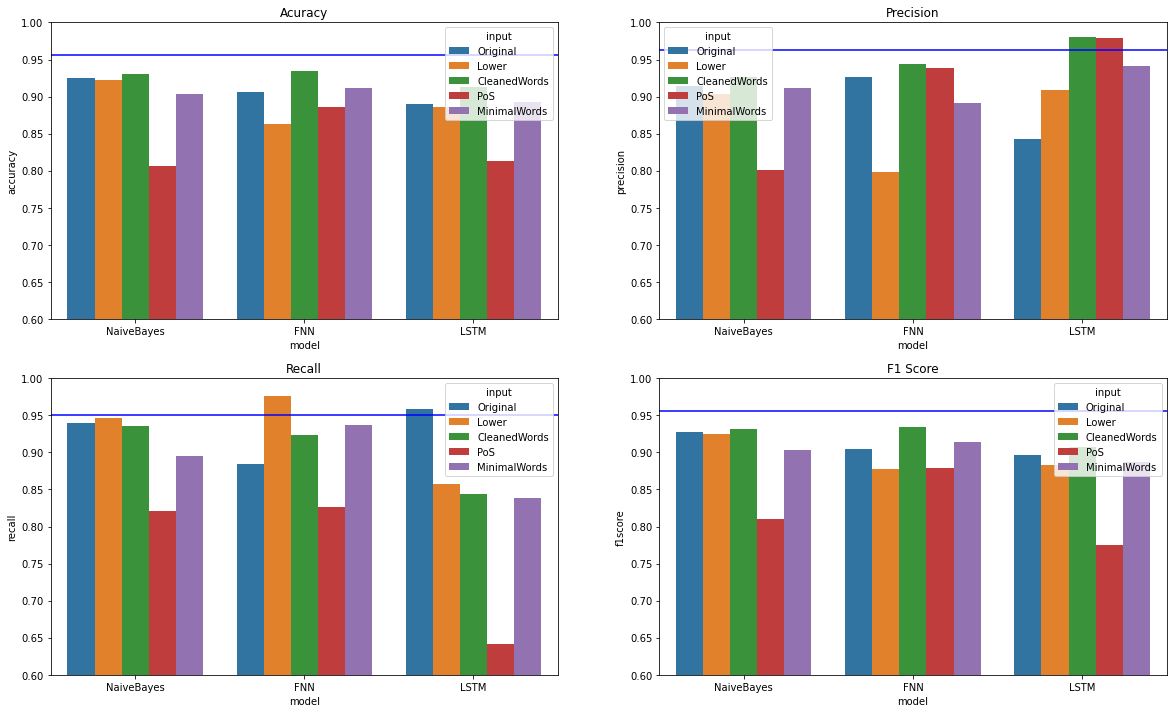

In [76]:
plt.rcParams["figure.figsize"] = (20,12)

fig, ax = plt.subplots(2, 2)

ax[0, 0].set_title('Acuracy')
ax[0, 0].set_ylim(0.6, 1.0)
sns.barplot(x="model", y="accuracy", hue="input", data=df_summary, ax = ax[0, 0])
ax[0, 0].axhline(y=ac, color='b', linestyle='-')

ax[0, 1].set_title('Precision')
ax[0, 1].set_ylim(0.6, 1.0)
sns.barplot(x="model", y="precision", hue="input", data=df_summary, ax = ax[0, 1])
ax[0, 1].axhline(y=pr, color='b', linestyle='-')

ax[1, 0].set_title('Recall')
ax[1, 0].set_ylim(0.6, 1.0)
sns.barplot(x="model", y="recall", hue="input", data=df_summary, ax = ax[1, 0])
ax[1, 0].axhline(y=re, color='b', linestyle='-')

ax[1, 1].set_title('F1 Score')
ax[1, 1].set_ylim(0.6, 1.0)
sns.barplot(x="model", y="f1score", hue="input", data=df_summary, ax = ax[1, 1])
ax[1, 1].axhline(y=f1, color='b', linestyle='-')

plt.show()

In [78]:
display(df_vote)

,org_title,y_true,nb_og,nb_lo,nb_cw,nb_ps,nb_mw,fnn_og,fnn_lo,fnn_cw,fnn_ps,fnn_mw,lstm_og,lstm_lo,lstm_cw,lstm_ps,lstm_mw,avg,y_vote
0,Mitch McConnell VICIOUSLY Cuts Off Elizabeth Warren To Defend Racism (VIDEO),1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0.933333,1
1,Israeli PM Netanyahu Quoted In Full Throated Support of Ethnically Cleansing Palestinians,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.133333,0
2,U.S. general backs Germany to host new NATO operations command,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0
3,"BREAKING NEWS: SHOOTER Ambushes GOP Congressmen…ONE Congressman, TWO Police Officers SHOT In “Deliberate Attack”…Cops Prevented “MASSACRE” [VIDEO]",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.000000,1
4,BEN AFFLECK BUSTED! After Making Statement of Shock Over Harvey Weinstein Charges…Rape Accuser Calls Him Out…“YOU LIE!”…Claims Affleck KNEW,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0.933333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,"Trump Continues Racist Birtherism, Won’t Say President Obama Is An American",1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,1,0.800000,1
1996,Ex-Trump aide Flynn's family creates fund for 'enormous' legal fees,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.066667,0
1997,Clinton leads Trump by 12 points in Reuters/Ipsos poll,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0
1998,"Juncker wants EU finance minister, no separate euro budget or parliament",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0


In [92]:
r = df_vote[df_vote.y_true==df_vote.y_vote][['org_title','y_true','y_vote','lstm_ps']]
w = df_vote[df_vote.y_true!=df_vote.y_vote][['org_title','y_true','y_vote','lstm_ps']]

    
print('True Negative (real news, predicted real)')
display(r[r.y_true==0].sample(5).org_title.tolist())
print('True Positive (fake news, predicted fake)')
display(r[r.y_true==1].sample(5).org_title.tolist())

print('False Positive (real news, predicted fake)')
display(w[w.y_true==0].sample(5).org_title.tolist())
print('False Negative (fake news, predicted real)')
display(w[w.y_true==1].sample(5).org_title.tolist())

print('False Positive, PoS predicted Negative')
display(w[(w.y_vote==1)&(w.lstm_ps==0)].sample(5).org_title.tolist())
print('False Negative, PoS predicted Positive')
display(w[(w.y_vote==0)&(w.lstm_ps==1)].sample(5).org_title.tolist())

print('True Negative, PoS predicted Positive')
display(r[(r.y_vote==0)&(r.lstm_ps==1)].sample(5).org_title.tolist())
print('True Positive, PoS predicted Negative')
display(r[(r.y_vote==1)&(r.lstm_ps==0)].sample(5).org_title.tolist())

True Negative (real news, predicted real)


['U.S. welcomes decision by Saudi-led coalition to keep Yemen port open',
 'UK PM may says looks forward to working with Trump, building ties',
 "Philippines' Duterte orders police to provide active support in drug war",
 'Fog stops Trump facing-off North Korea across DMZ',
 "U.N. seeks 'massive' help for Rohingya fleeing Myanmar 'ethnic cleansing'"]

True Positive (fake news, predicted fake)


['“DIRTY JOBS” HOST MIKE ROWE Absolutely Destroys Guy Who Called Him A White Nationalist',
 ' WATCH: Trump Supporter Just Mocked Hispanics By Insulting The Spanish Language On CNN',
 '[VIDEO] HUNDREDS OF MORMON FUNDAMENTALISTS SURROUND Mother Who Escaped Cult Community To Prevent Her From Extracting Her Children',
 'BLACK TRUMP SUPPORTER Goes On Tirade Over CNN’s Support For Radical Islam At #MarchAgainstSharia [VIDEO]',
 ' This Constitutional Attorney Is Schooling Trump On Twitter And It’s Hilarious (TWEETS)']

False Positive (real news, predicted fake)


['Chicago immigrant claims U.S. retaliated over her activism',
 "For Chinese officials, Trump perhaps better the devil they don't know",
 "Trump attends 'Villains and Heroes' costume party dressed as...himself",
 'Dying for a paycheck: the Russian civilians fighting in Syria',
 "Trump's surge confounds rivals, makes him betting favorite"]

False Negative (fake news, predicted real)


['UNFORGIVABLE! PENTAGON WITHHELD $78 MILLION From Wounded Veteran’s Pay',
 'NIGEL FARAGE ON TRUMP/MERKEL POWWOW: Merkel’s decision for mass migration the “worst decision by European leader in 70 years” [Video]',
 ' Lawsuit Filed Against Intelligence Agencies For Records On Russian Election Tampering',
 ' Trump’s Ban Just Sentenced Two Christian Syrian Refugee Families To Persecution And Possible Death',
 'DARPA Spending $62 Million to Create Military Cyborgs']

False Positive, PoS predicted Negative


["Trump's 'bad hombres' and 'nasty woman' remarks stoke online outrage",
 'Unwavering Trump voters say they will not miss Steve Bannon',
 'Chicago immigrant claims U.S. retaliated over her activism',
 'Before New Hampshire primary, Trump campaign shows mellower side ',
 "'Wiping out' extremist ideology is my mission: head of Saudi-based Muslim body"]

False Negative, PoS predicted Positive


['NIGEL FARAGE ON TRUMP/MERKEL POWWOW: Merkel’s decision for mass migration the “worst decision by European leader in 70 years” [Video]',
 'STOCKHOLM STUDY: US & Europe Top Arms Trade Globally – Saudi Arabia’s Weapons Imports Skyrocket Over 200 Percent',
 'JUST IN: Helicopter Crashes In Saudi Arabia KILLING 8 High-Ranking Officials Only One Day After Saudi King ARRESTS Trump-Hating Billionaire And Dozens More Cabinet Members',
 'OBAMA REGIME’S SECRET ASIAN TRADE DEAL Would Let International Tribunal Overrule State and Fed Laws To Benefit Foreign Companies',
 'SYRIA CEASEFIRE? Lavrov, Kerry Agree to Fight Al-Nusra, No Strikes on ‘Rebels,’ Aleppo Relief']

True Negative, PoS predicted Positive


['FACTBOX - German coalition watch: Agreeing on lowest common denominator not enough - Greens',
 'Factbox: Trump on Twitter (Aug 2) - Small business owners',
 'Ex-White House aide and ex-IBM CEO to head cyber security panel',
 "Japan PM's ruling bloc seen nearing 2/3 majority in Oct. 22 lower house poll: Nikkei",
 "Theresa Maybe? PM refuses to say how she'd vote in another Brexit referendum"]

True Positive, PoS predicted Negative


['OBAMA: ‘There’s little difference between communism and capitalism’ [Video]',
 'CAN YOU GUESS THE ONE THING Majority Of Bernie Sanders Supporters Have In Common?',
 ' Republican Obstructionism Is About To Make An Elderly Disabled Couple Homeless',
 'Oliver Stone: Pokémon Go is ‘Surveillance Capitalism’ for a Robotic Society',
 'GOTCHA! A Stammering John Podesta Stunned by a REAL Question from CBS Reporter']

# Conclusion

By combining three models with the best performance, the final model achieved about 95% accuracy, precision, and recall performances.